In [1]:
using DynamicalSystems
using PyPlot

In [2]:
function f(dx, x, p, n)
    a = p[1]
    b = p[2]
    dx[1] = exp(-a*x[1]^2) + b
    return dx
end

f(x, a, b) = exp(-a*x^2) + b
df(x) = -2*a*x*exp(-a*x^2)

function myplot(x, y, a, t, L)
    fig = subplots(2, 1, sharex = true, figsize = (20, 16))
    # fig = figure(figsize = (20, 16))
    subplots_adjust(hspace = 0.0)
    subplot(211)
    ax1 = plot(x, y, ls = "none", ms = 0.2, marker = "o", color = "black", alpha = 0.05)
    # set(ax1[:get_xticklabels](), visible = false)
    grid("on")
    ylabel("x", fontsize = 20)
    yticks(fontsize = 15)
    title("a = $a", fontsize = 30)
    xlim((-1, 1))
    xticks(fontsize = 0)

    subplot(212)
    ax2 = plot(t, L)
    axhline(0, ls = "--", color = "0")
    xlabel("b", fontsize = 20)
    xticks(fontsize = 15)
    ylabel("Lyapunov exponent", fontsize = 20)
    yticks(fontsize = 15)
    grid("on")
    xlim((-1, 1))
    ylim((-5, 1))
end

function mychaos(a)

    ds = DiscreteDynamicalSystem(f, [0.0], [a, 1.0])
    i = 1
    pvalues = -1:0.001:1
    n = 2000
    Ttr = 100
    p_index = 2
    output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr)

    stas = length(pvalues)
    x = Vector{Float64}(undef, n*stas)
    y = copy(x)
    for j in 1:stas
        x[(1 + (j-1)*n):j*n] .= pvalues[j]
        y[(1 + (j-1)*n):j*n] .= output[j]
    end

    N = 10000
    t = pvalues
    X = zeros(length(t), N)
    X[:, 1] = zeros(length(t)).+sqrt(2)/10
    i = 1
    for b in t
        for j in 2:N
            X[i, j] = exp.(-a*X[i, j-1].^2) + b
        end
        i += 1
    end

    L = sum(log.(abs.(-2*a.*X.*exp.(-a.*X.^2))), dims=2)/N;
#     -2*a*x*exp(-a*x^2)
    return x, y, t, L
end

mychaos (generic function with 1 method)

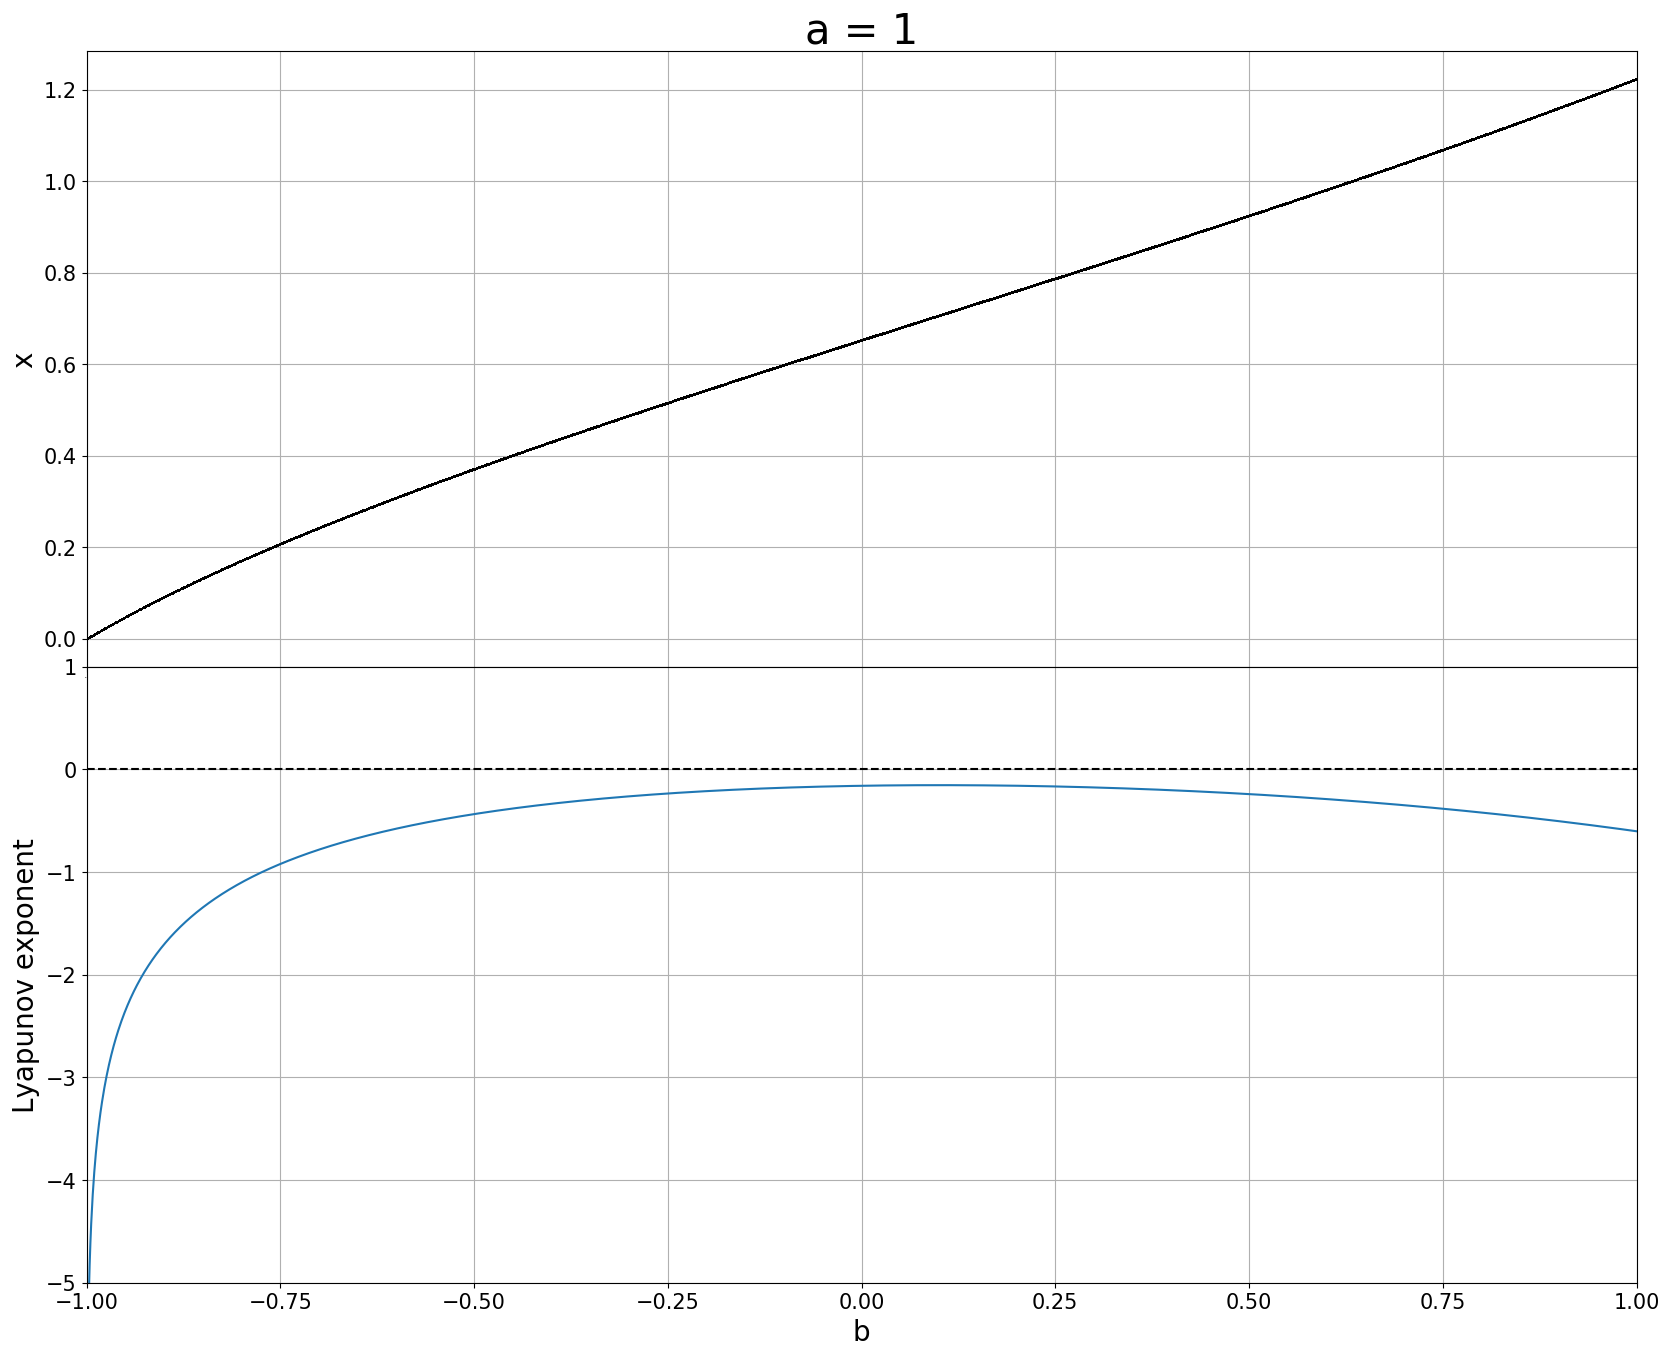

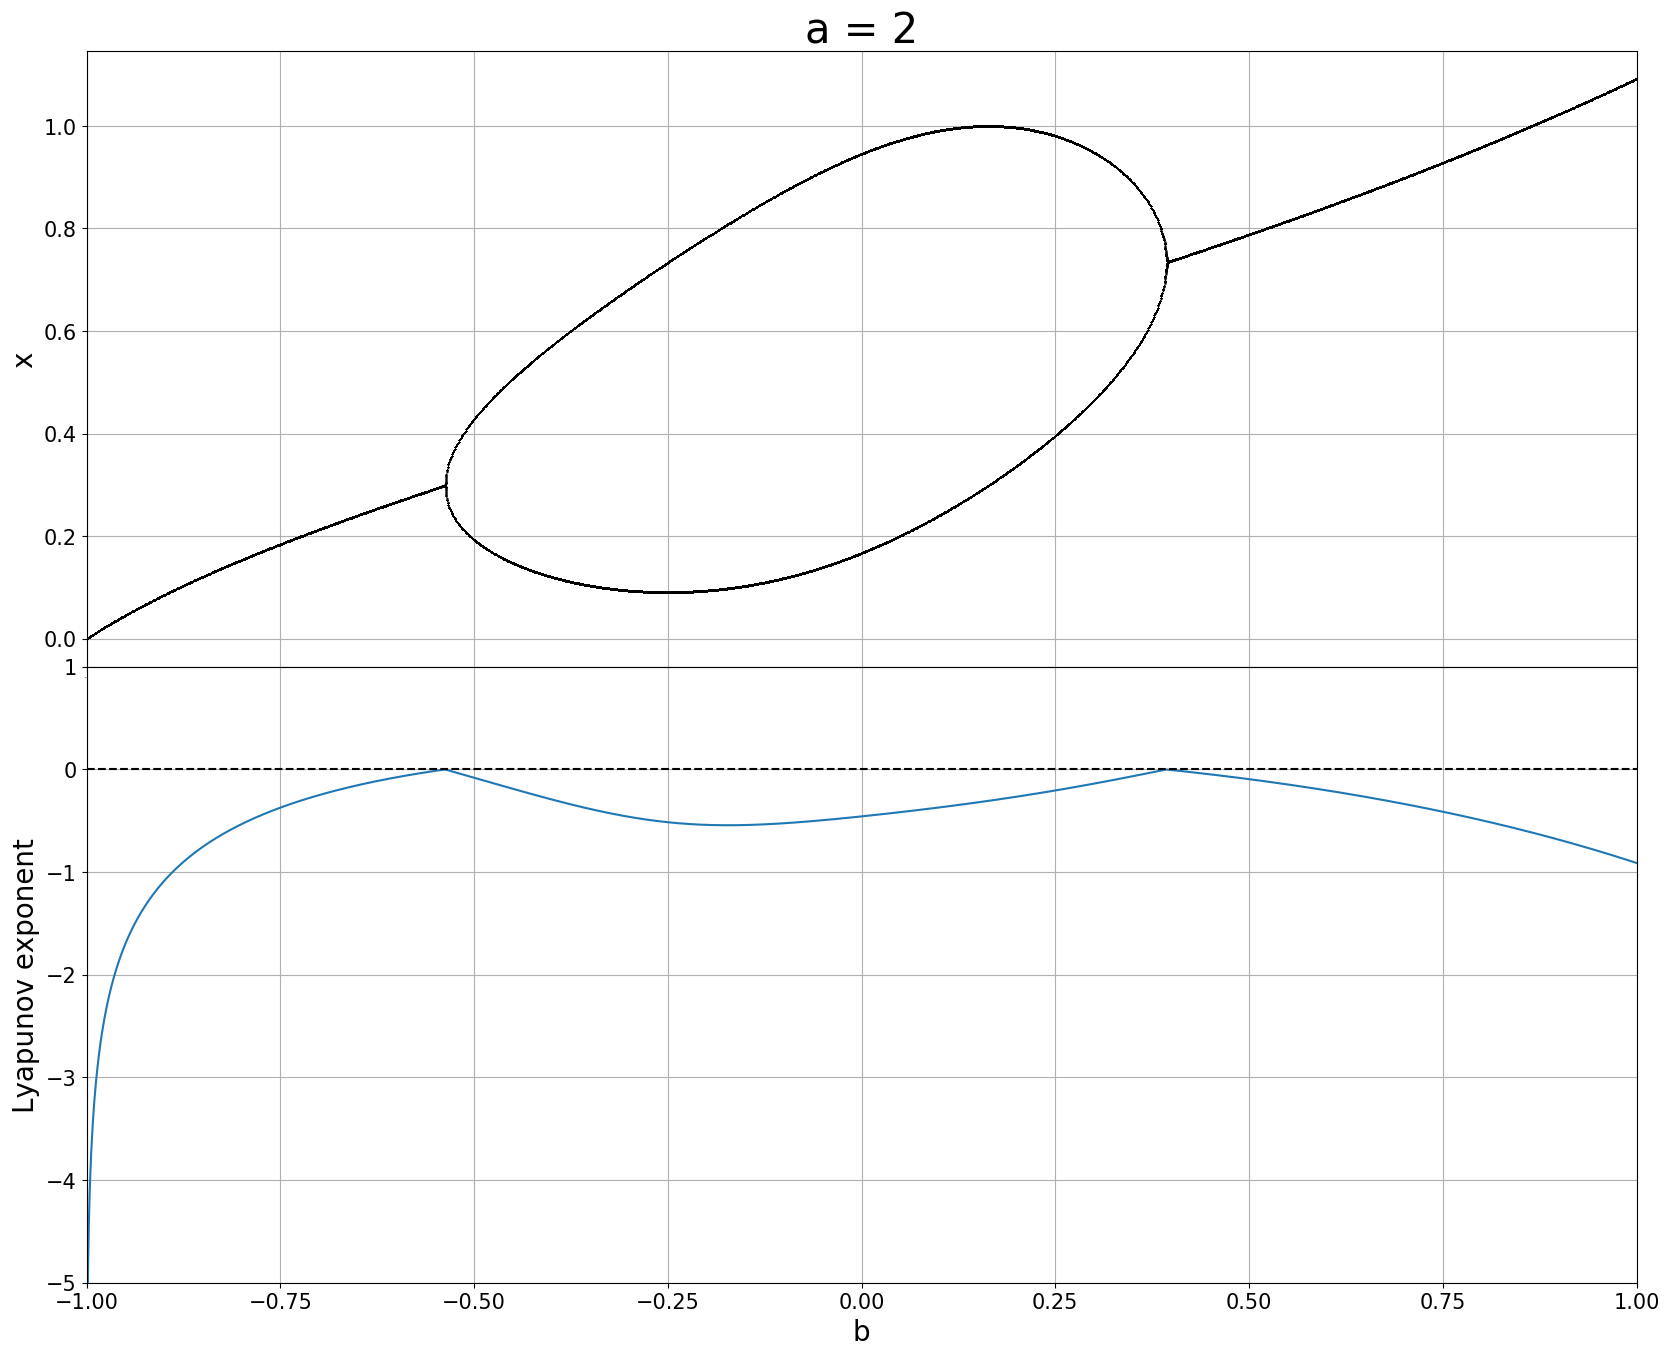

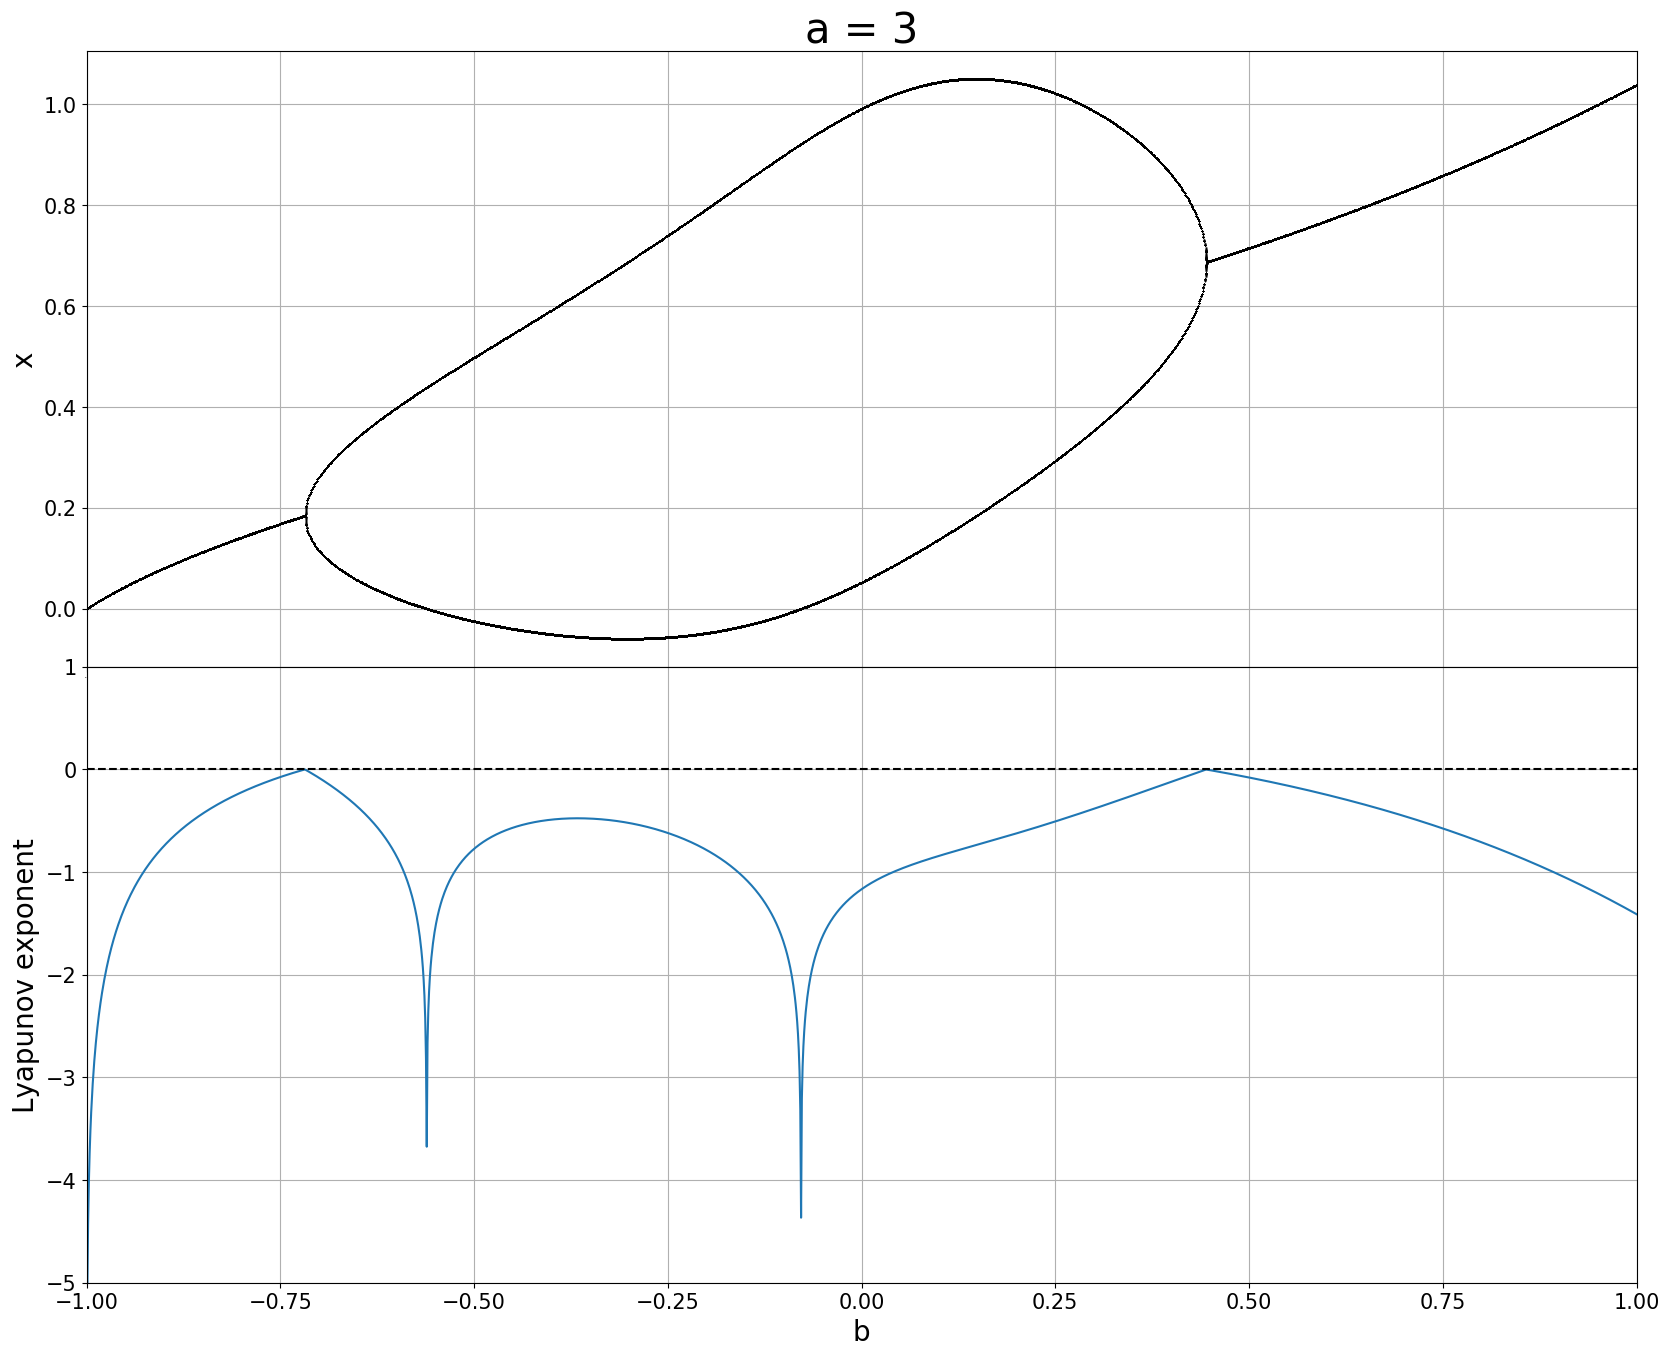

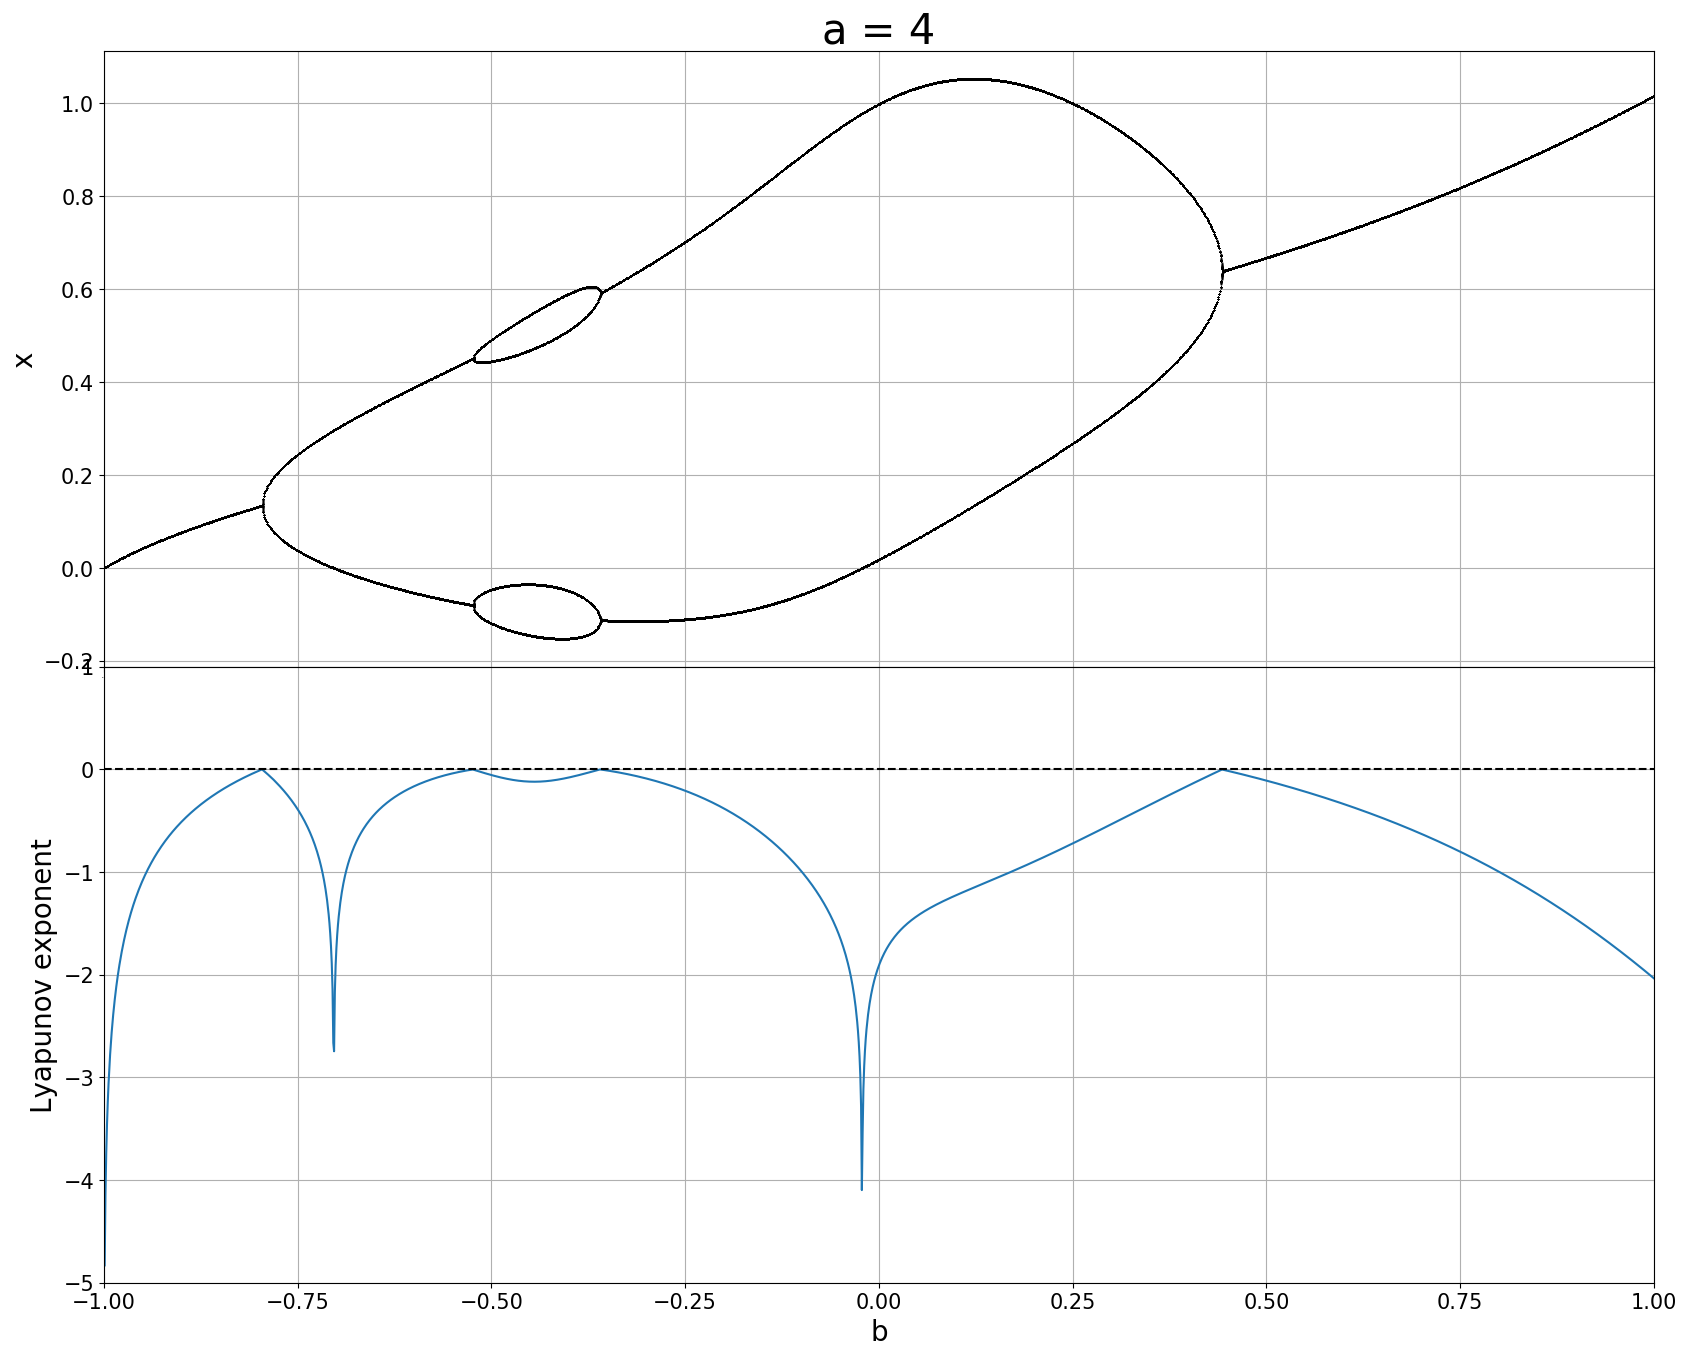

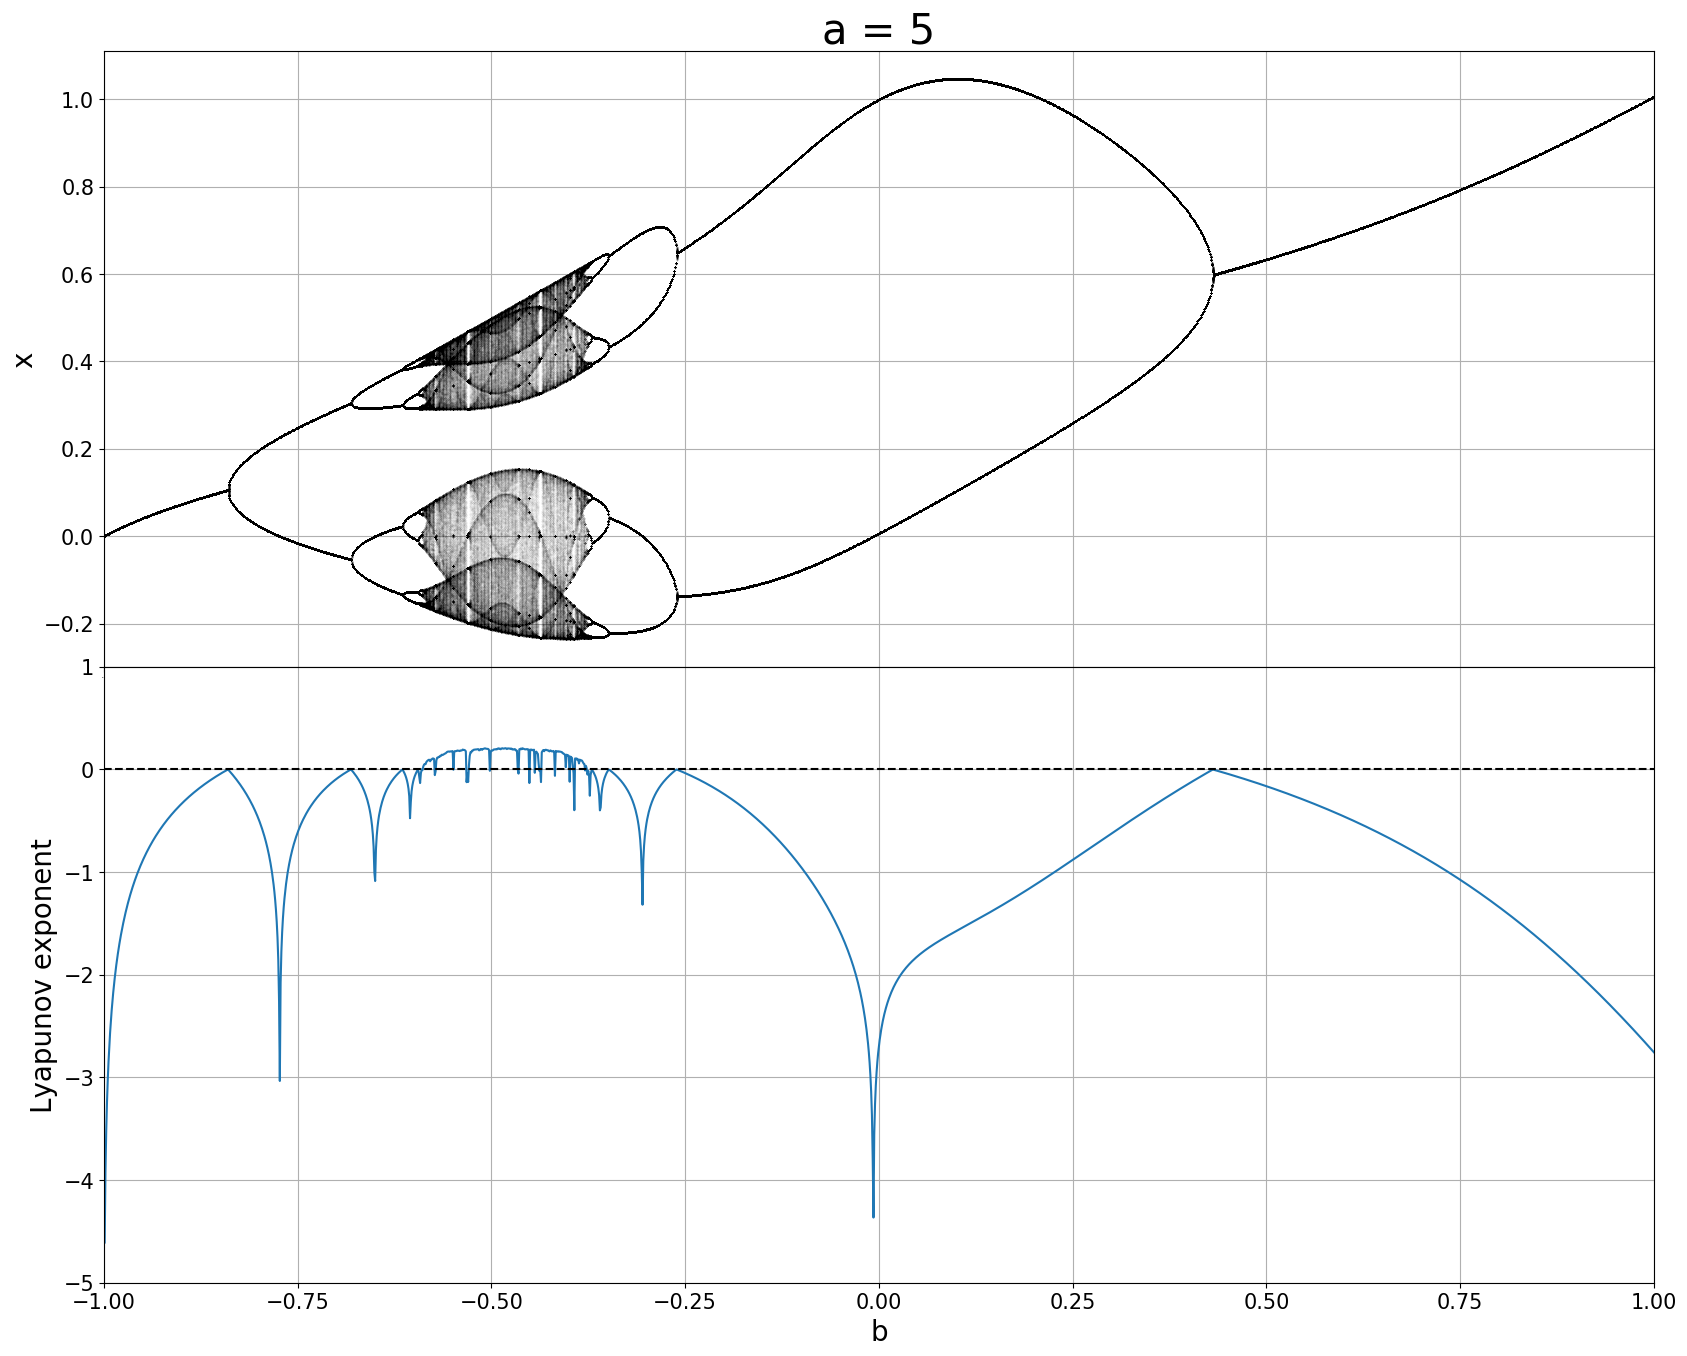

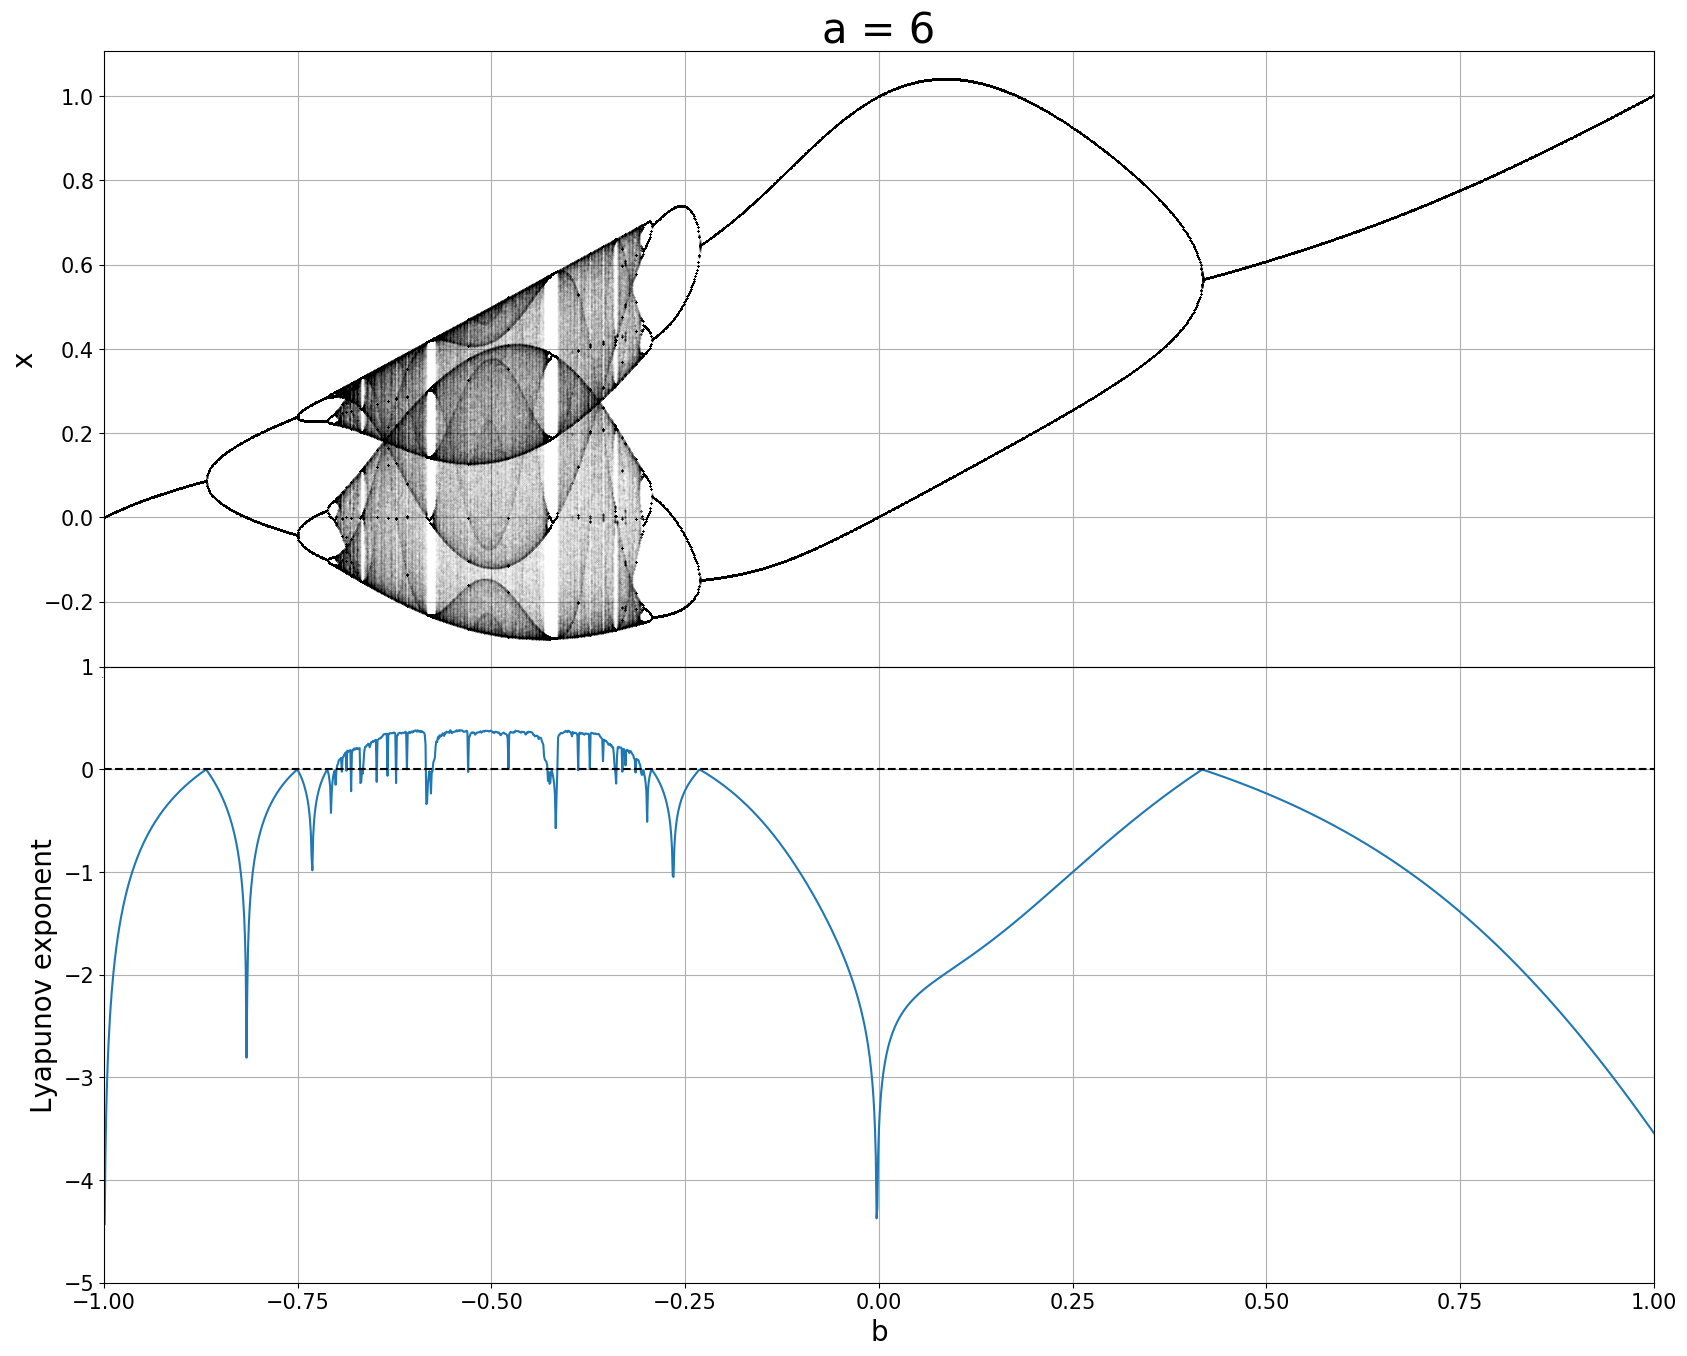

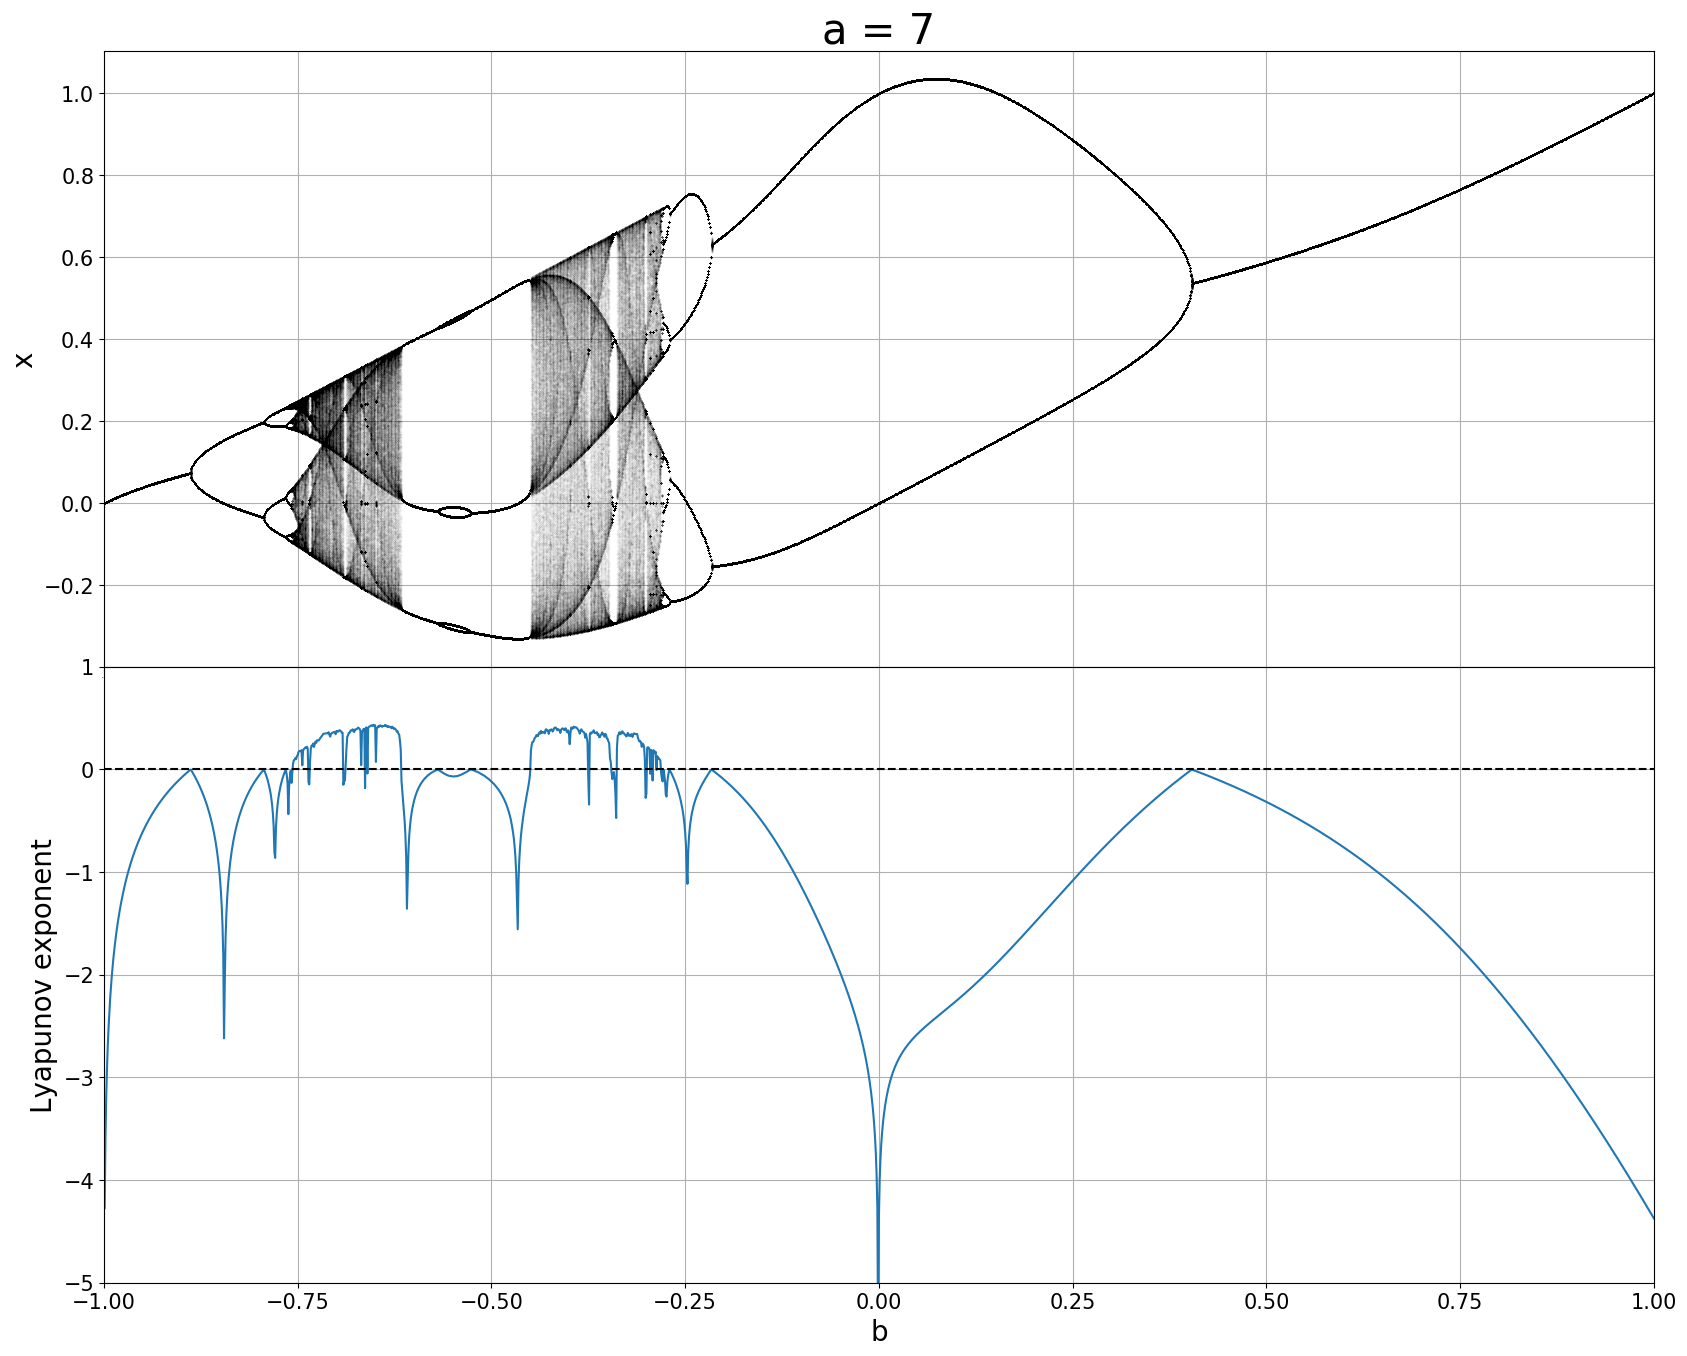

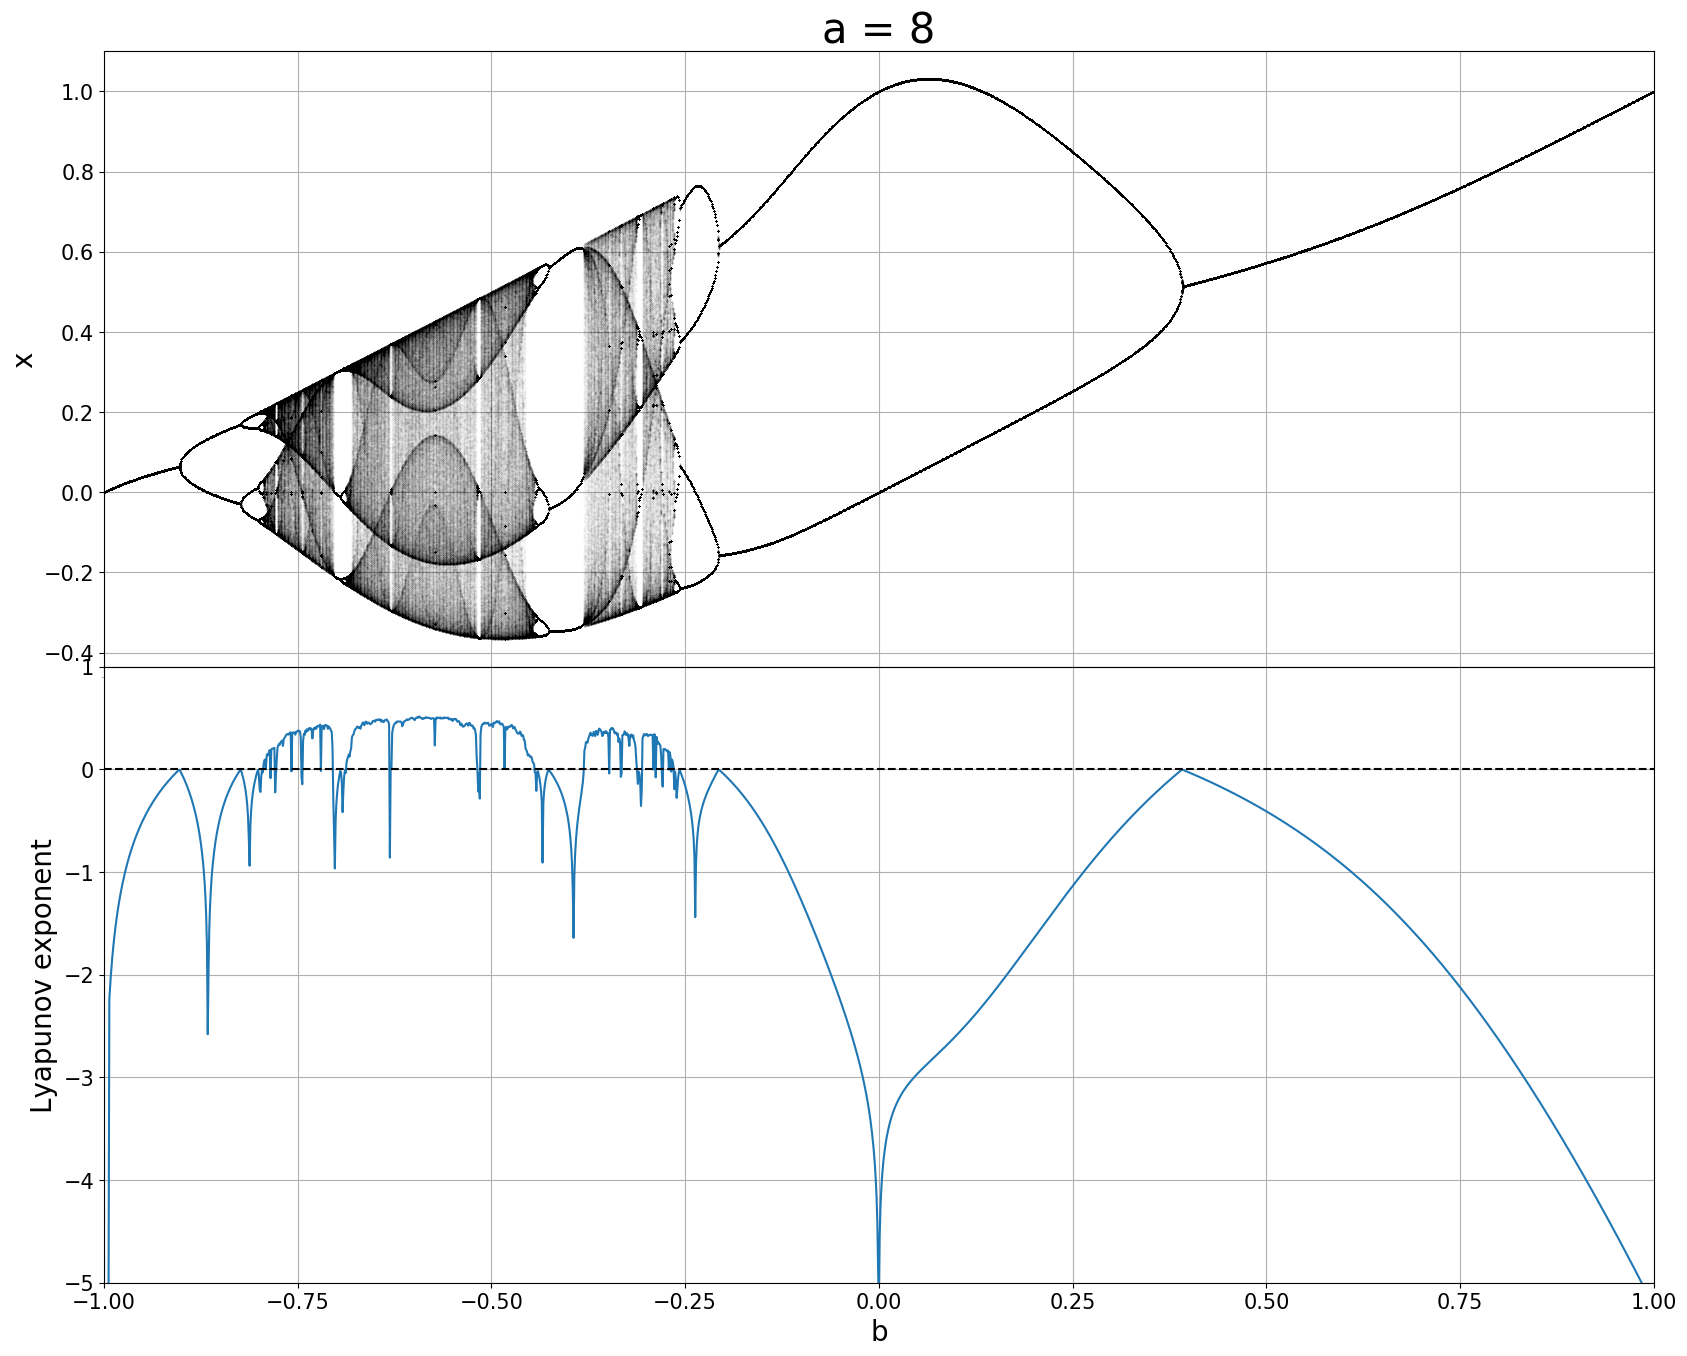

In [3]:
for a = 1:8
    x, y, t, L = mychaos(a)
    myplot(x, y, a, t, L)
    savefig("plots/a$a.png", dpi = 700)
end

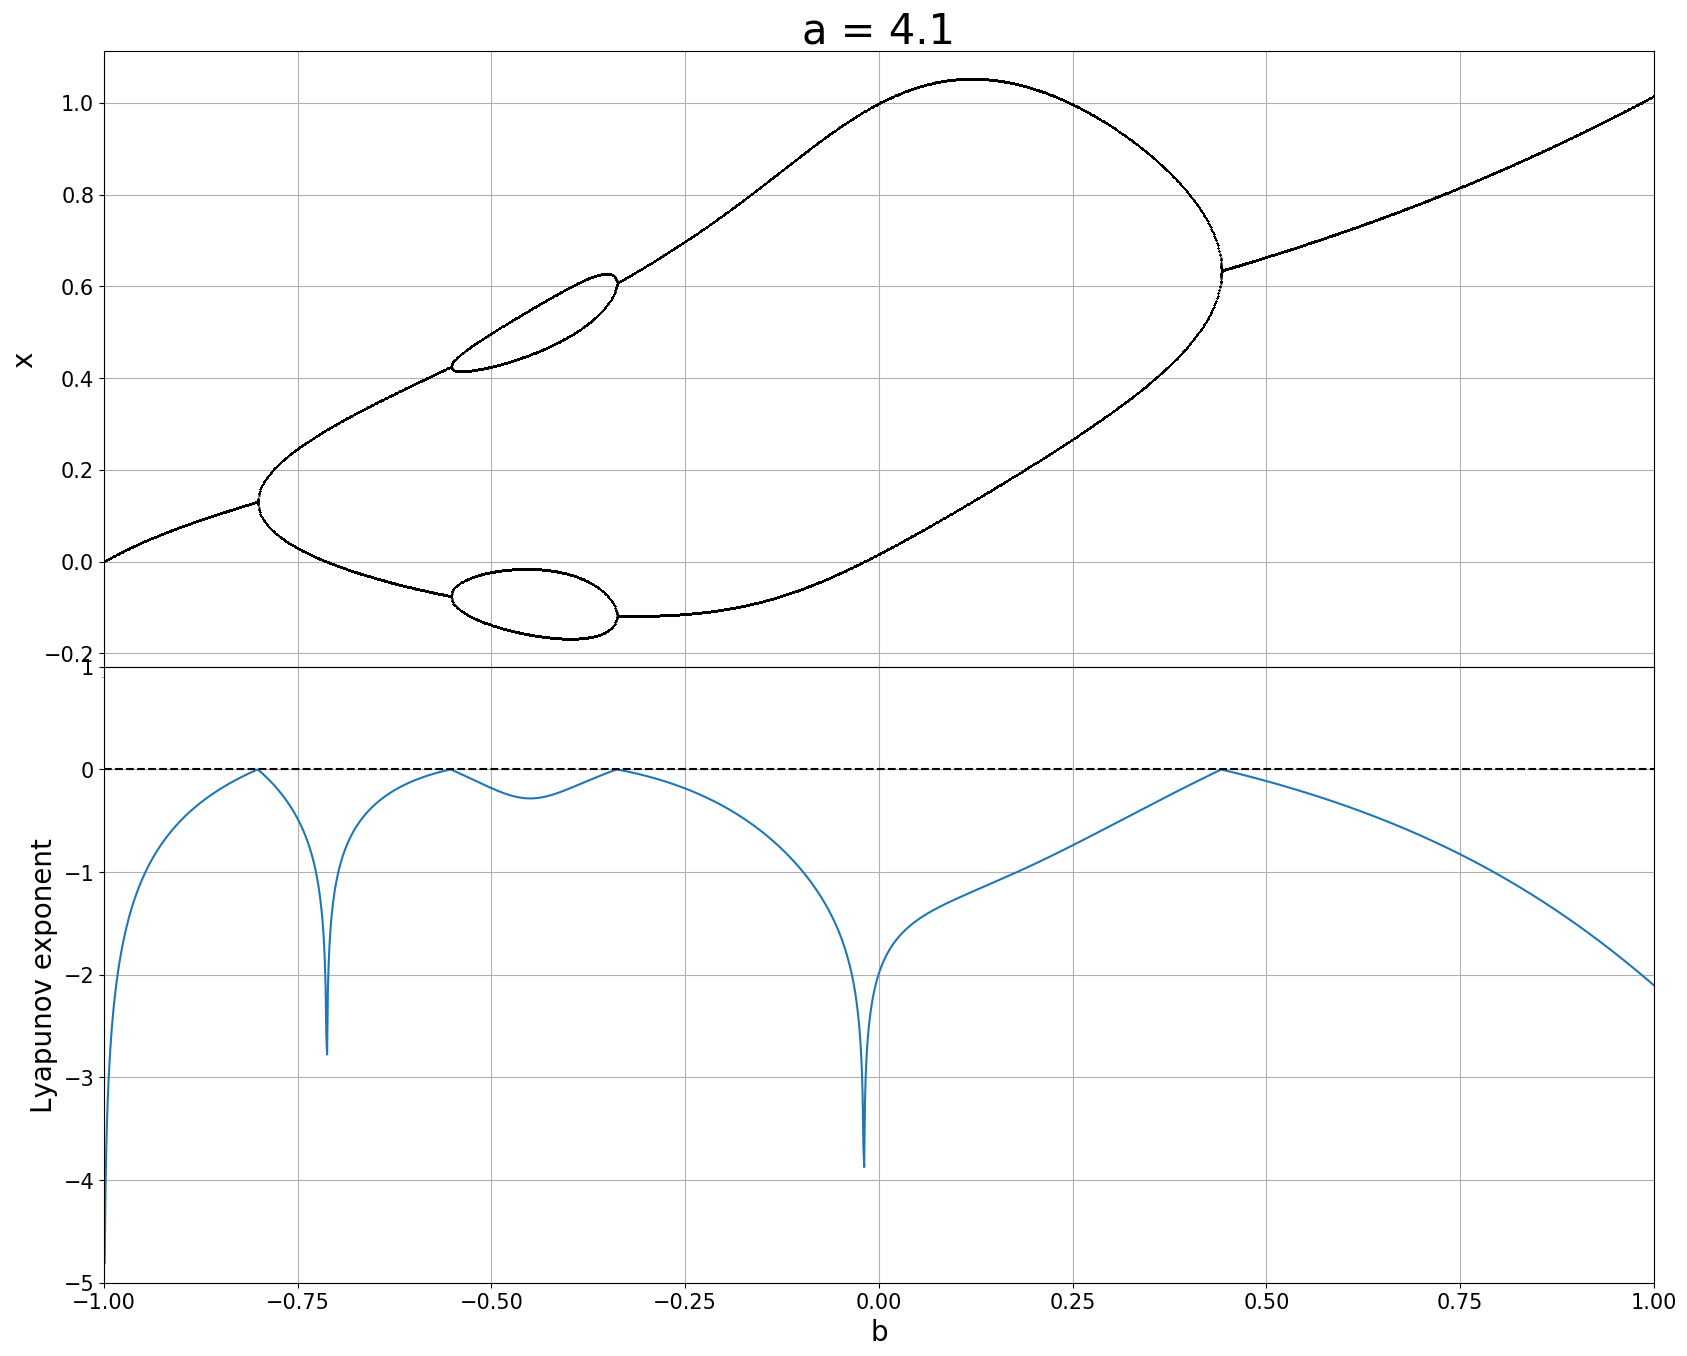

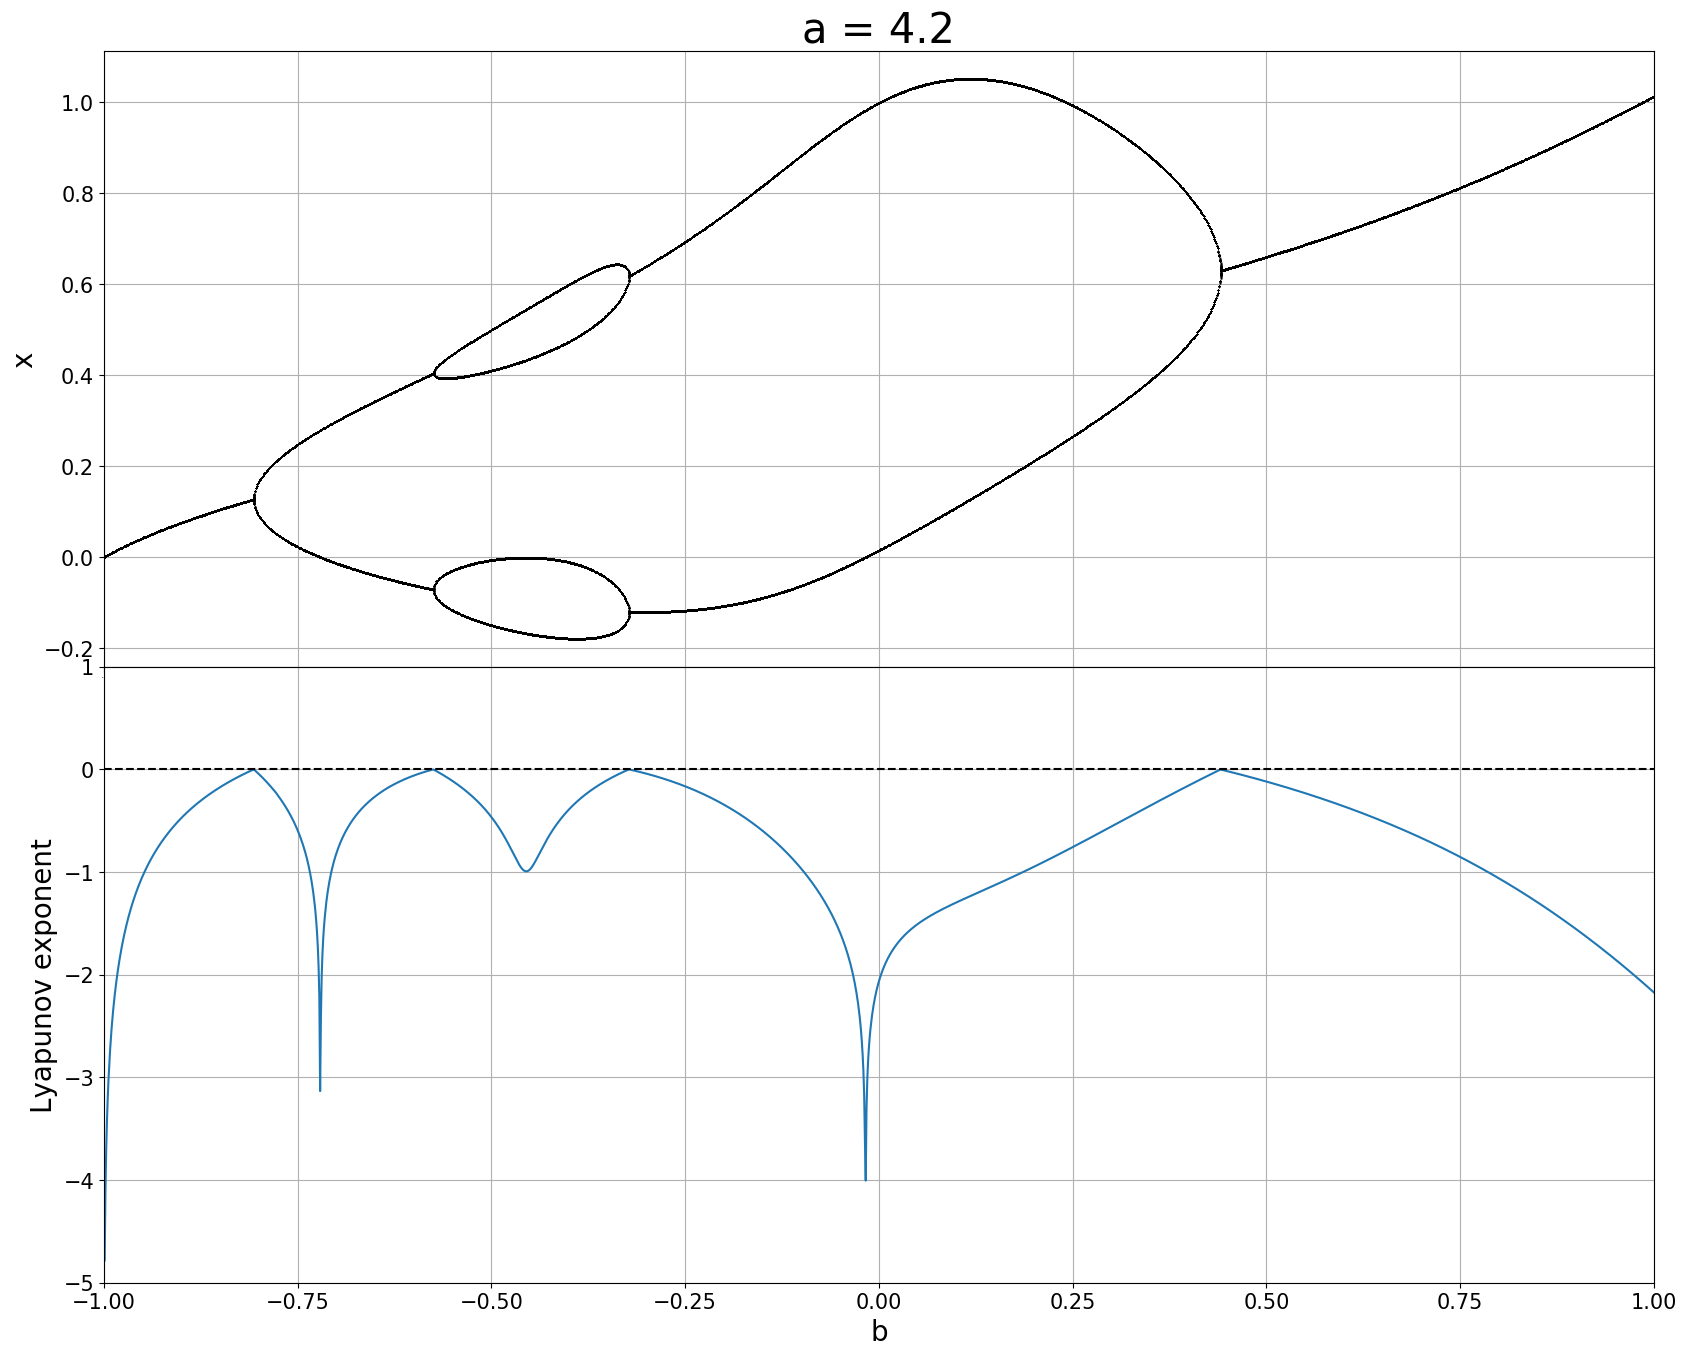

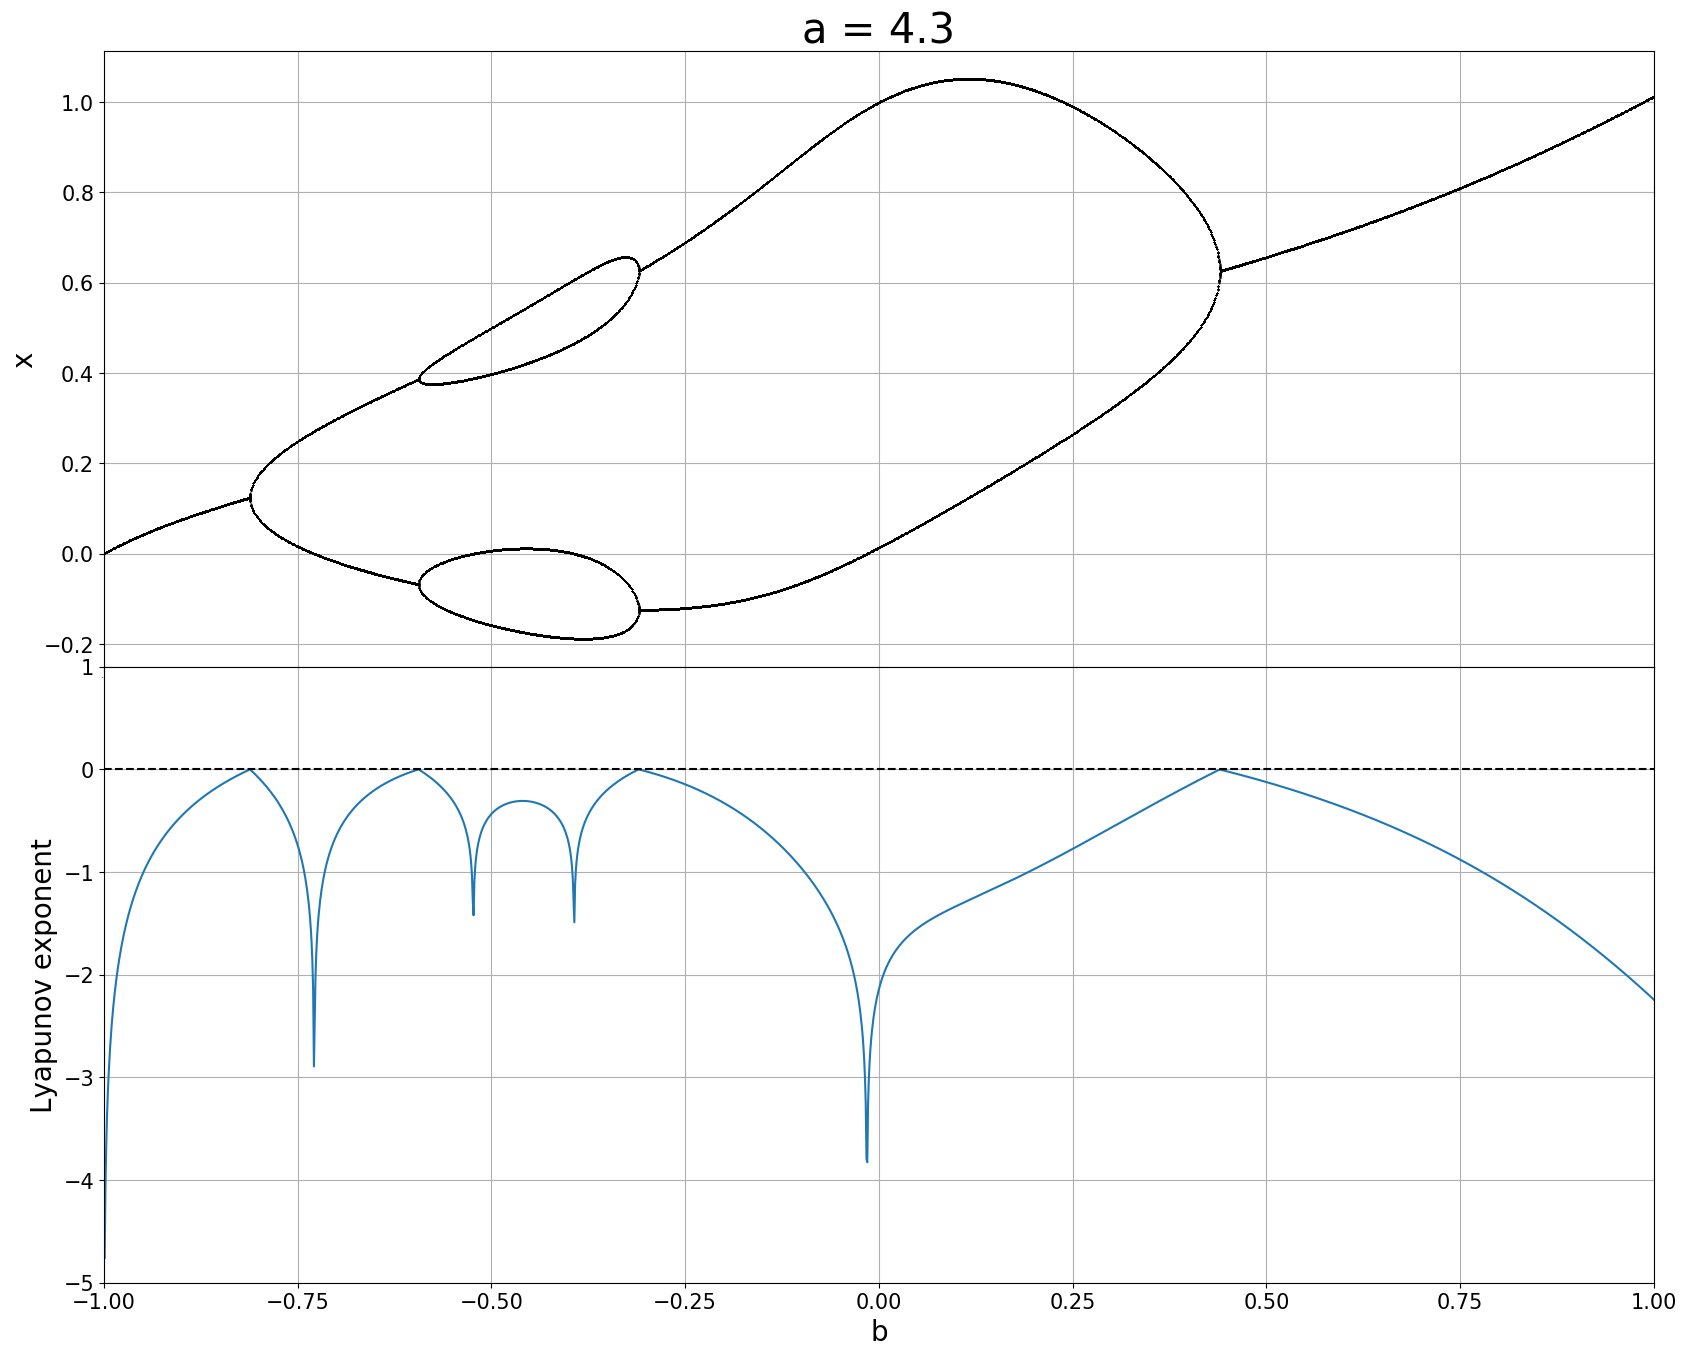

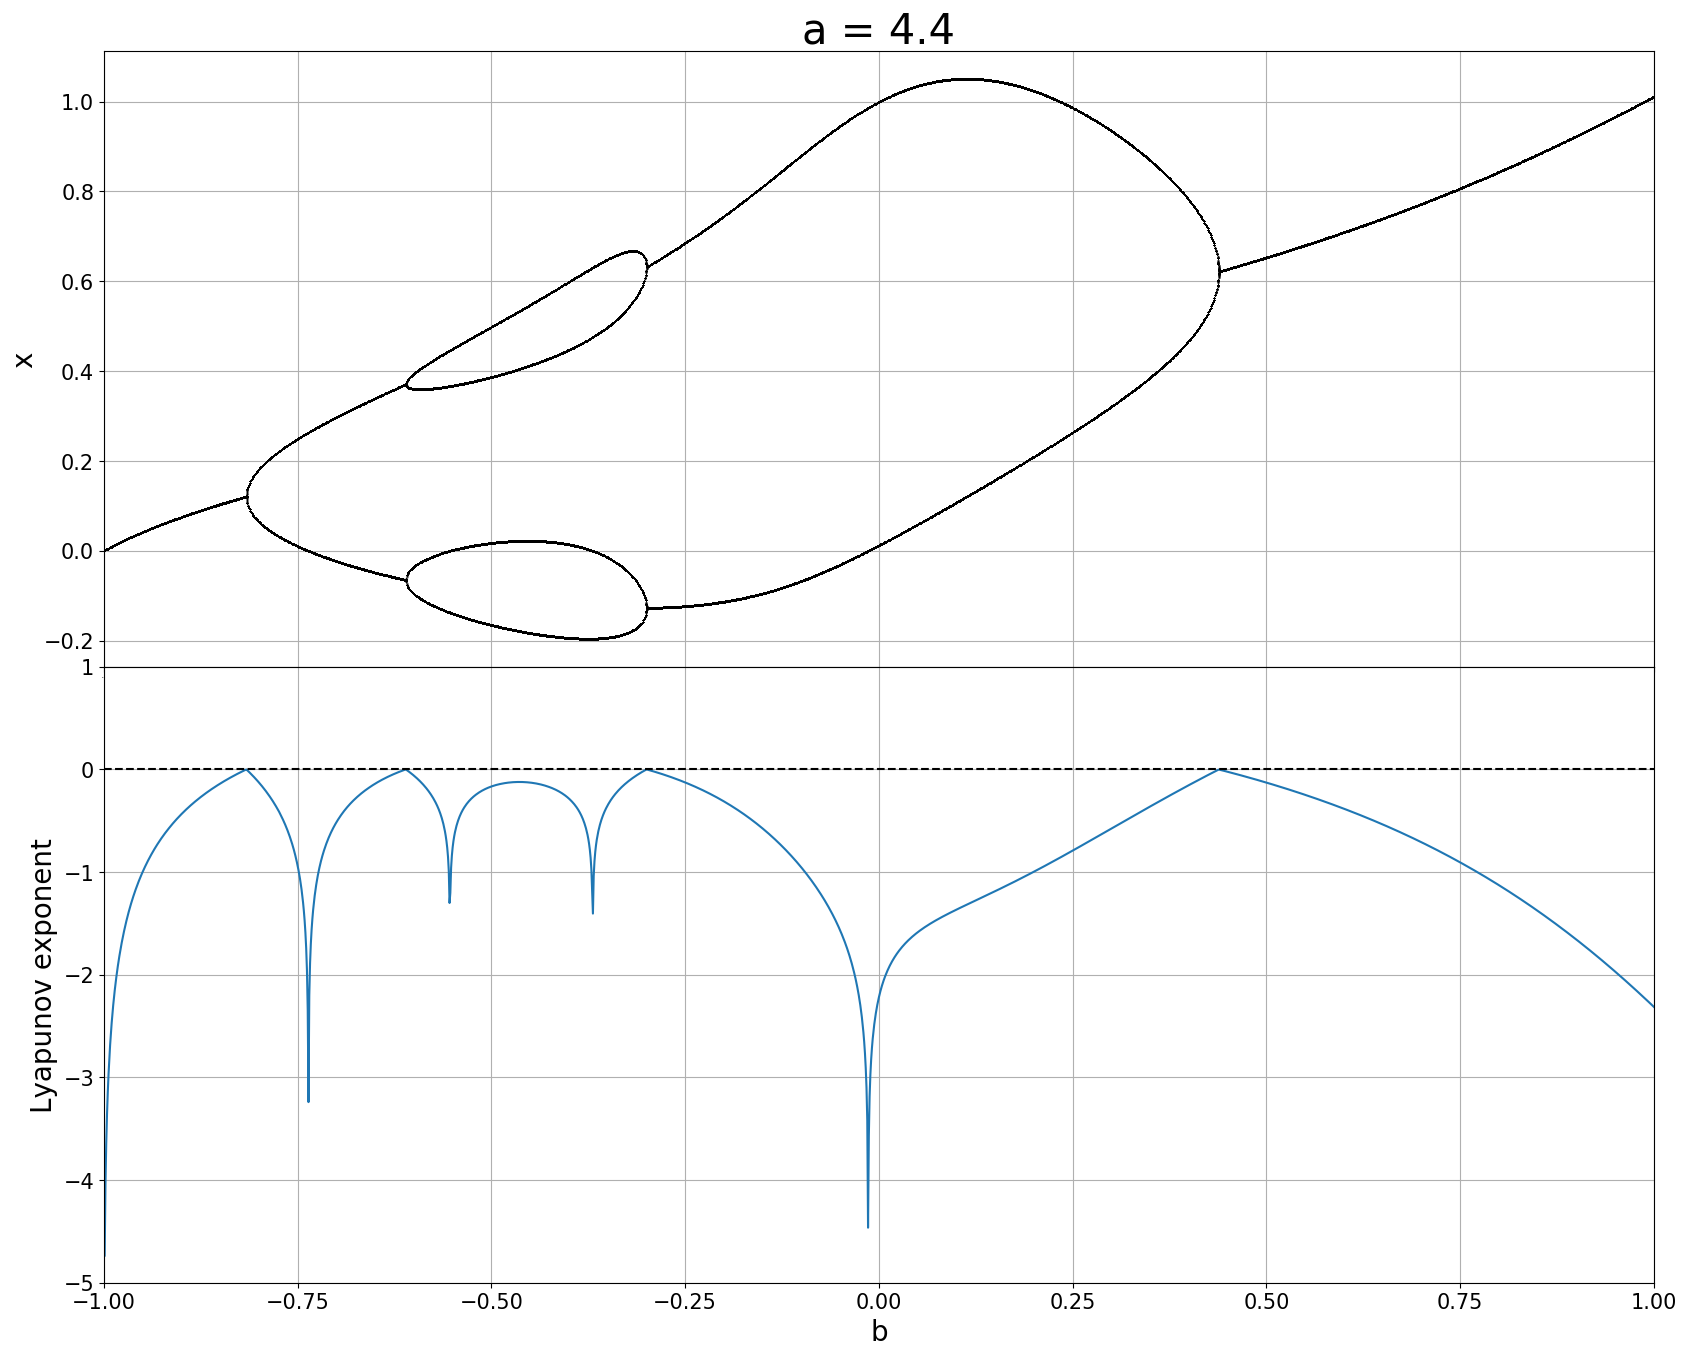

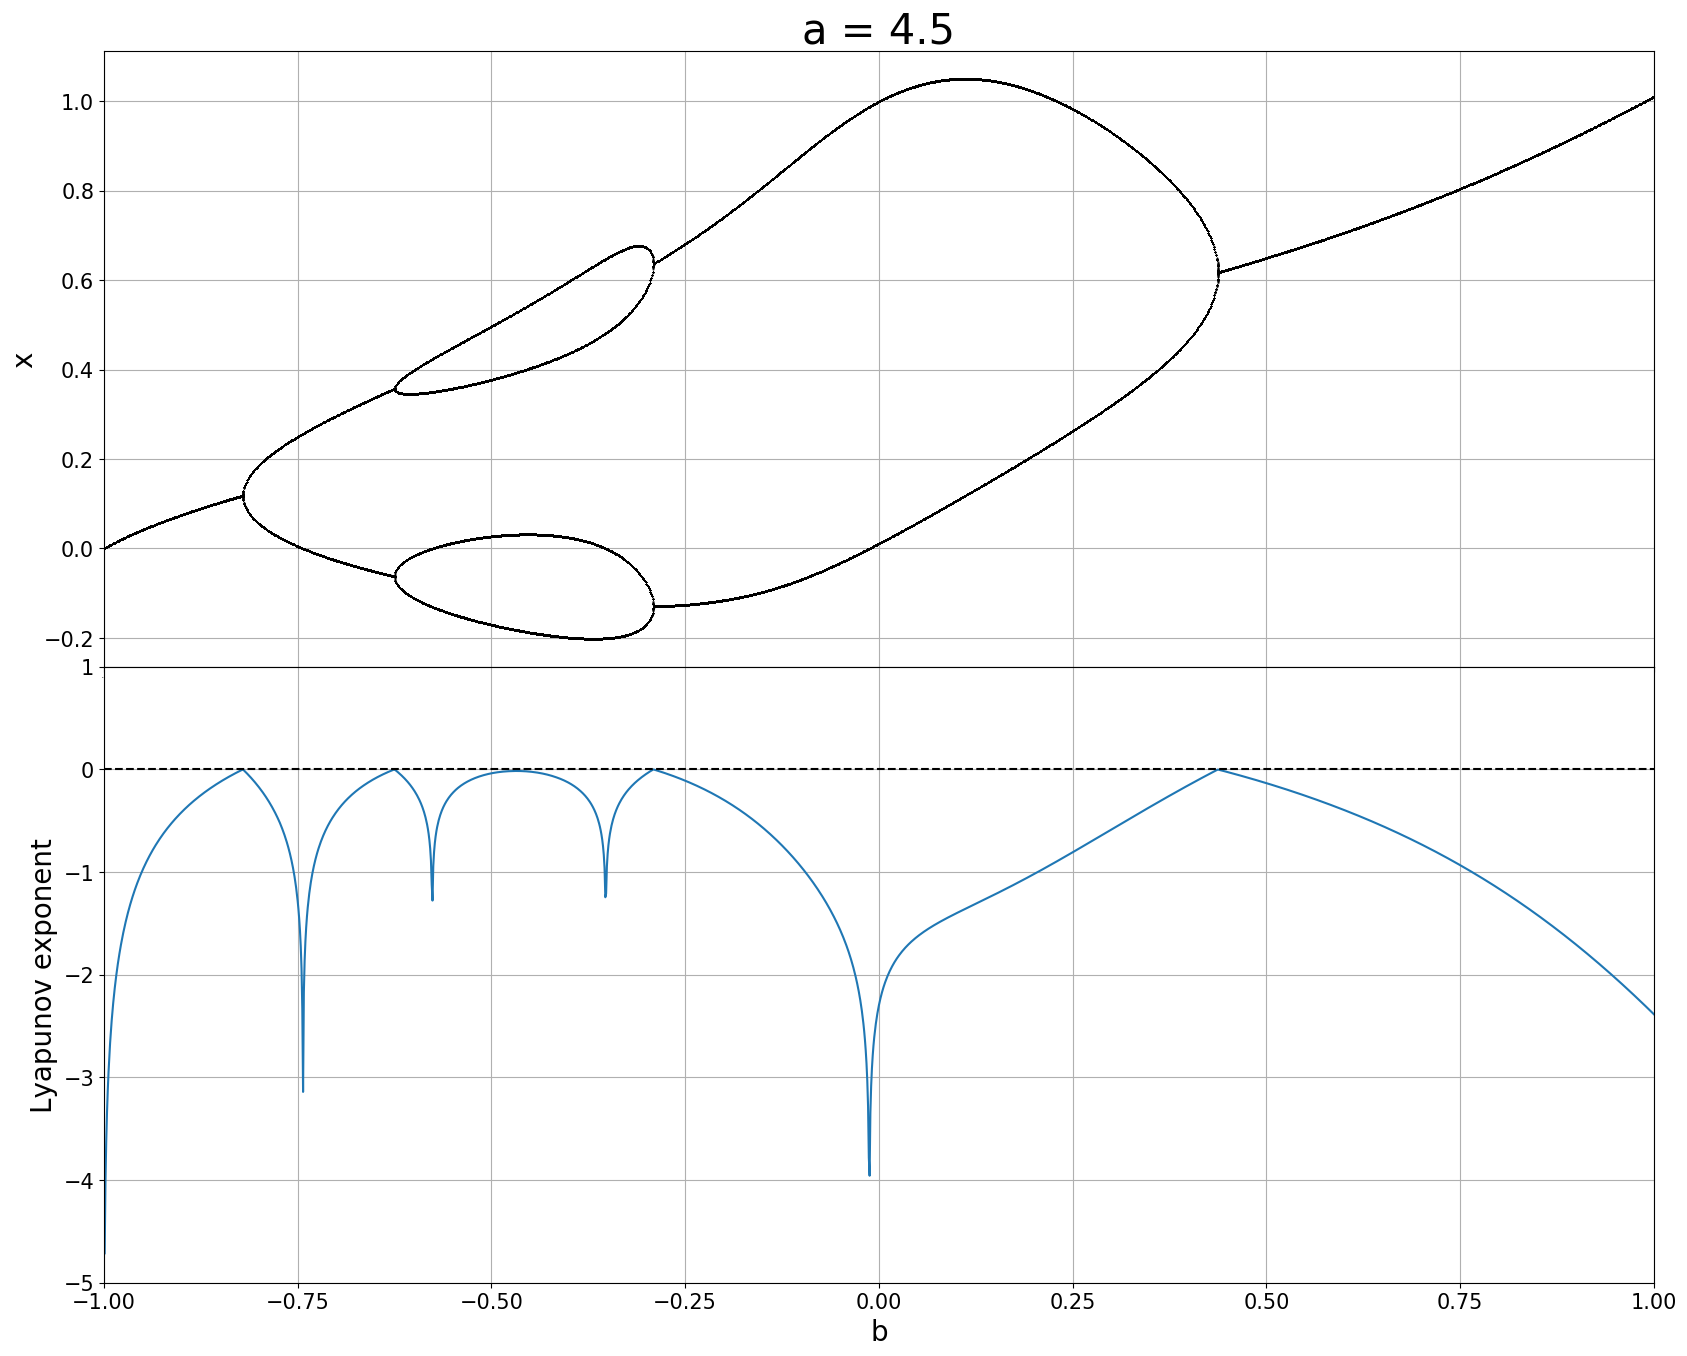

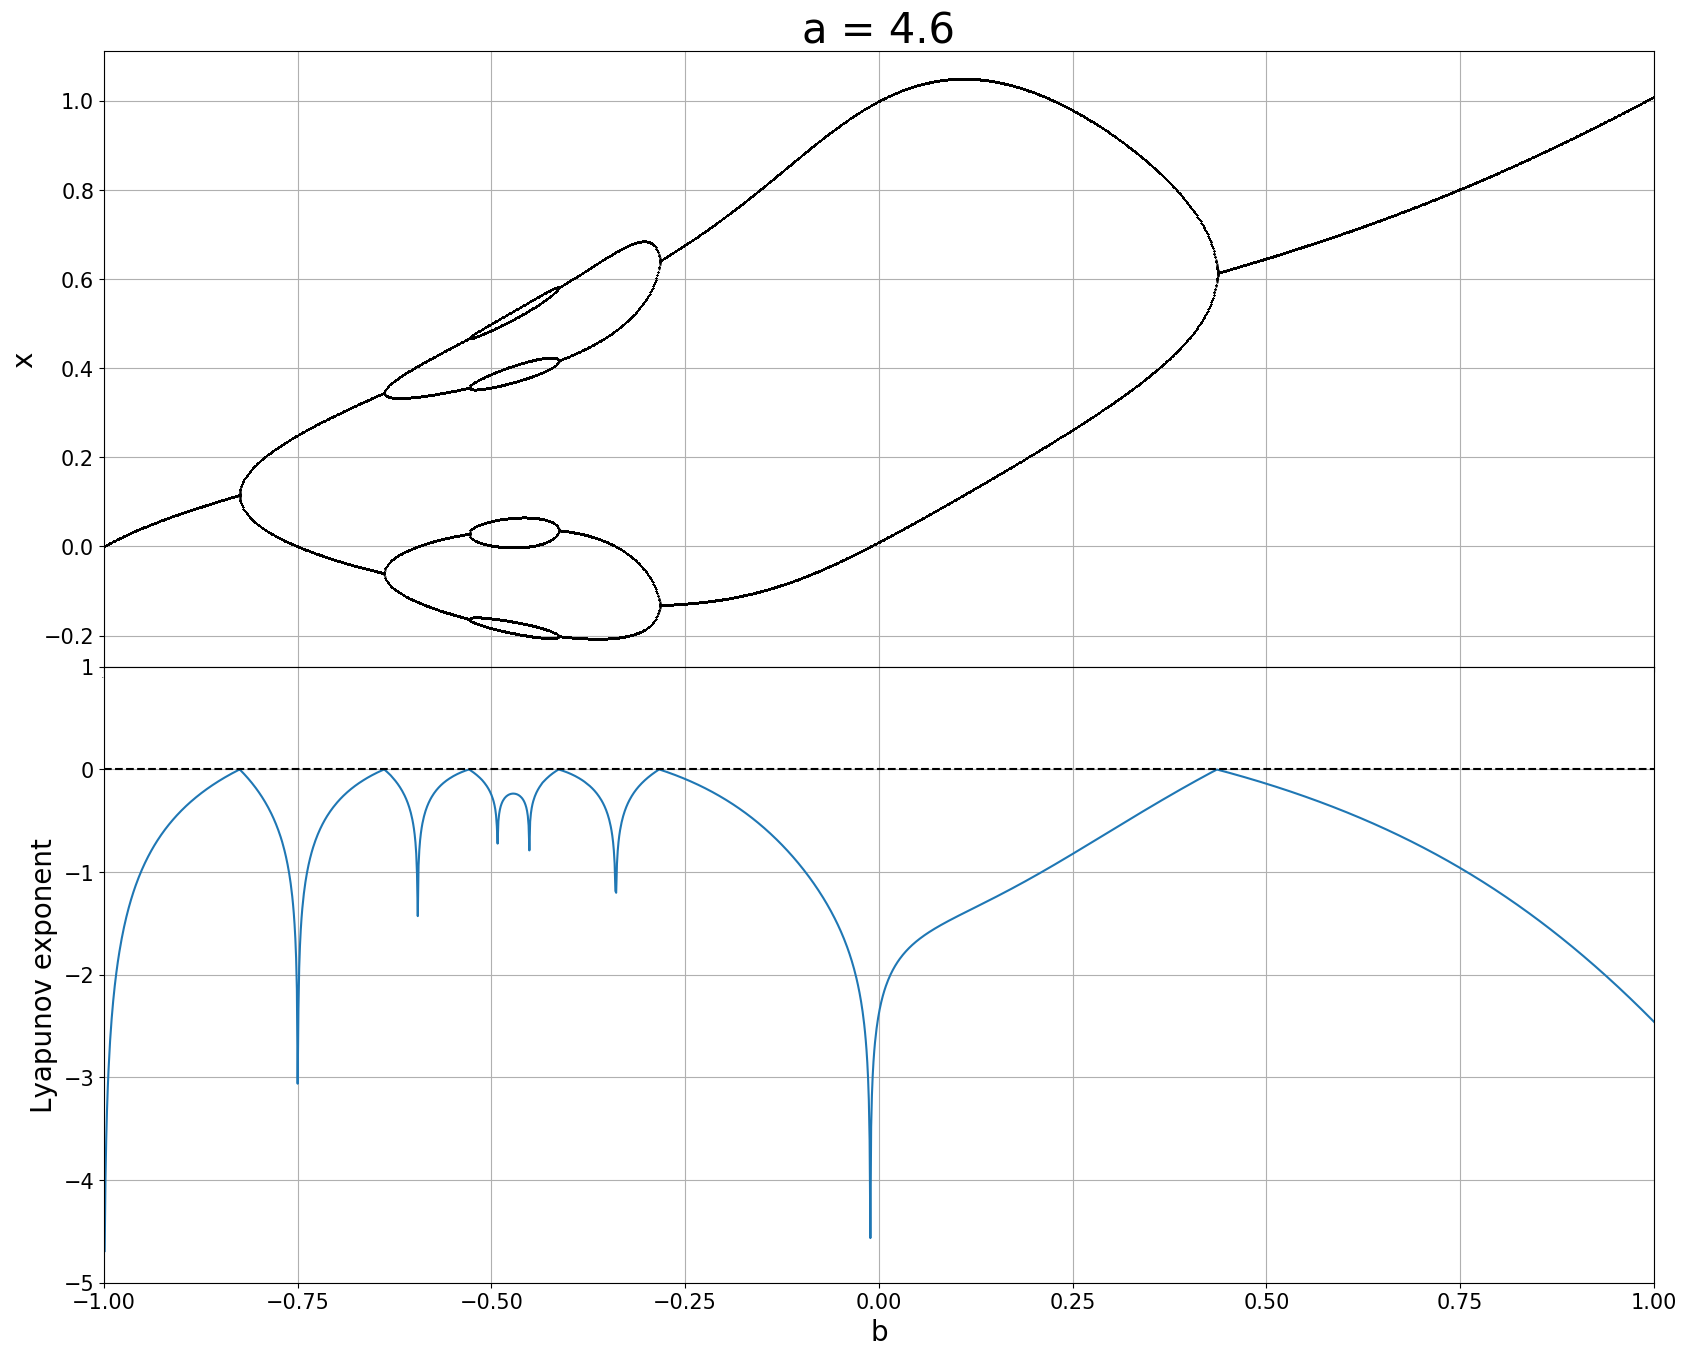

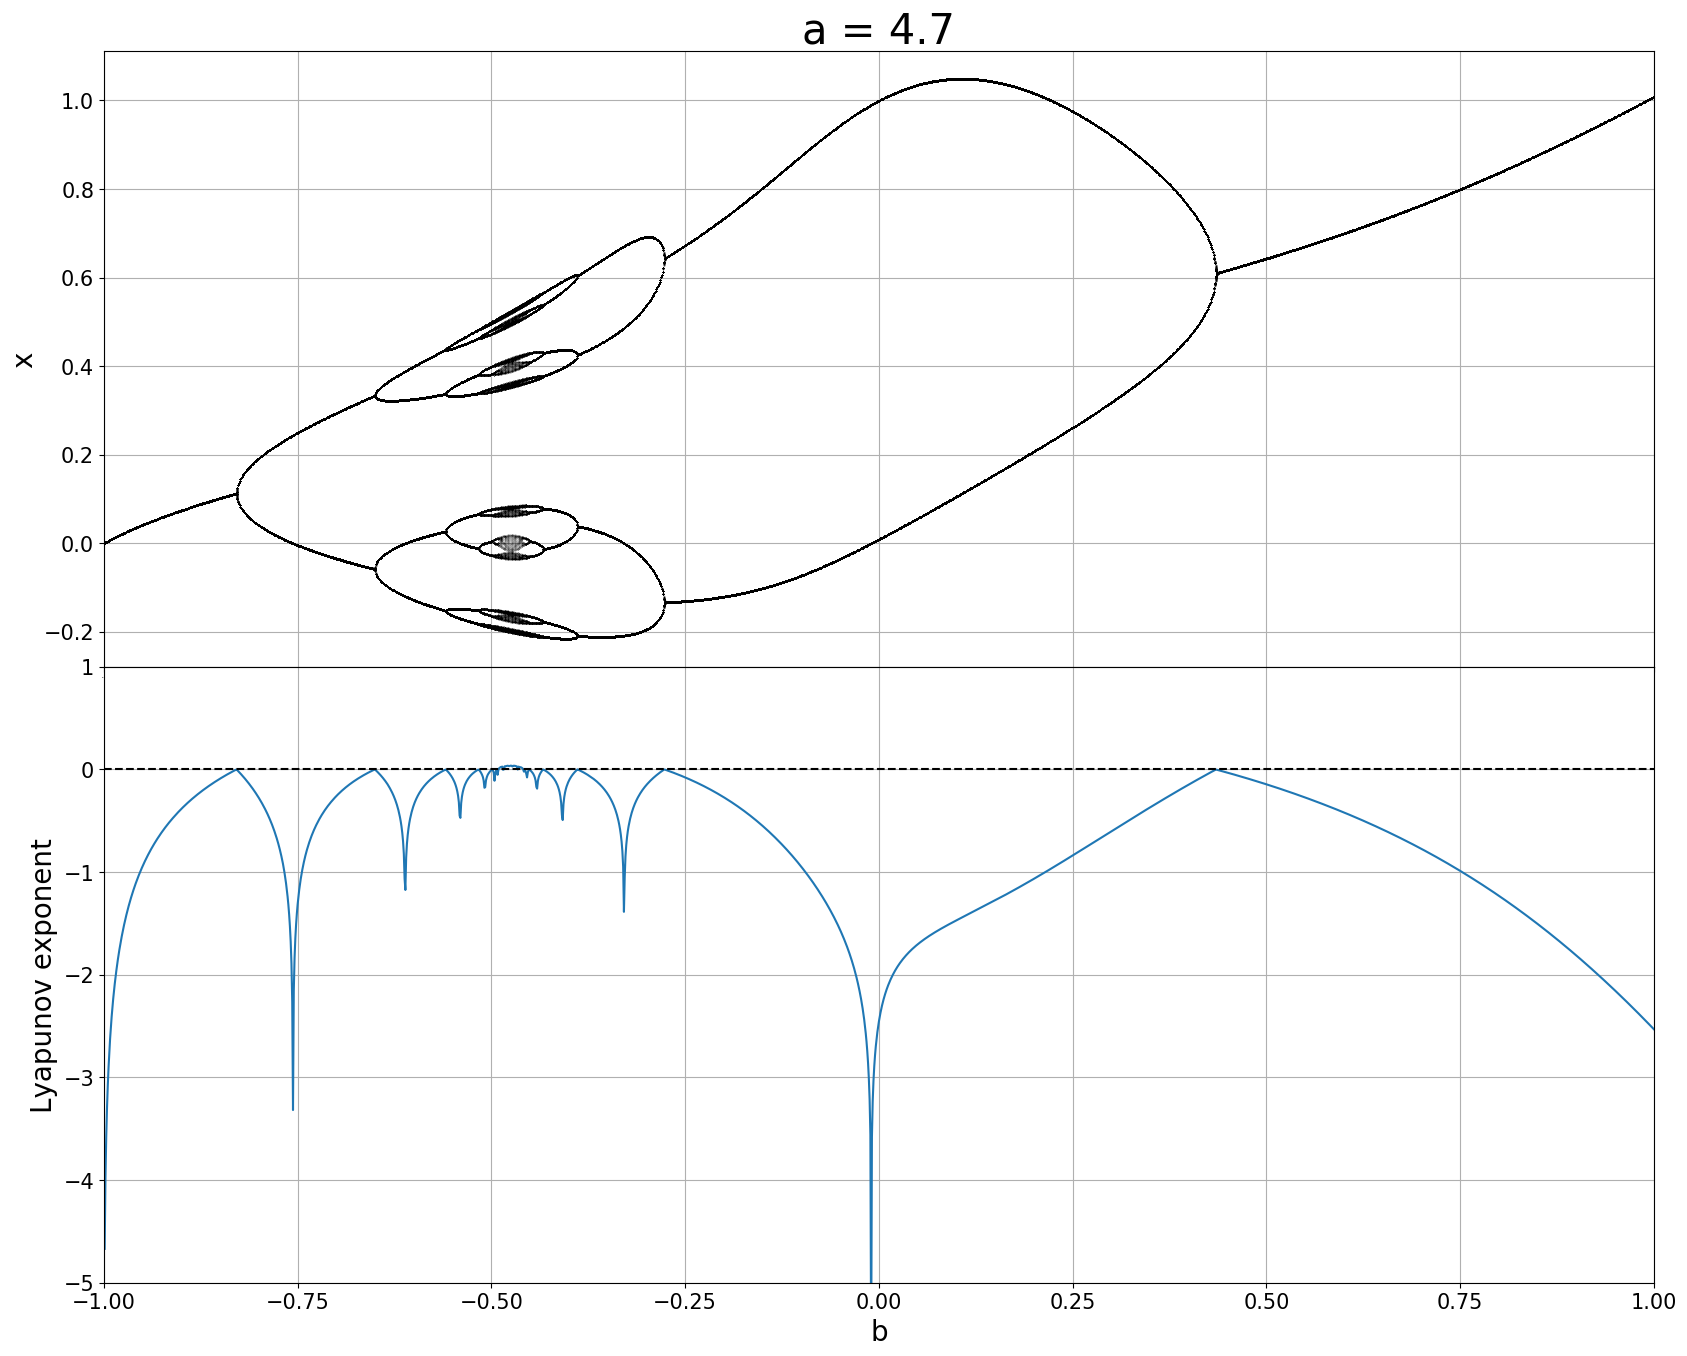

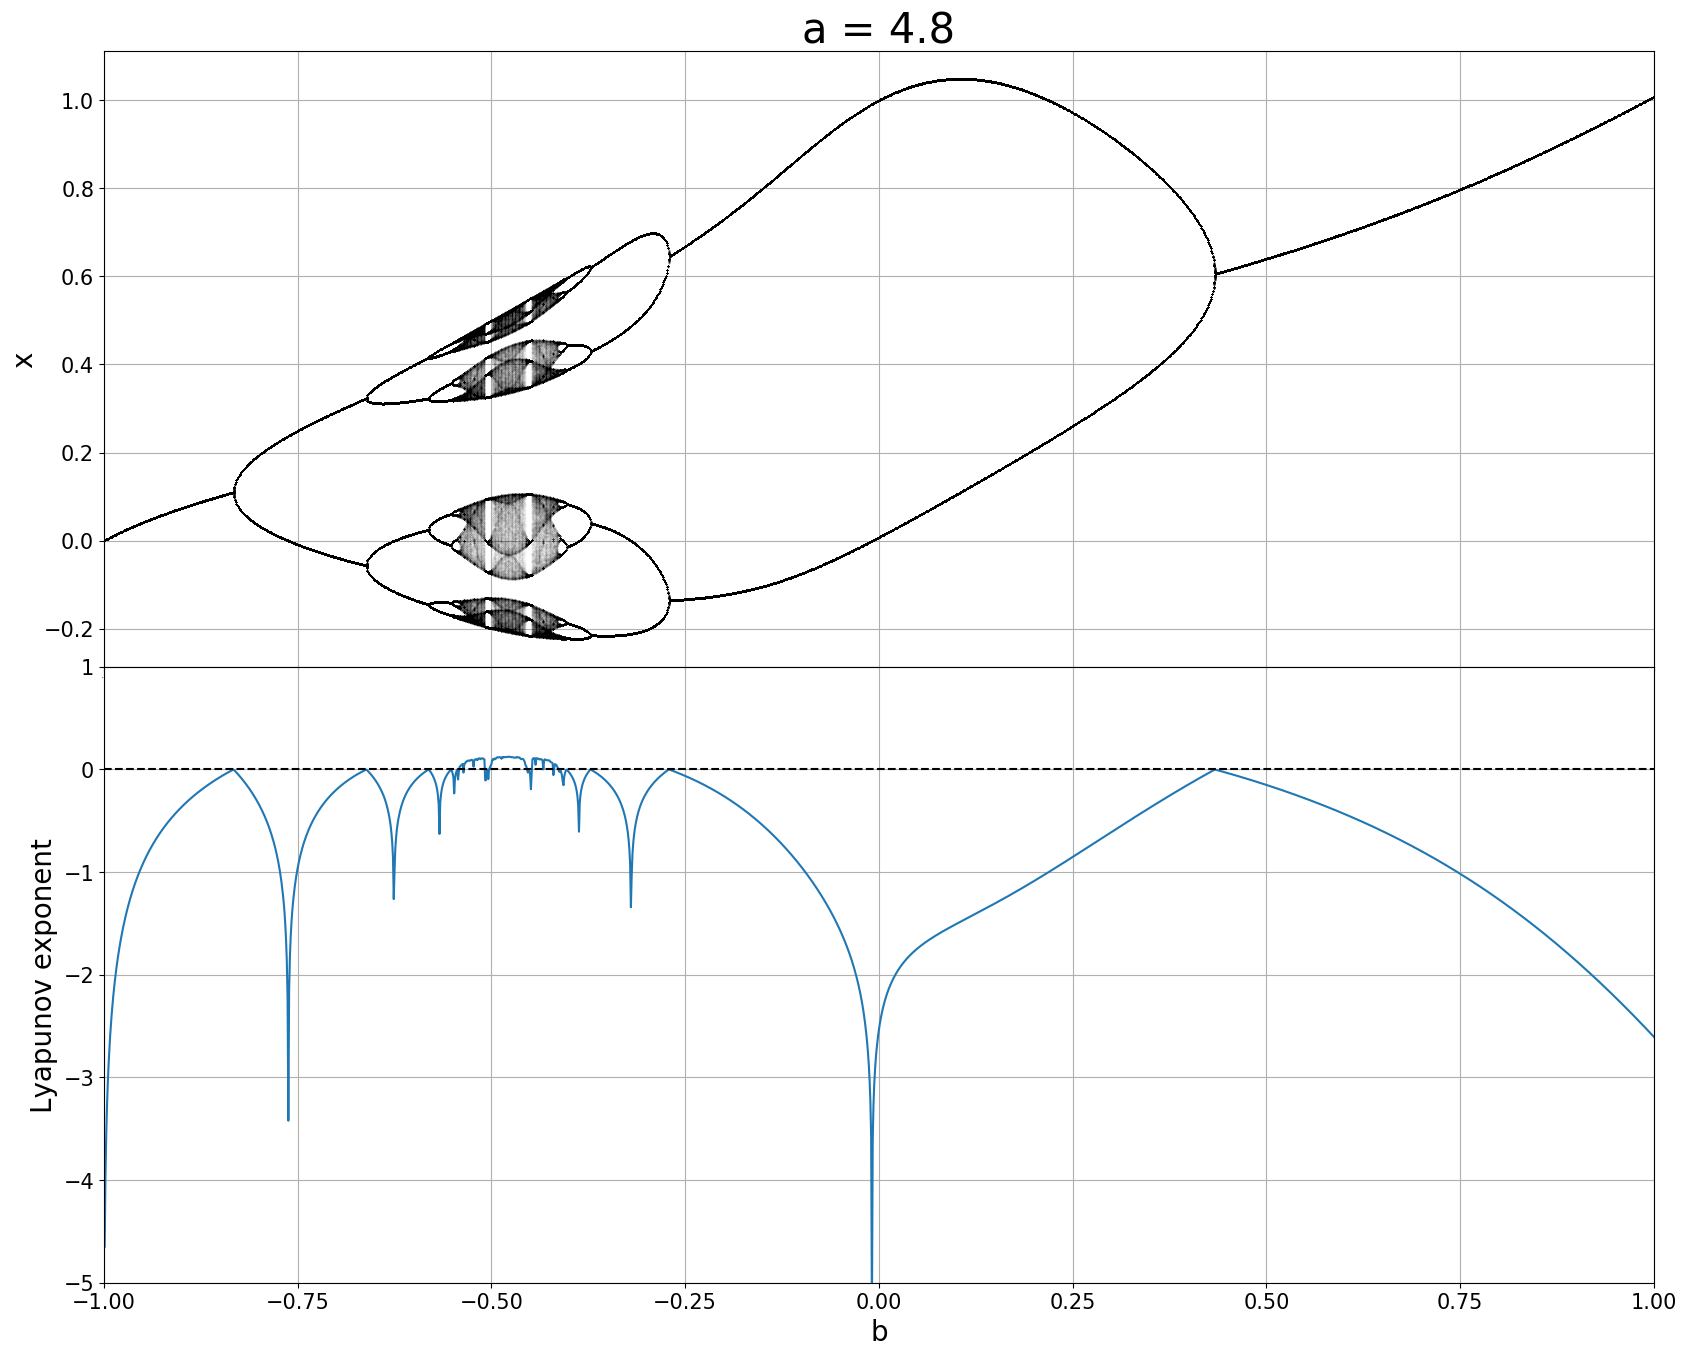

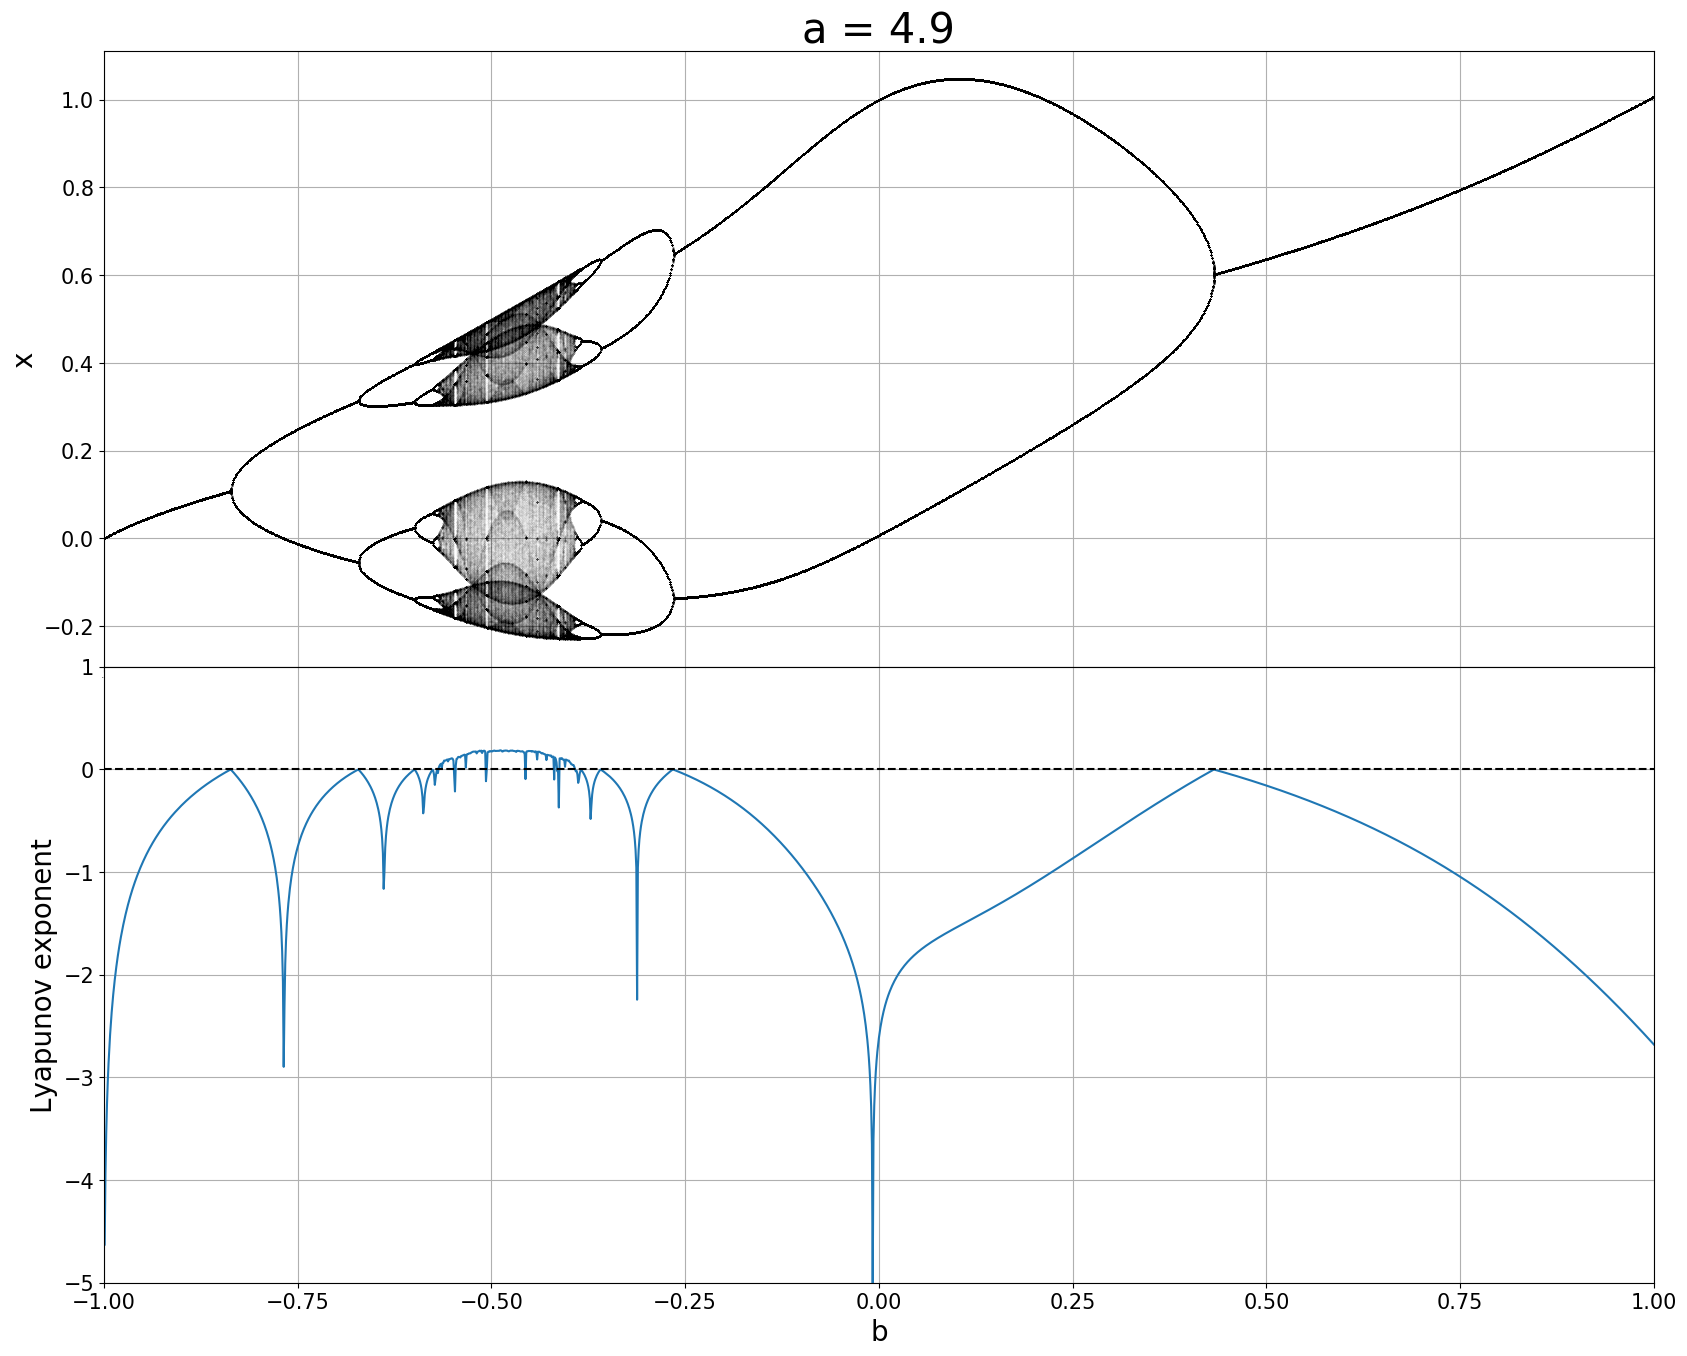

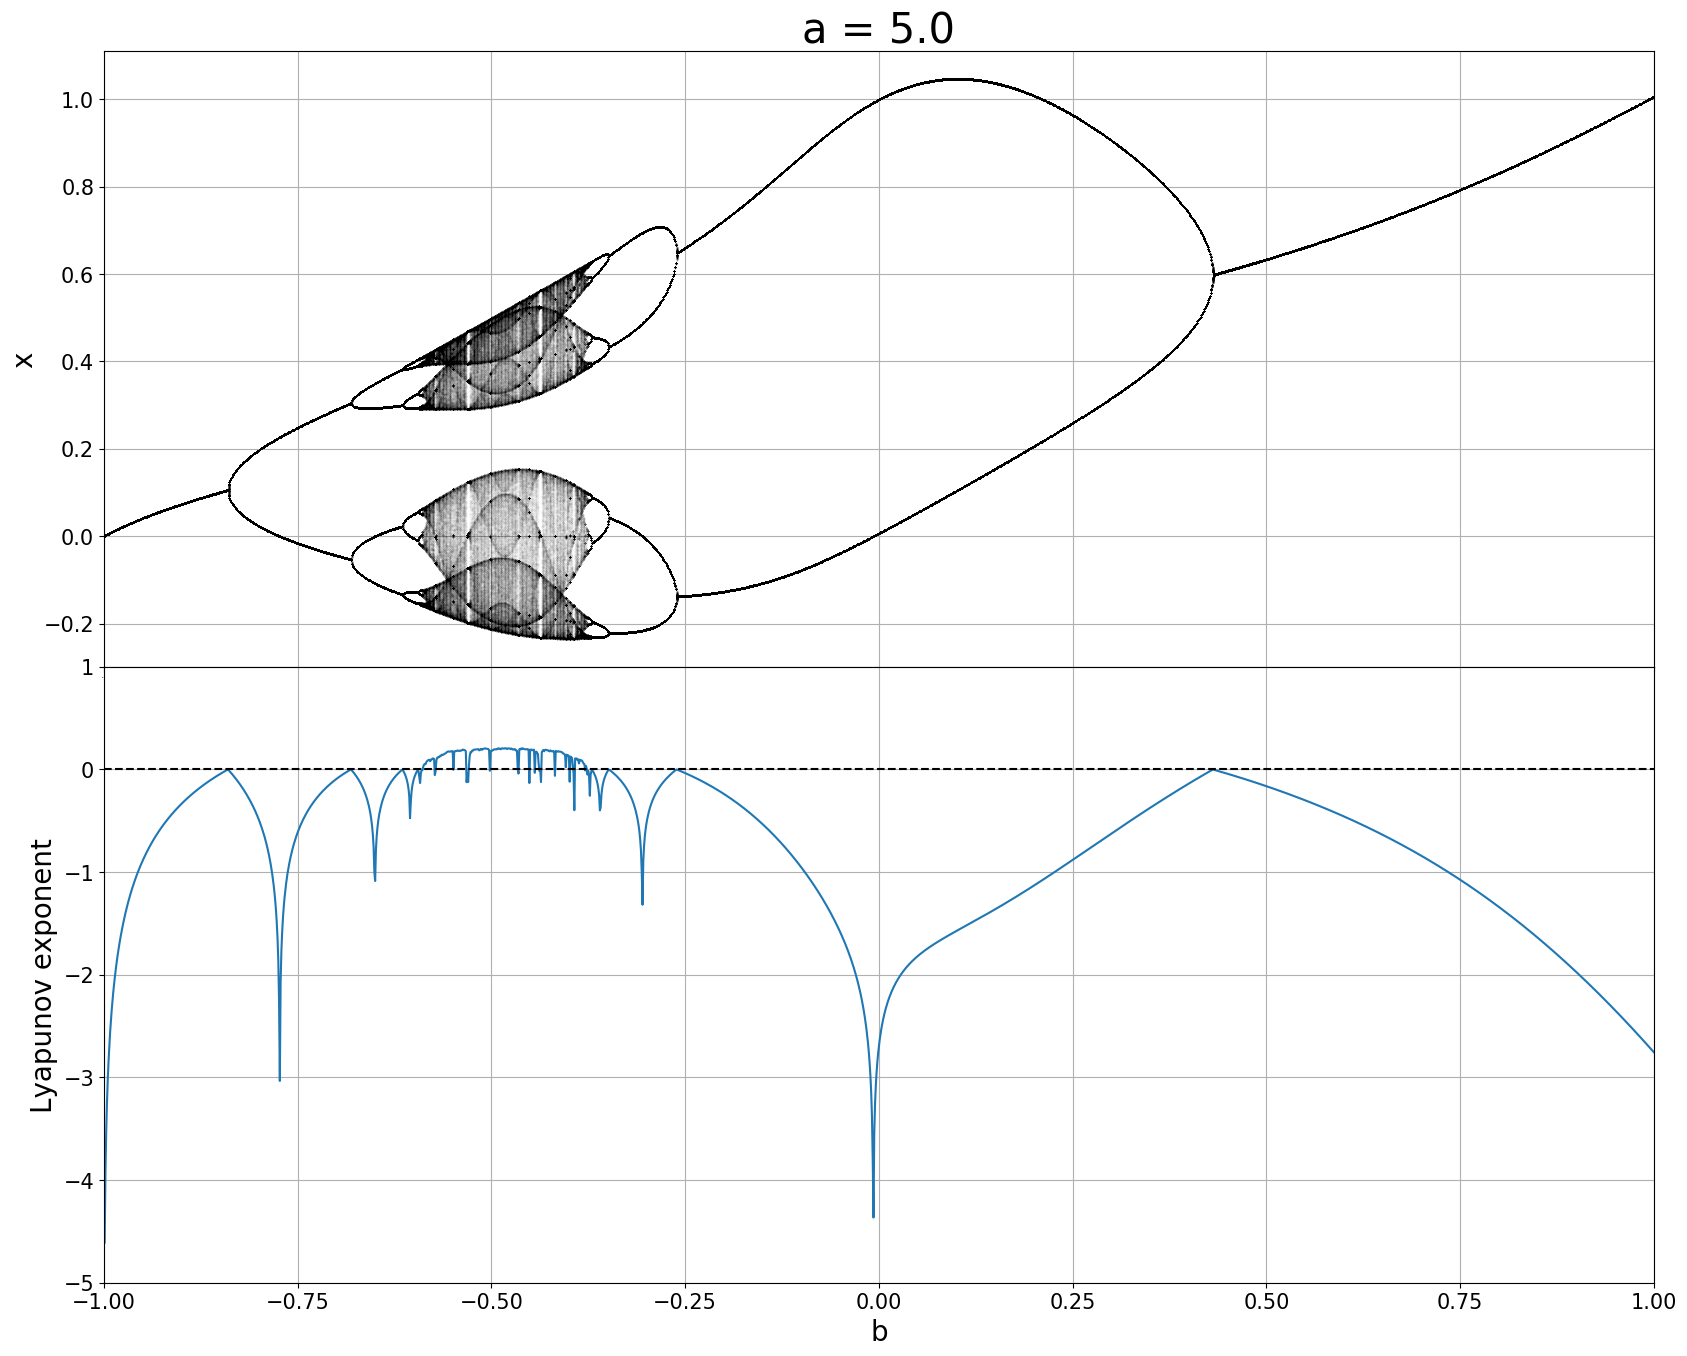

In [4]:
for i in 1:10
    a = 4+i/10
    x, y, t, L = mychaos(a)
    myplot(x, y, a, t, L)
    savefig("plots/a$a.png", dpi = 700)
end

In [ ]:
for i in 4:9
    a = 5+i/10
    x, y, t, L = mychaos(a)
    myplot(x, y, a, t, L)
    savefig("plots/a$a.png", dpi = 700)
end

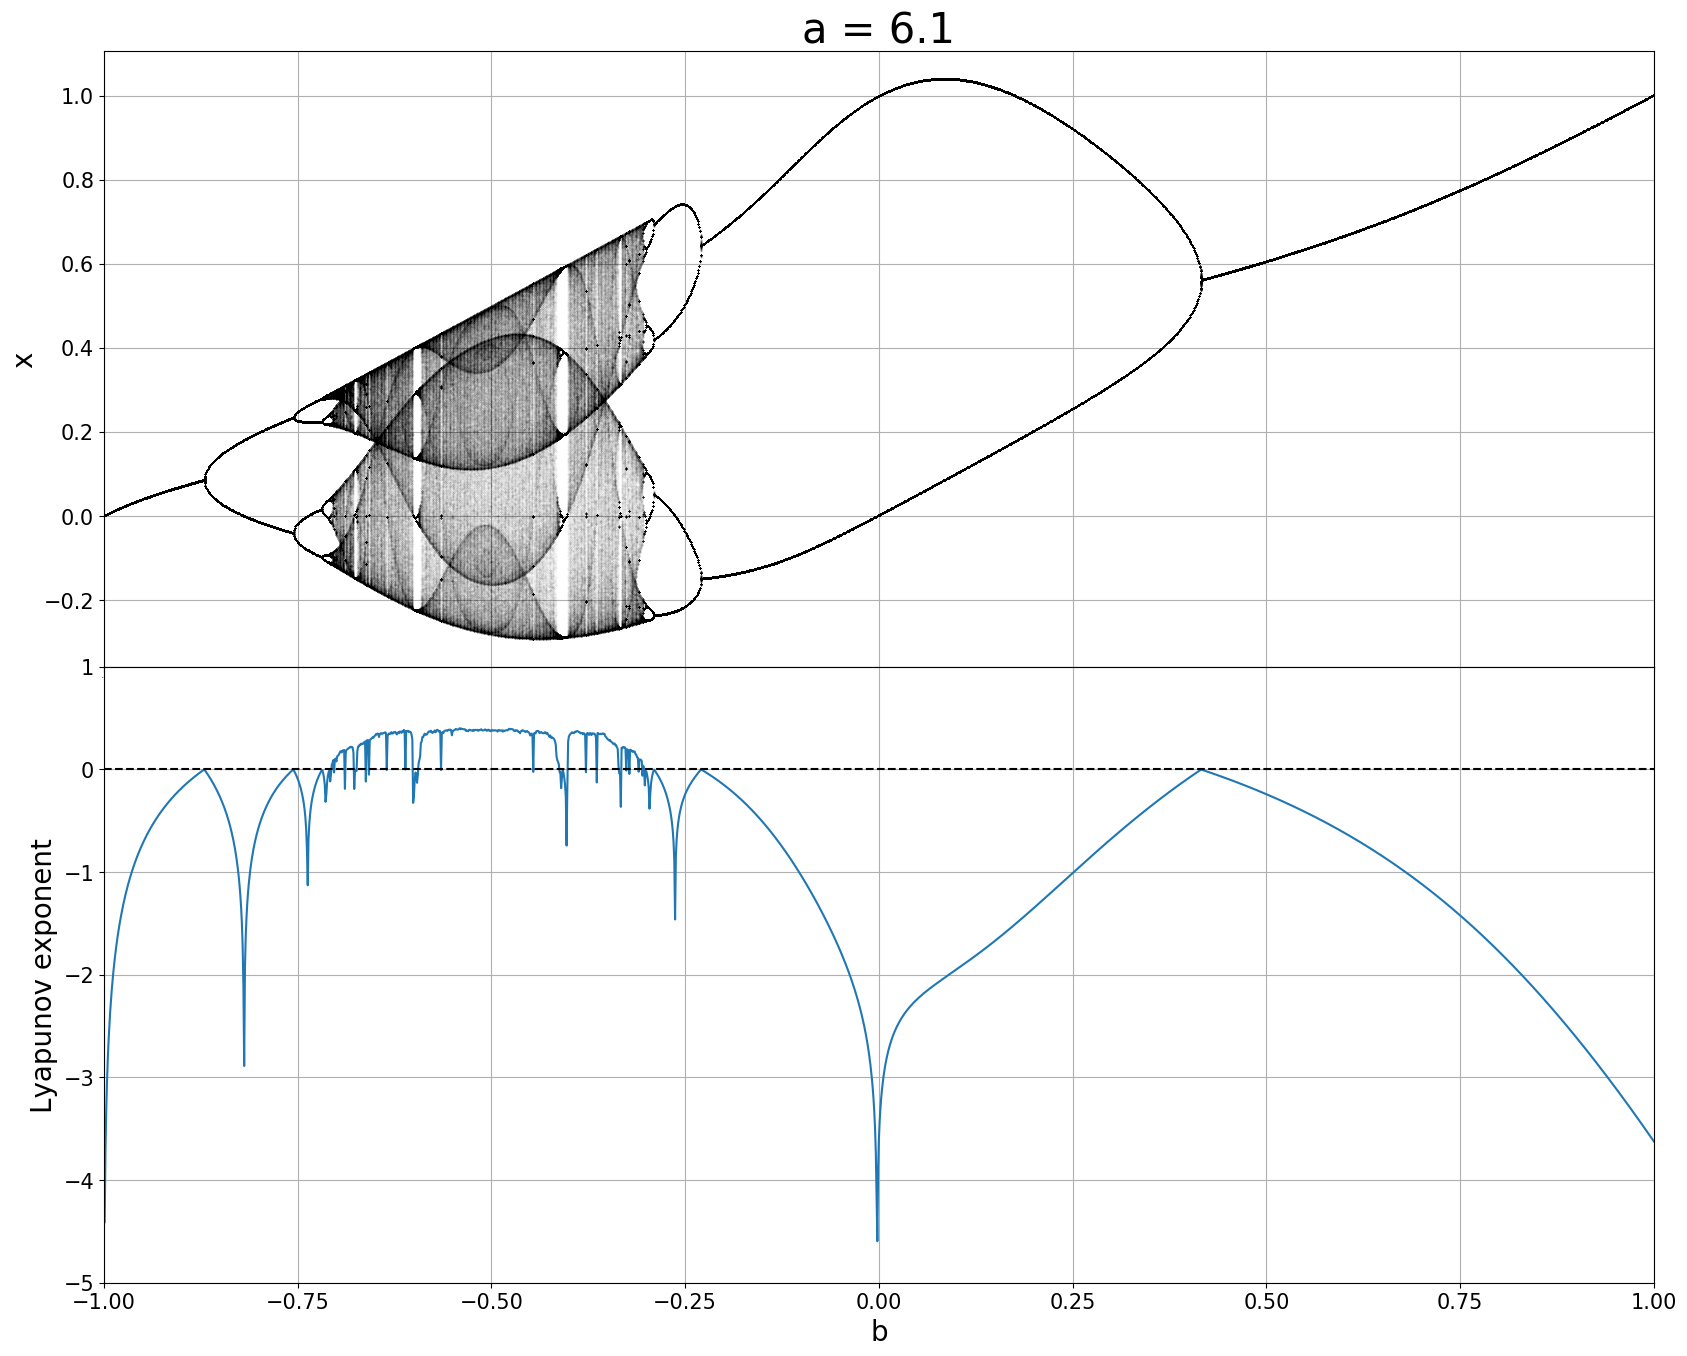

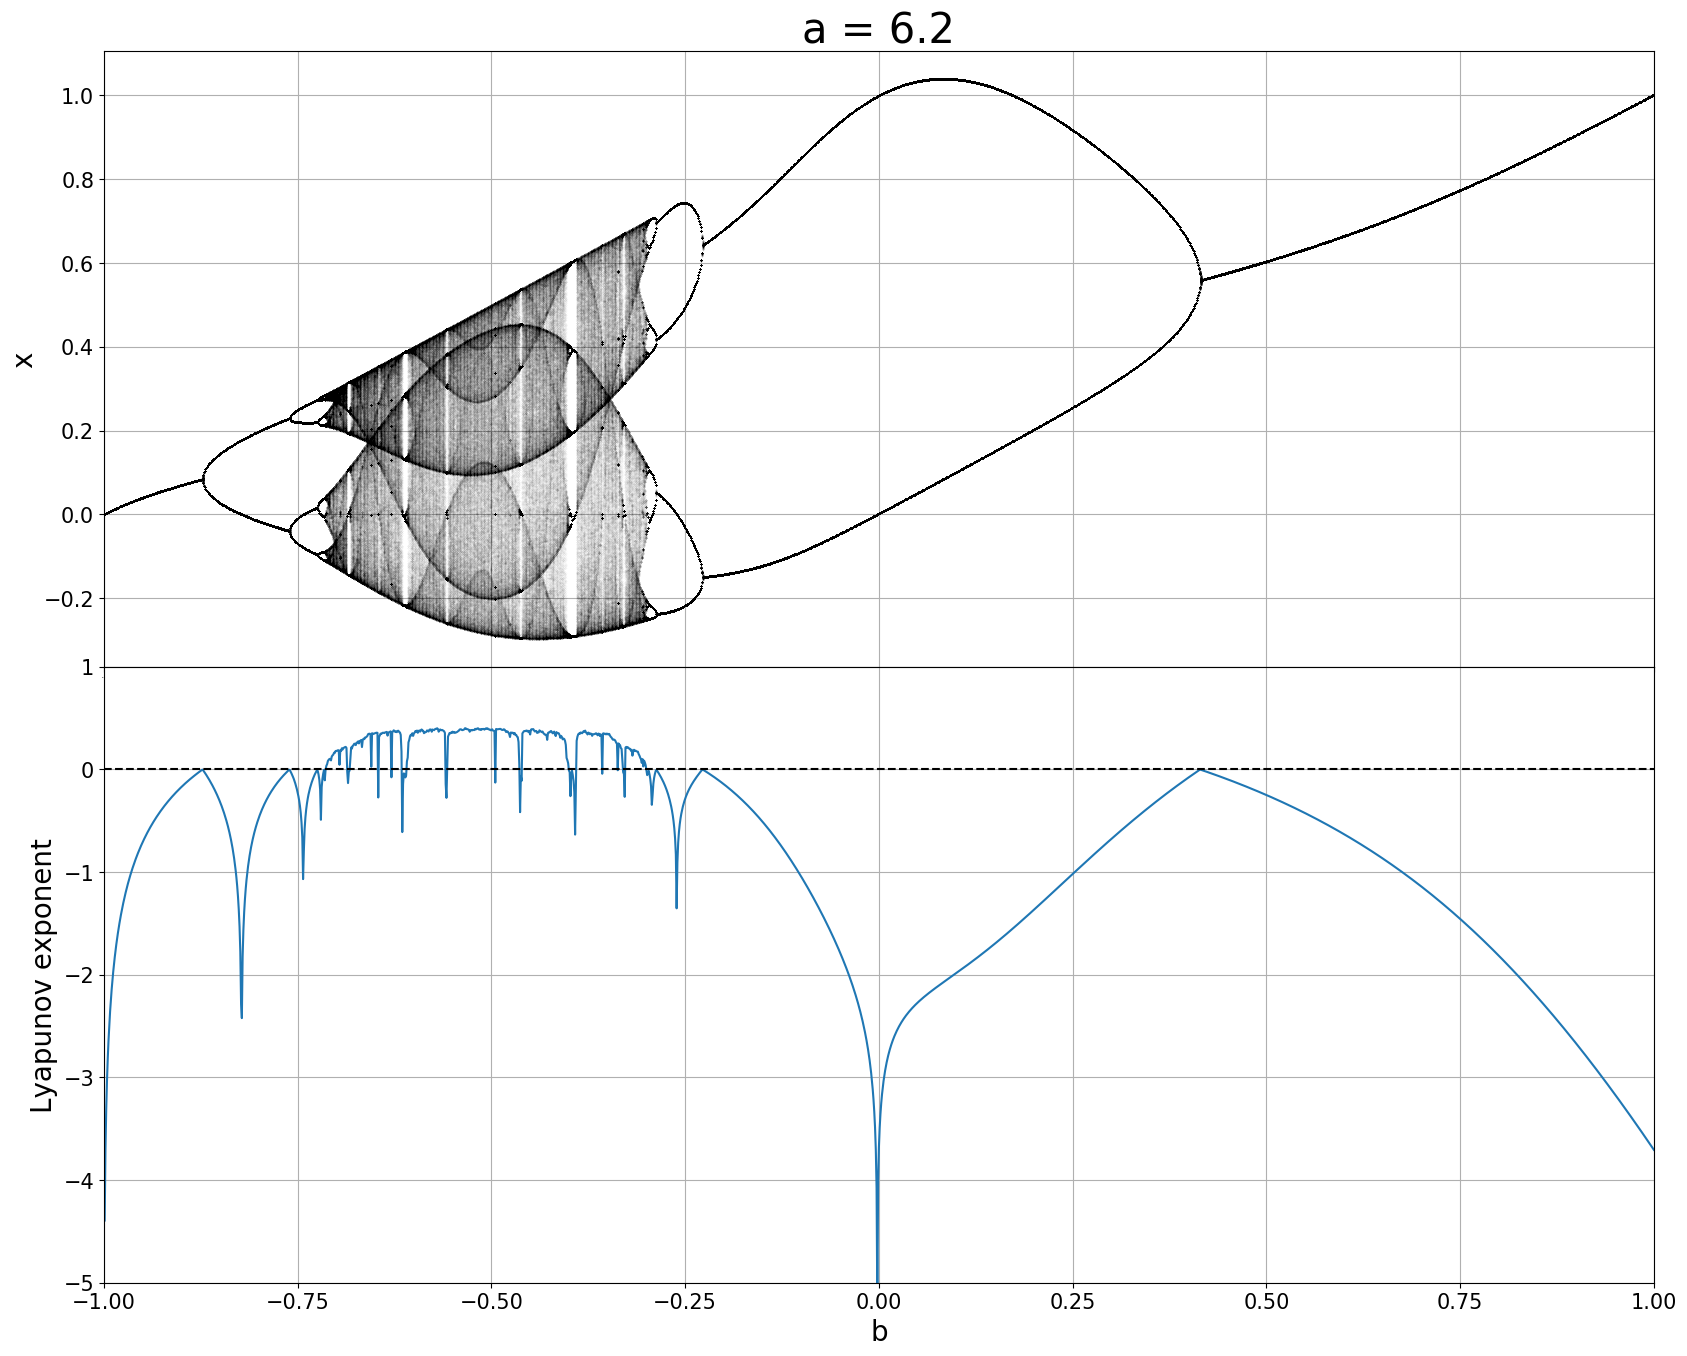

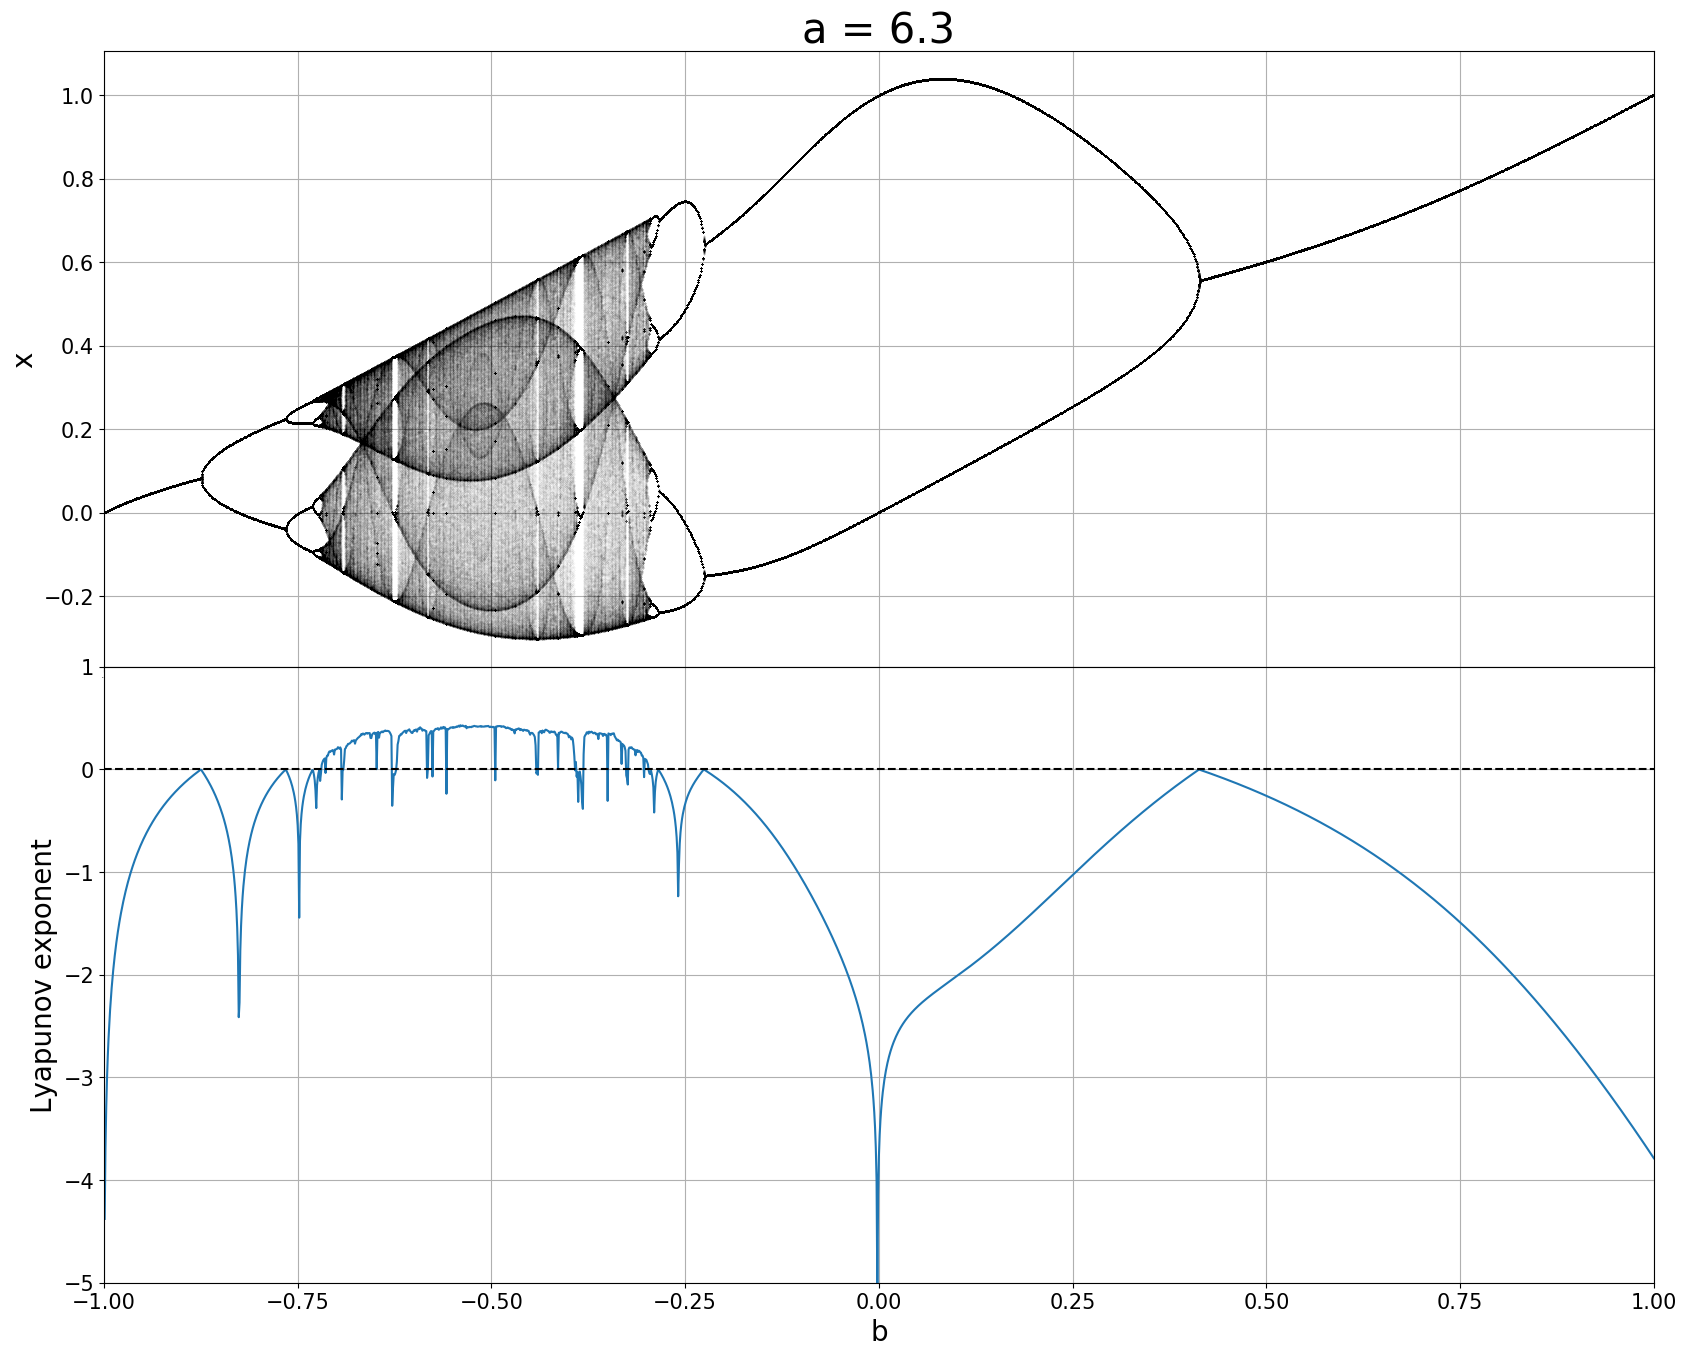

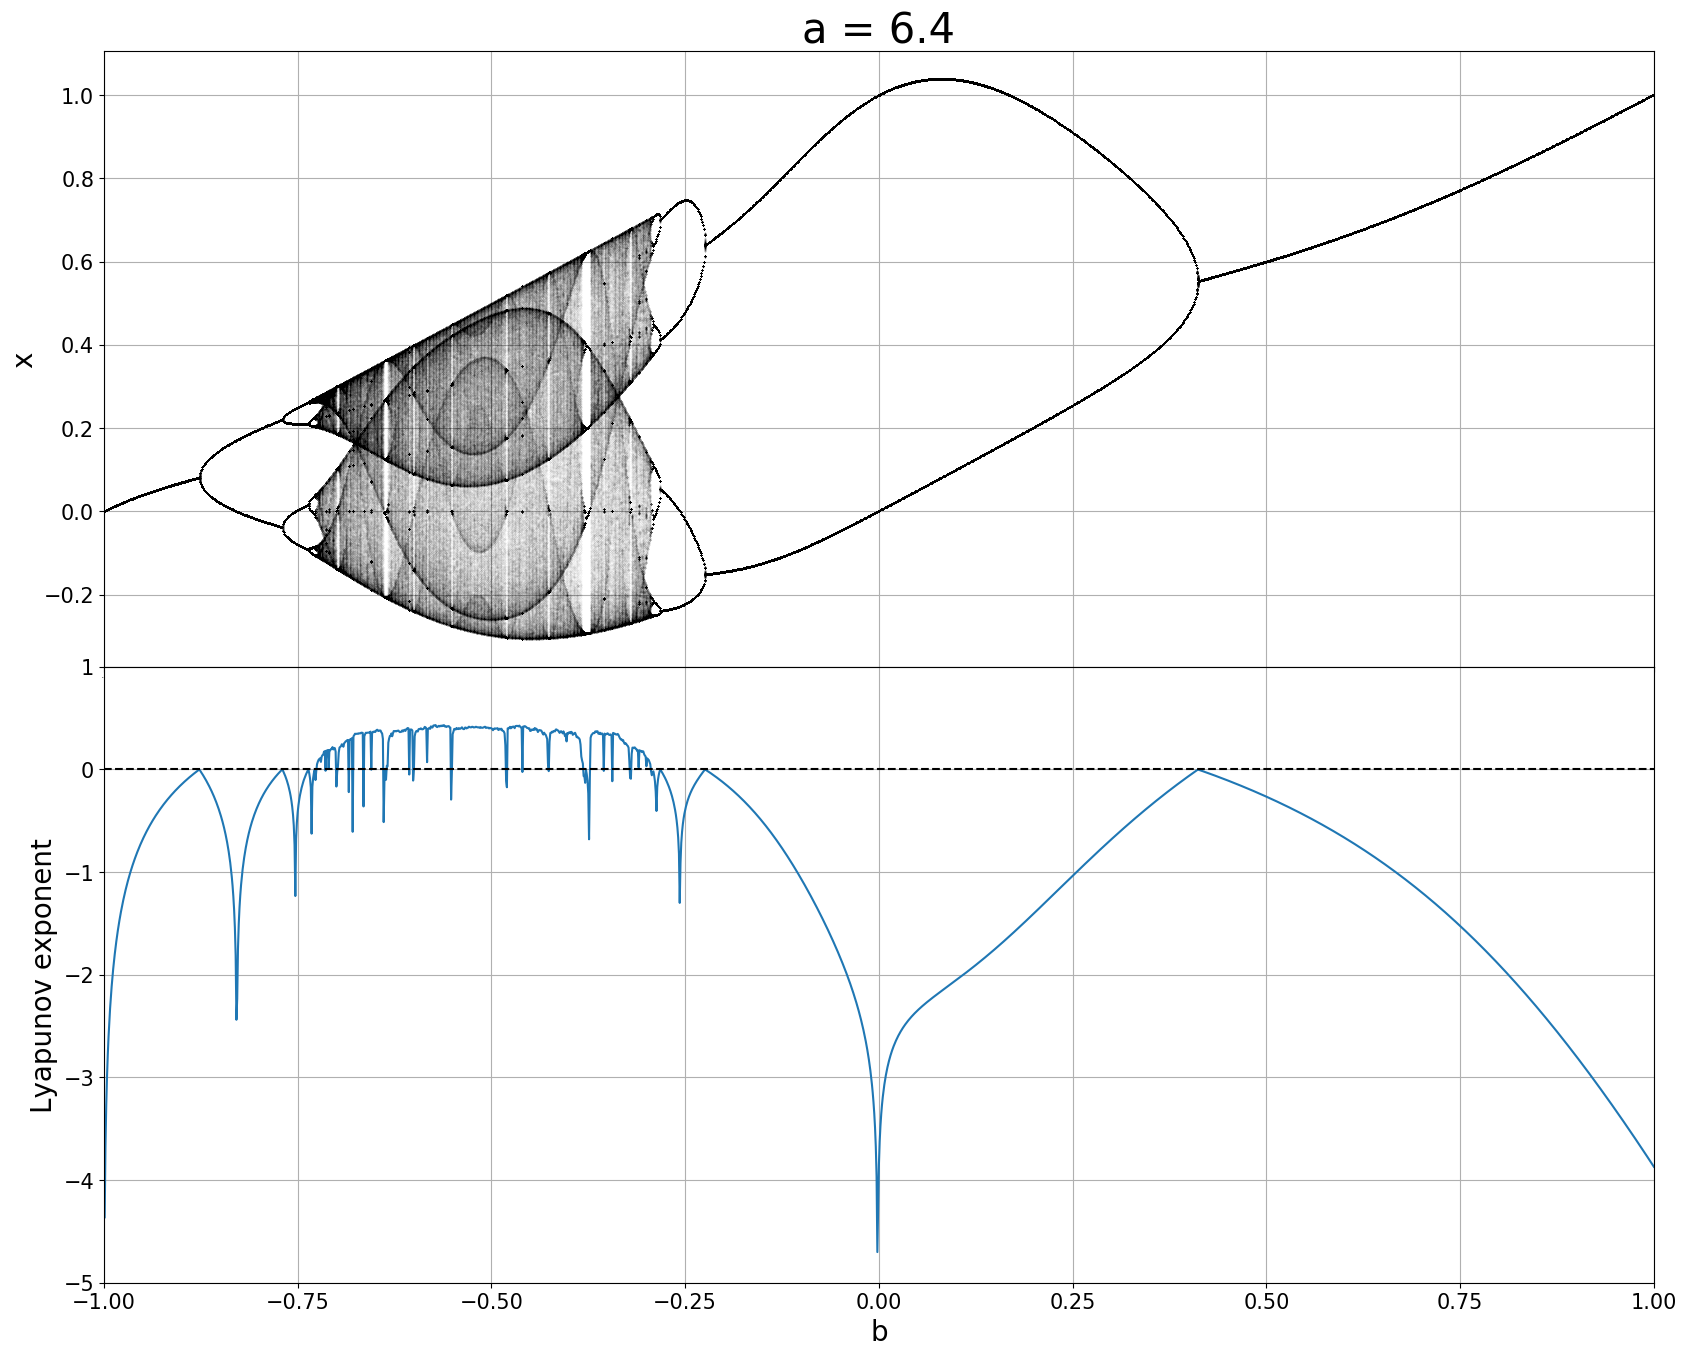

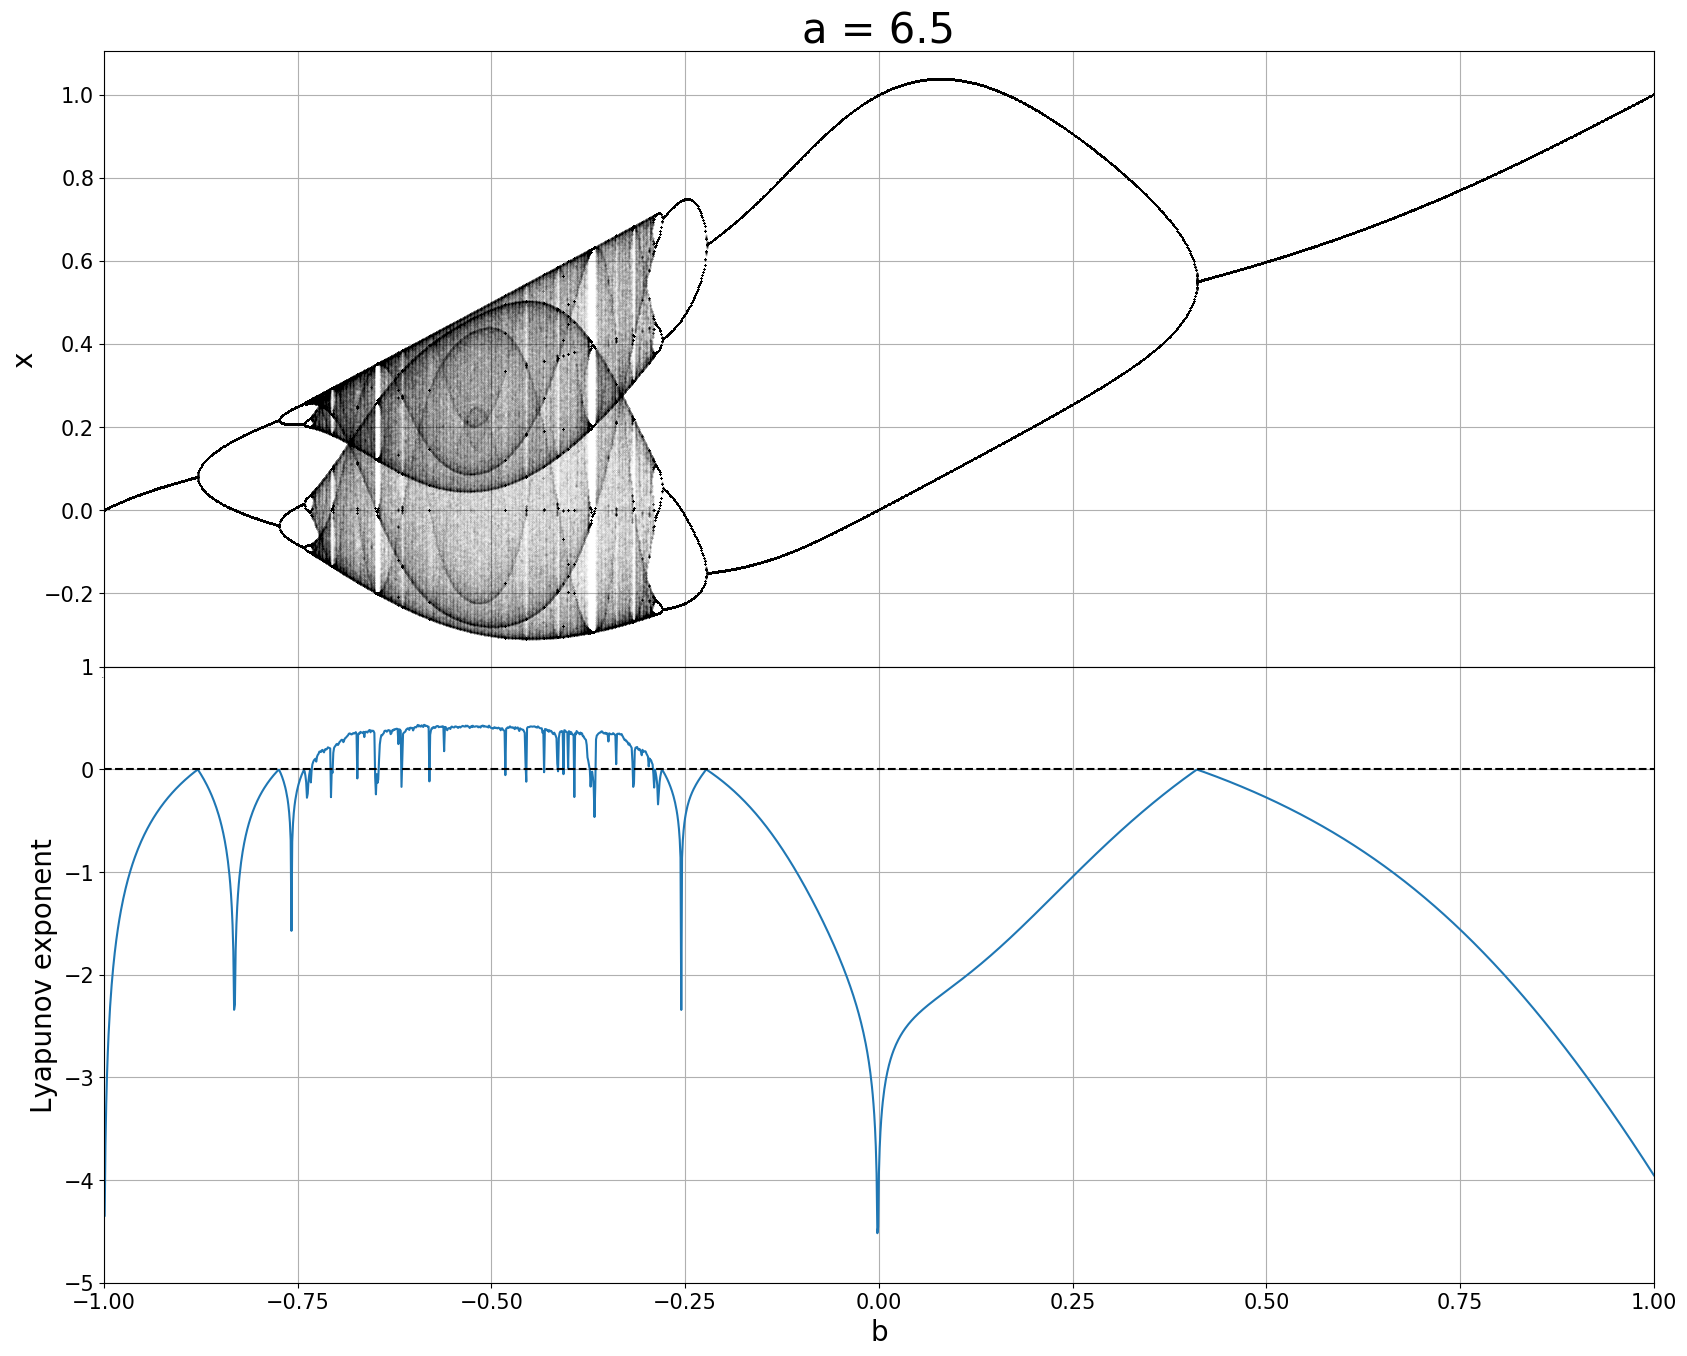

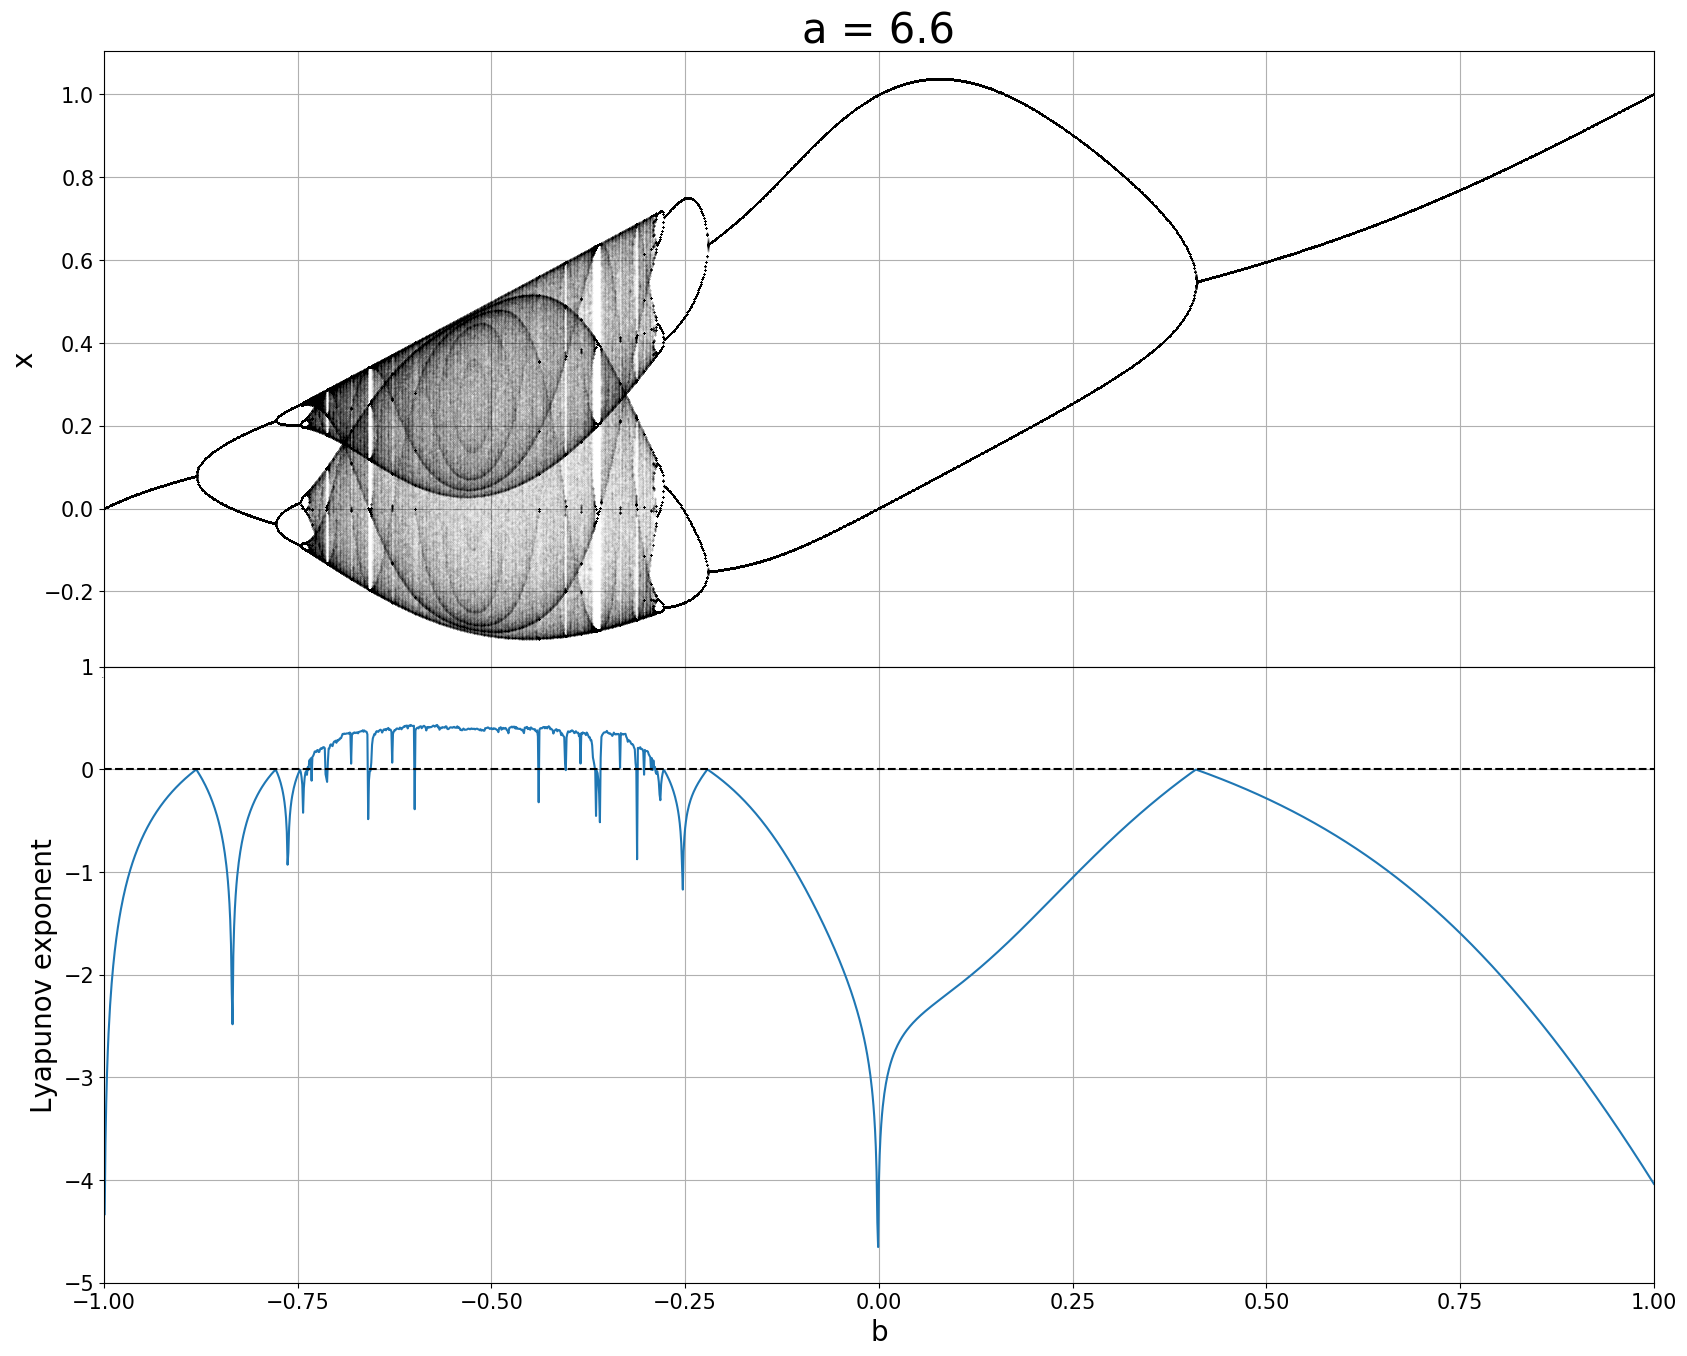

In [ ]:
for i in 1:9
    a = 6+i/10
    x, y, t, L = mychaos(a)
    myplot(x, y, a, t, L)
    savefig("plots/a$a.png", dpi = 700)
end

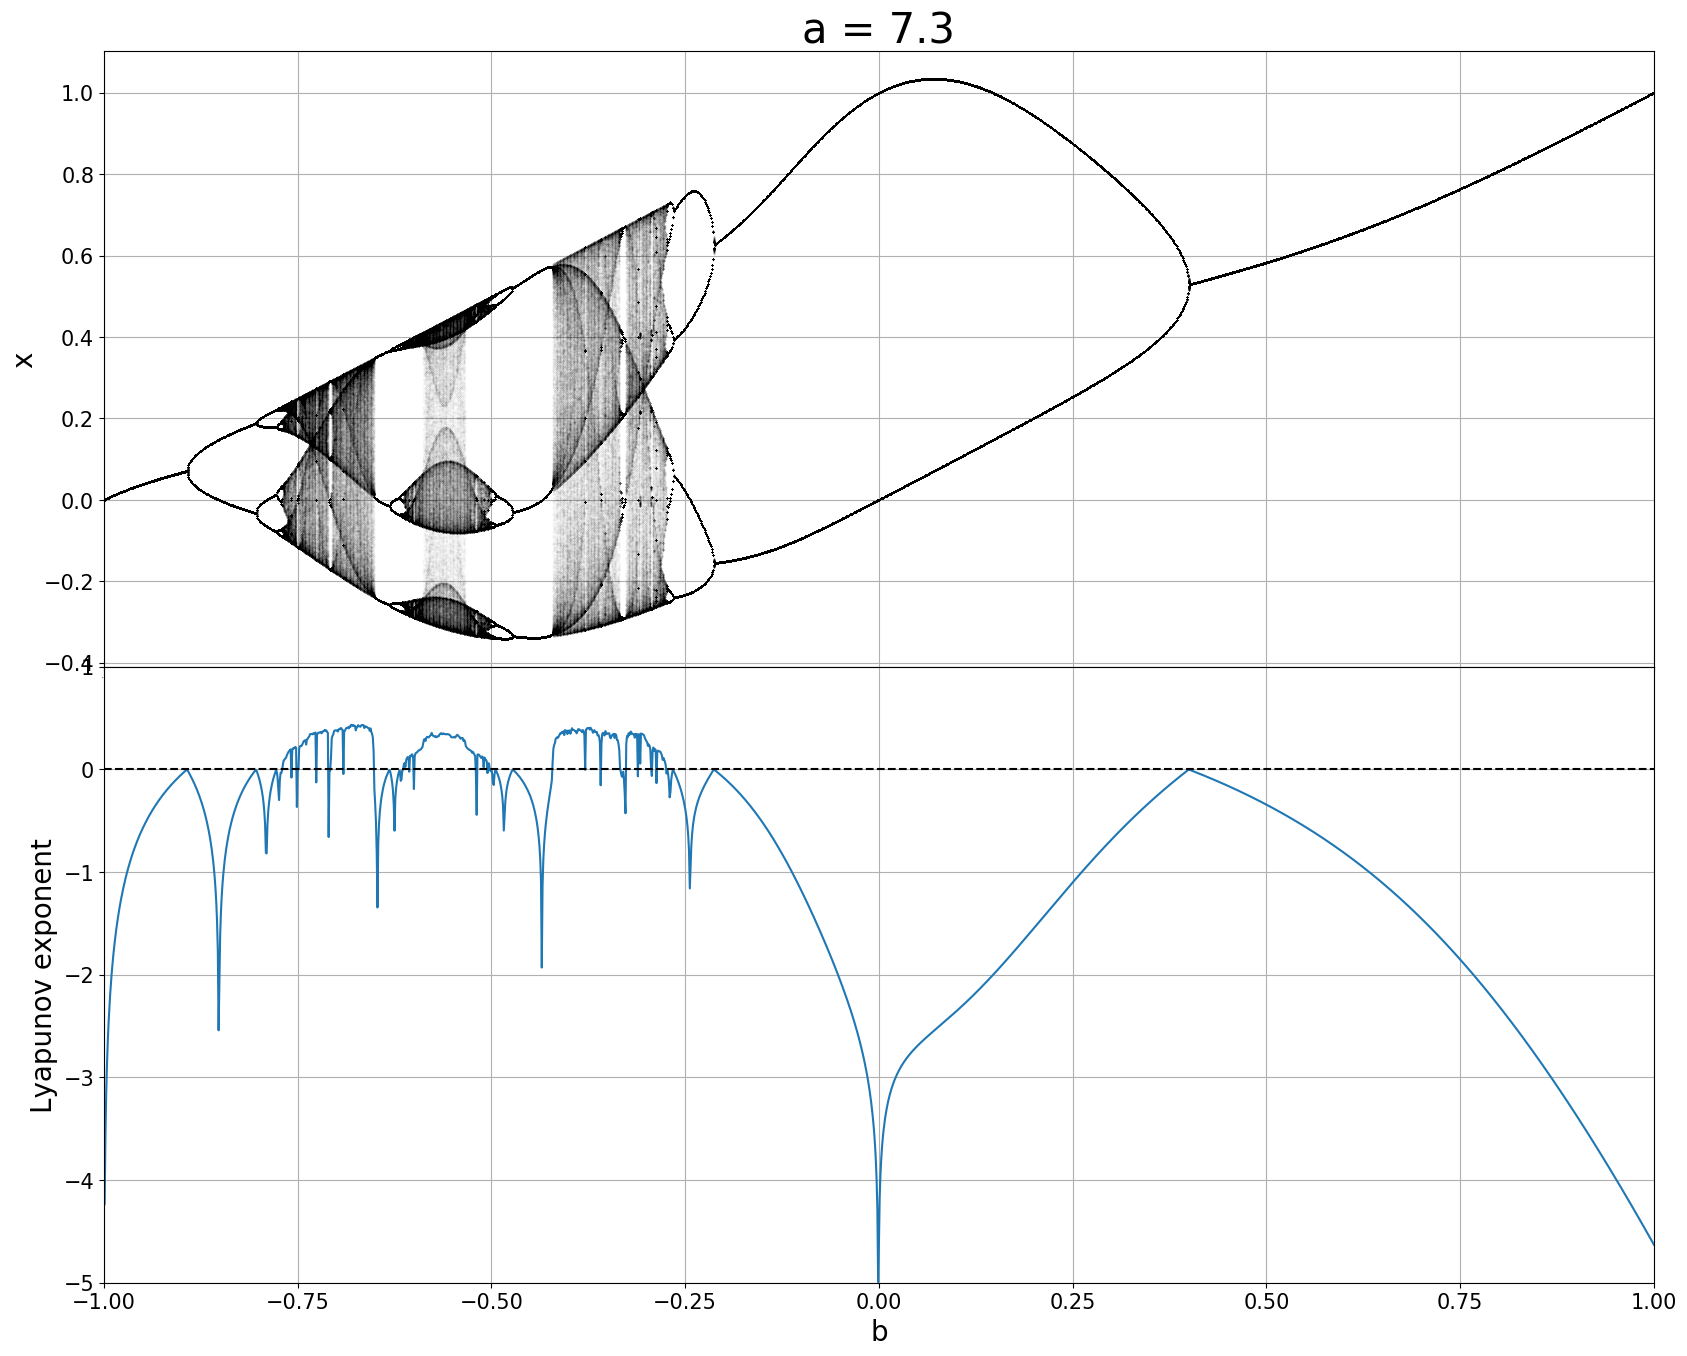

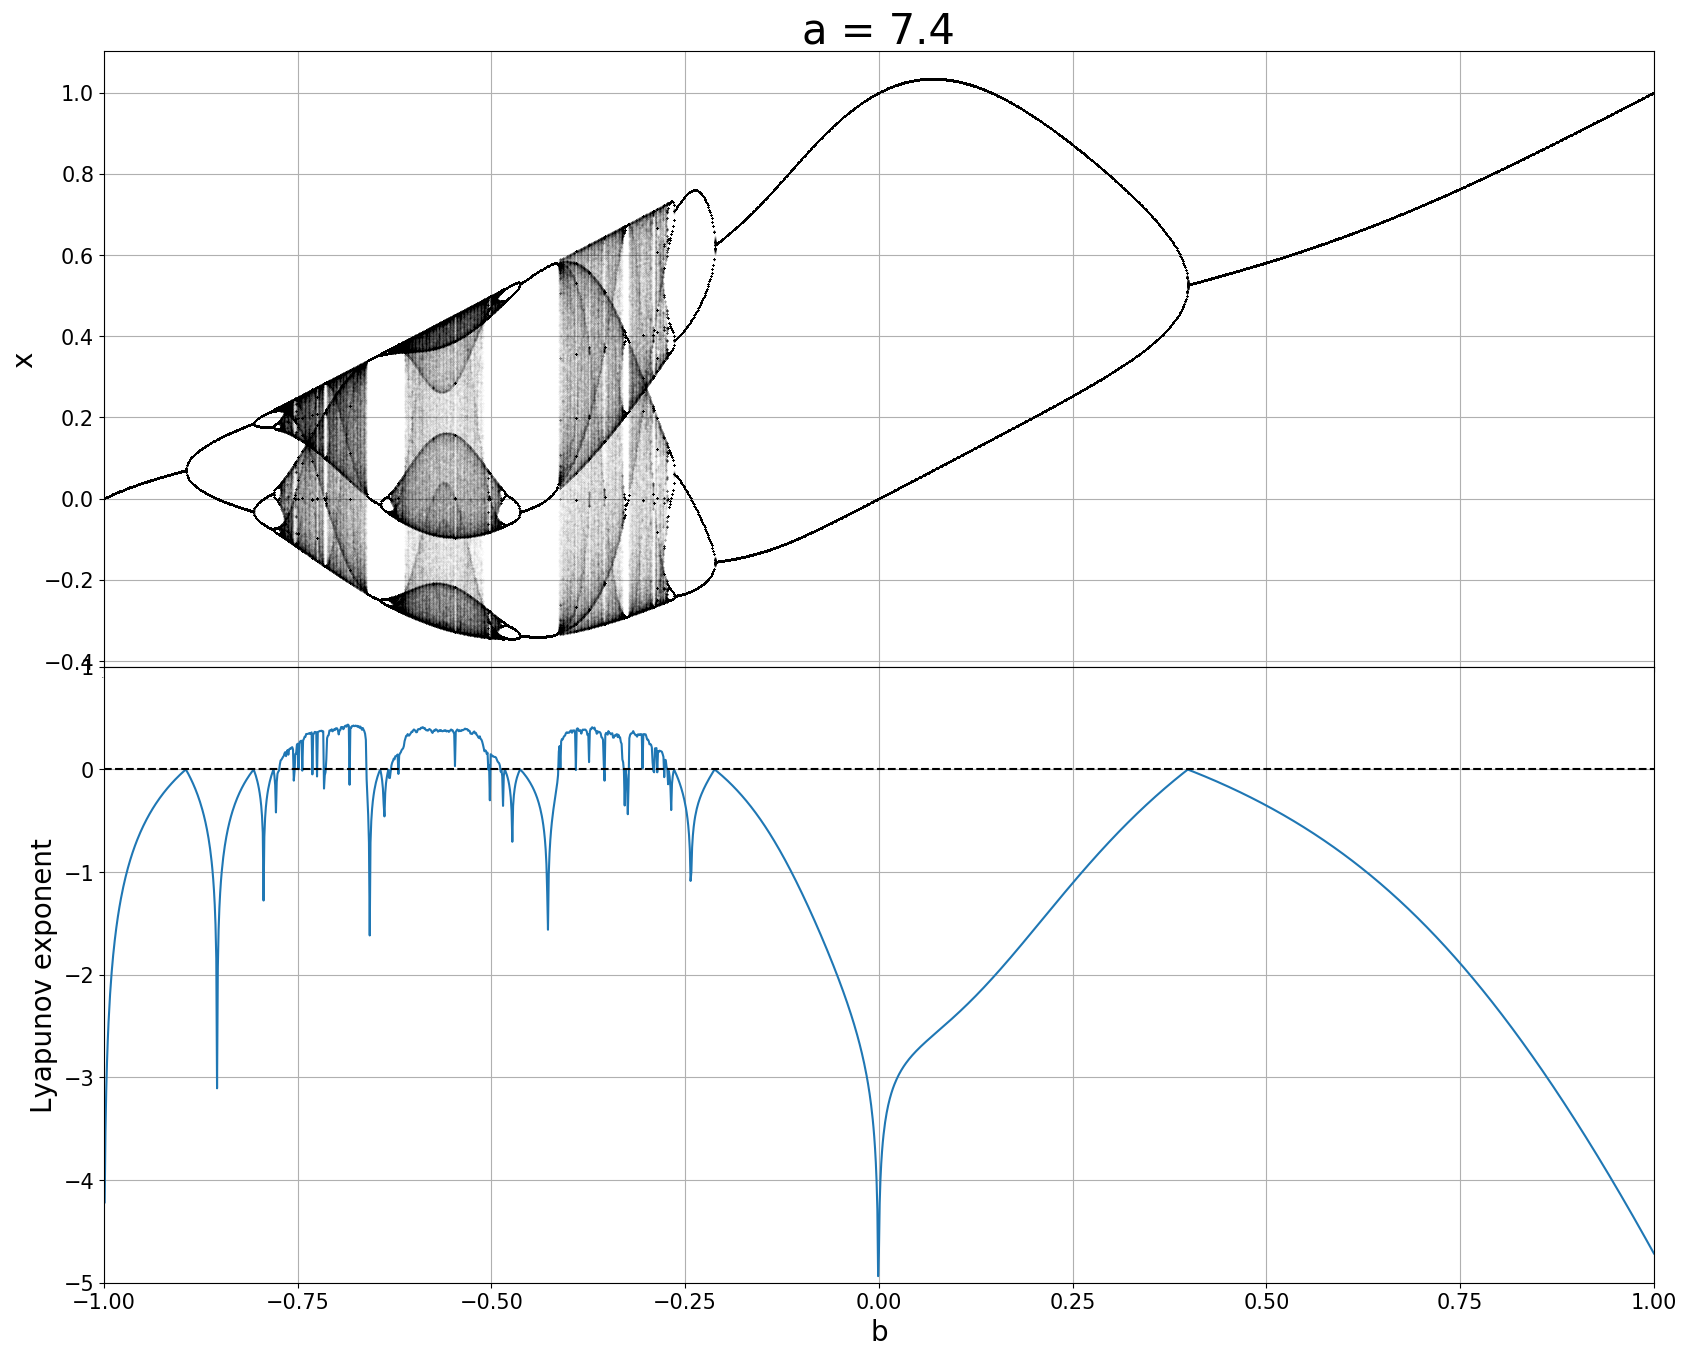

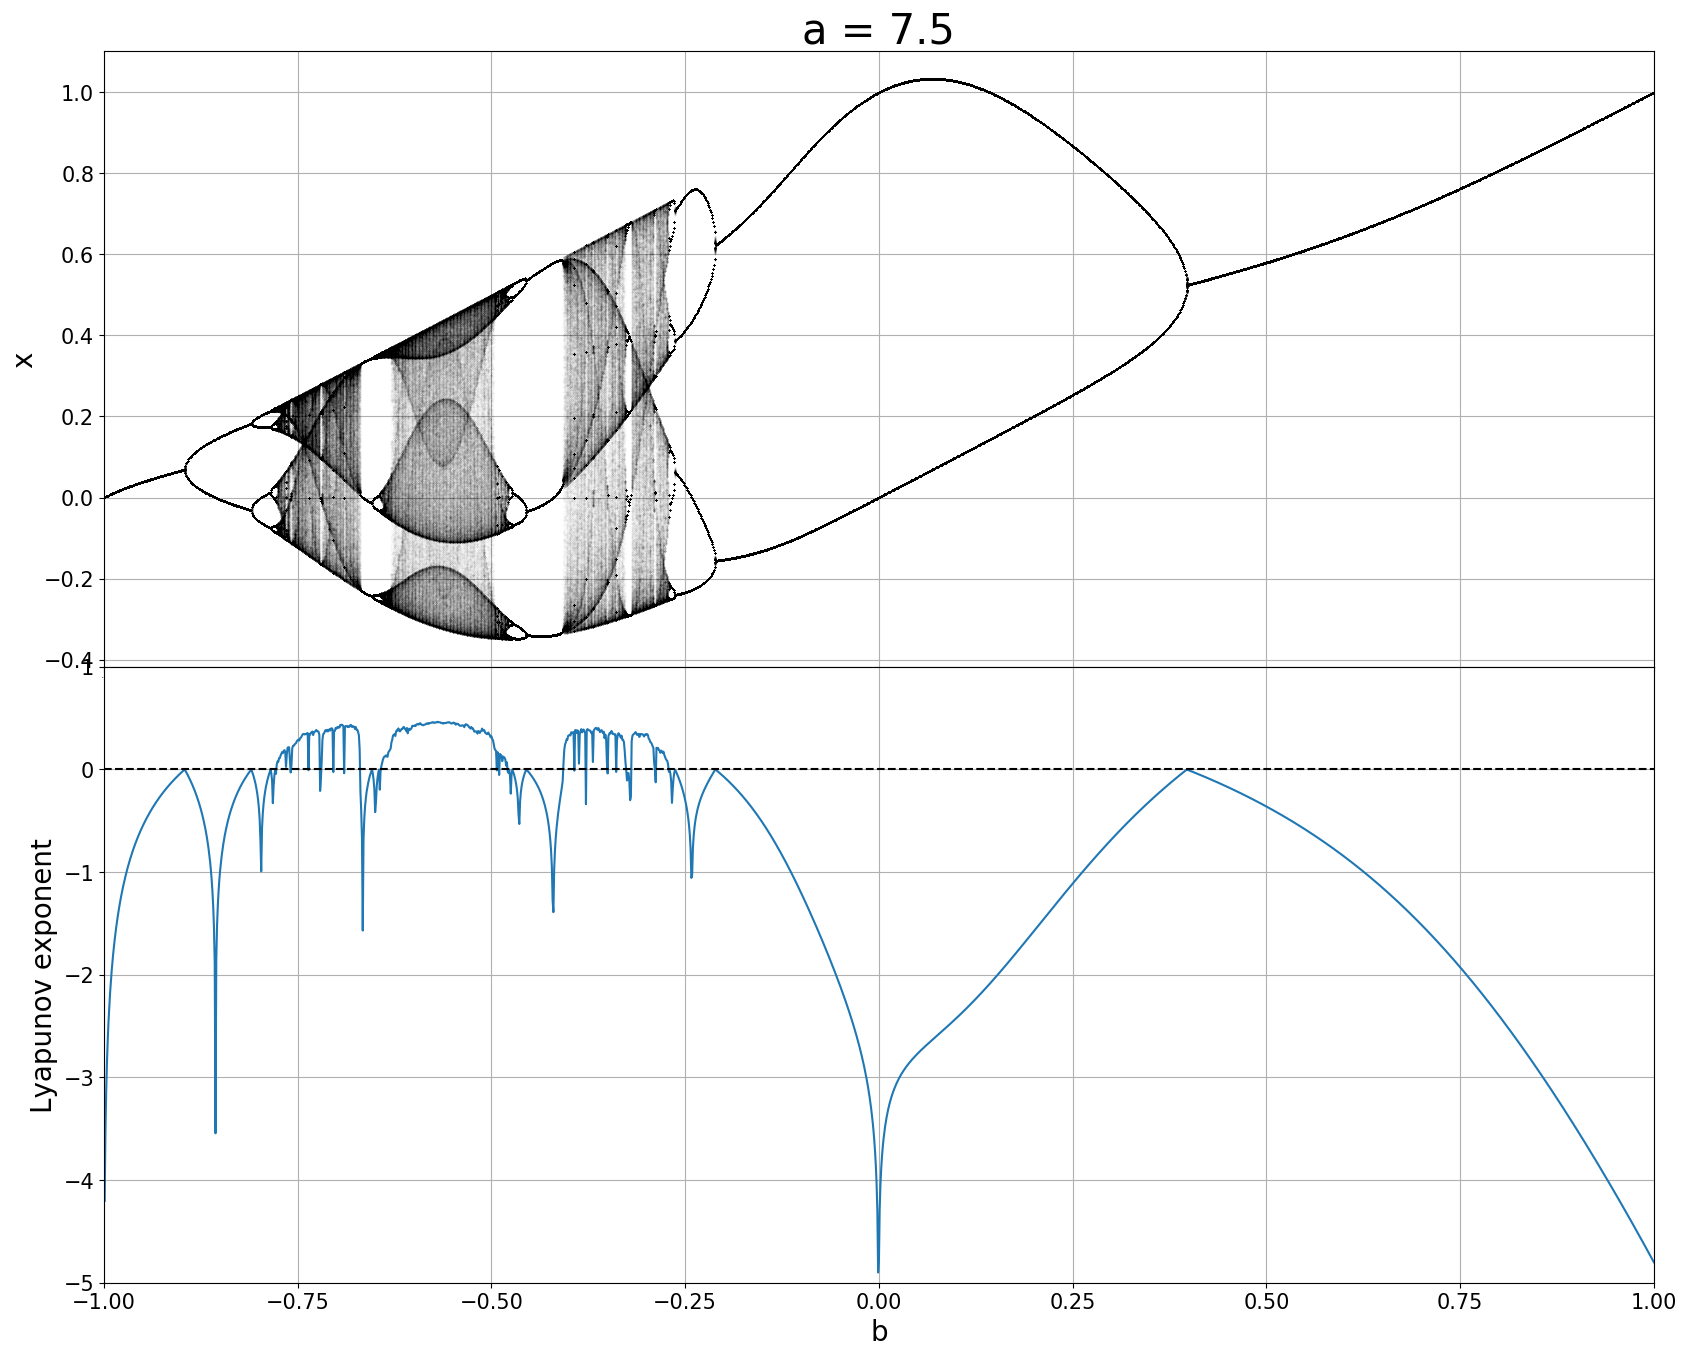

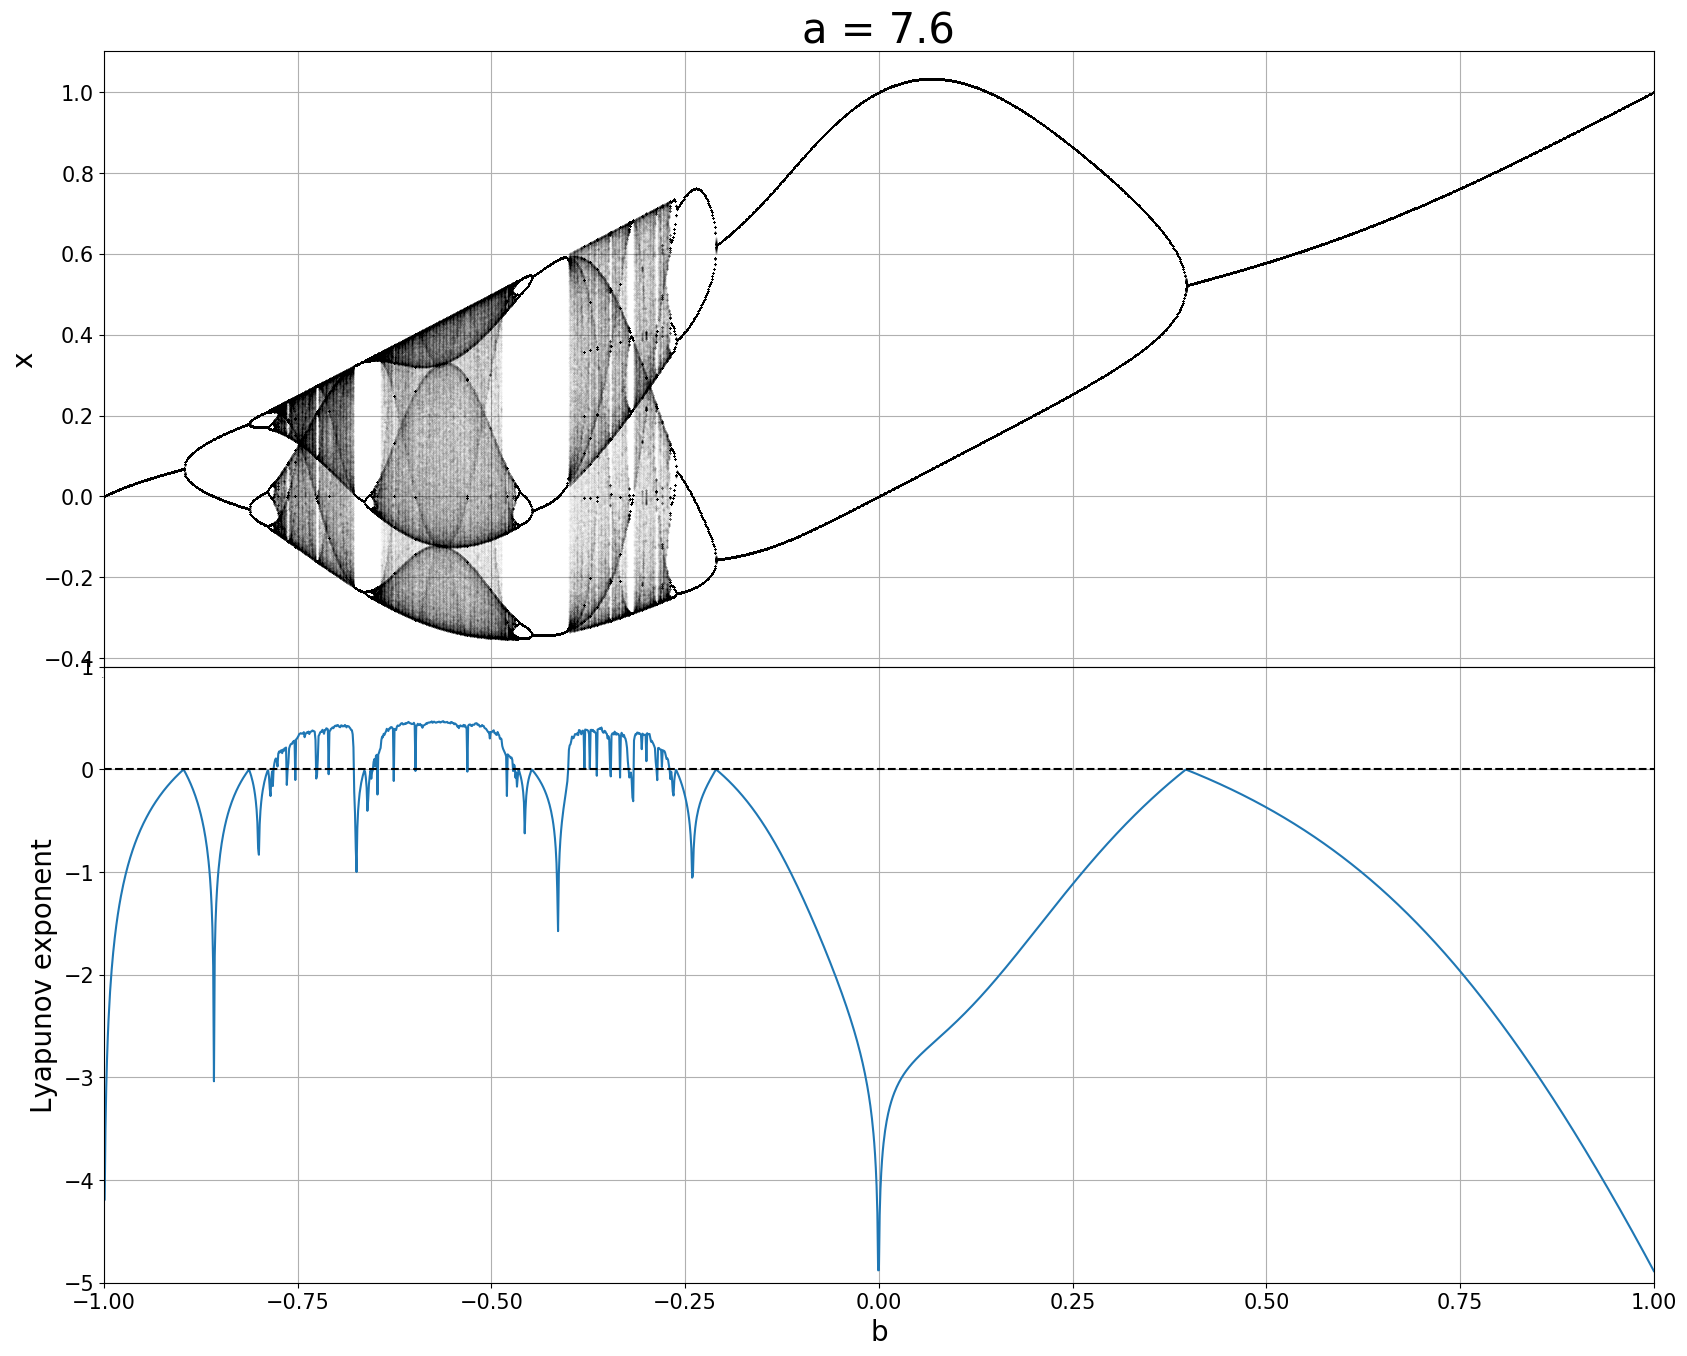

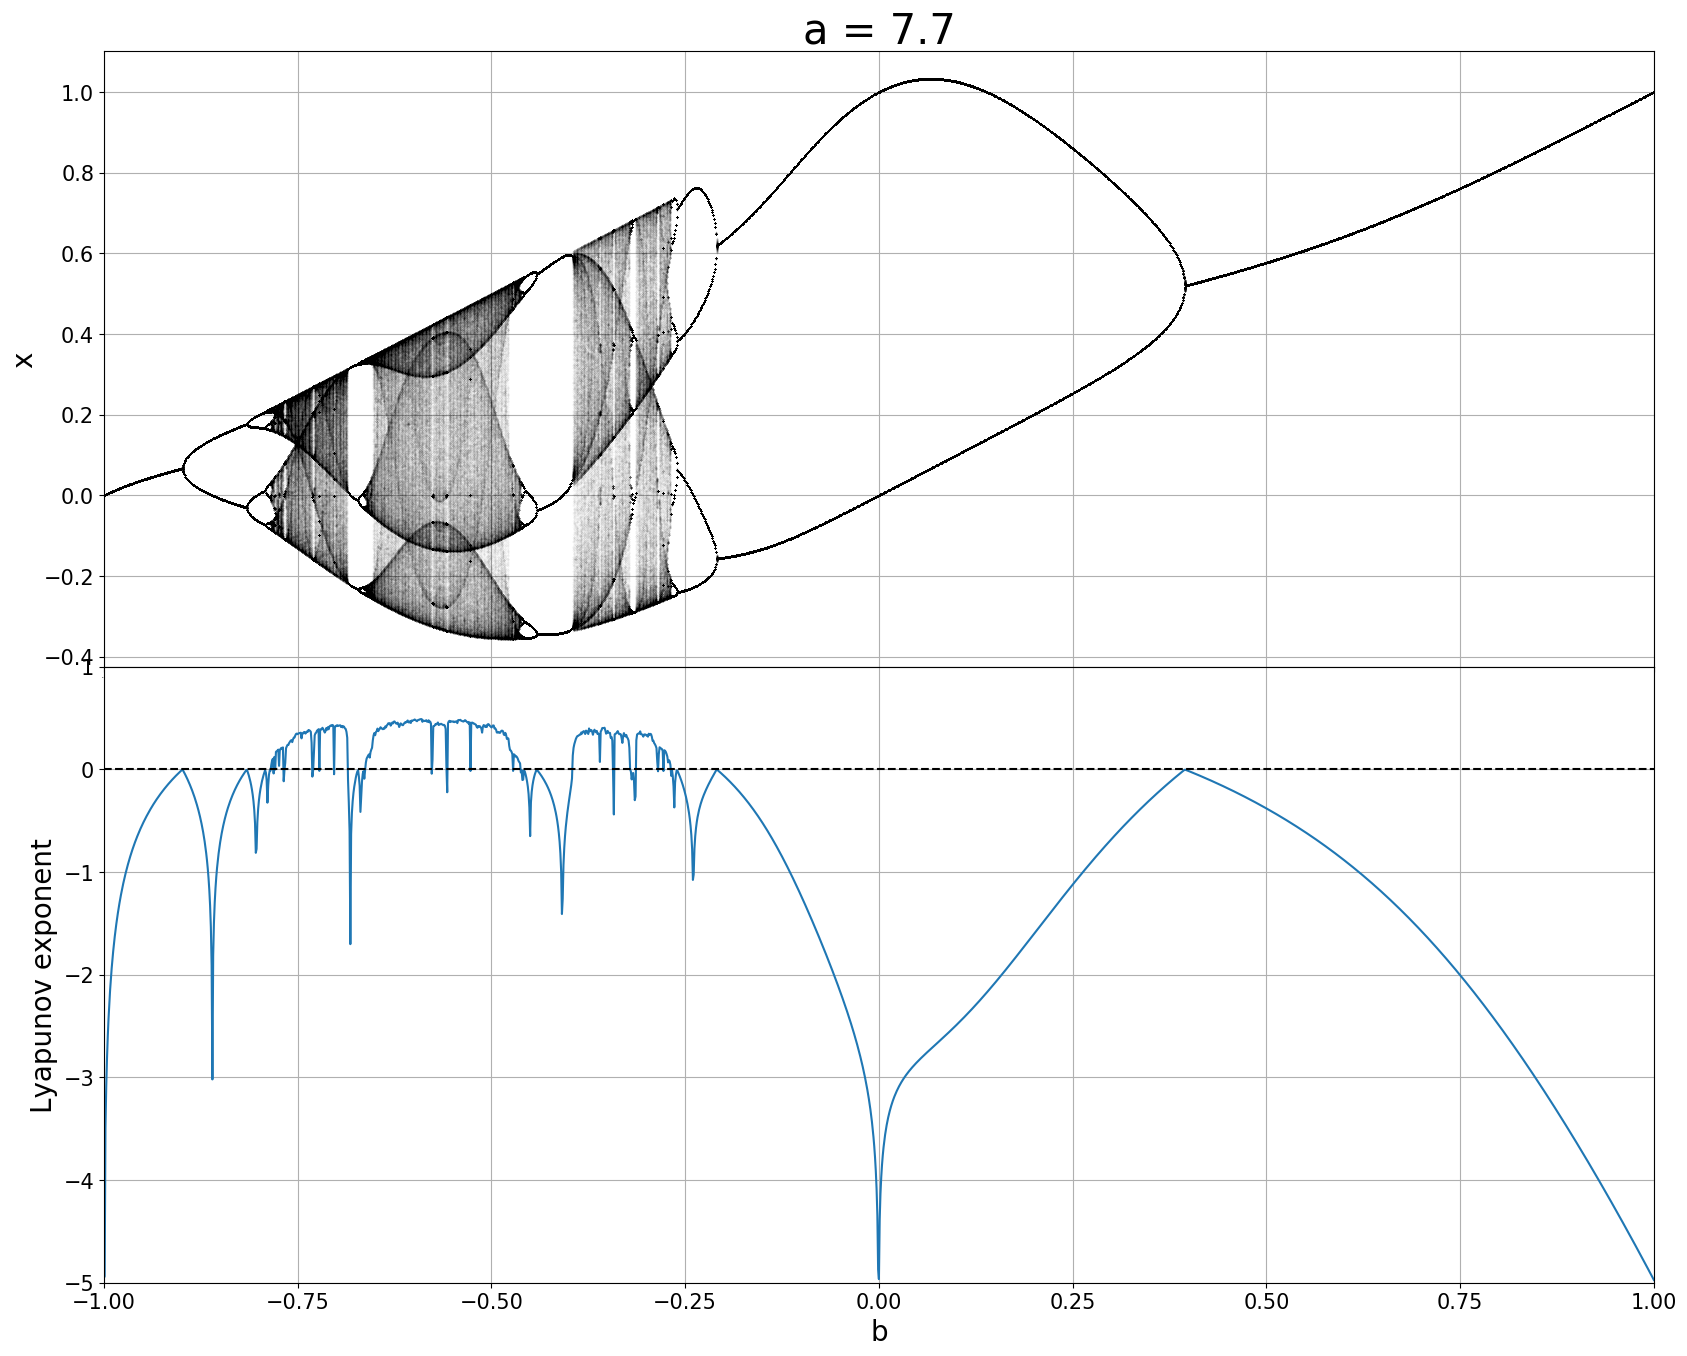

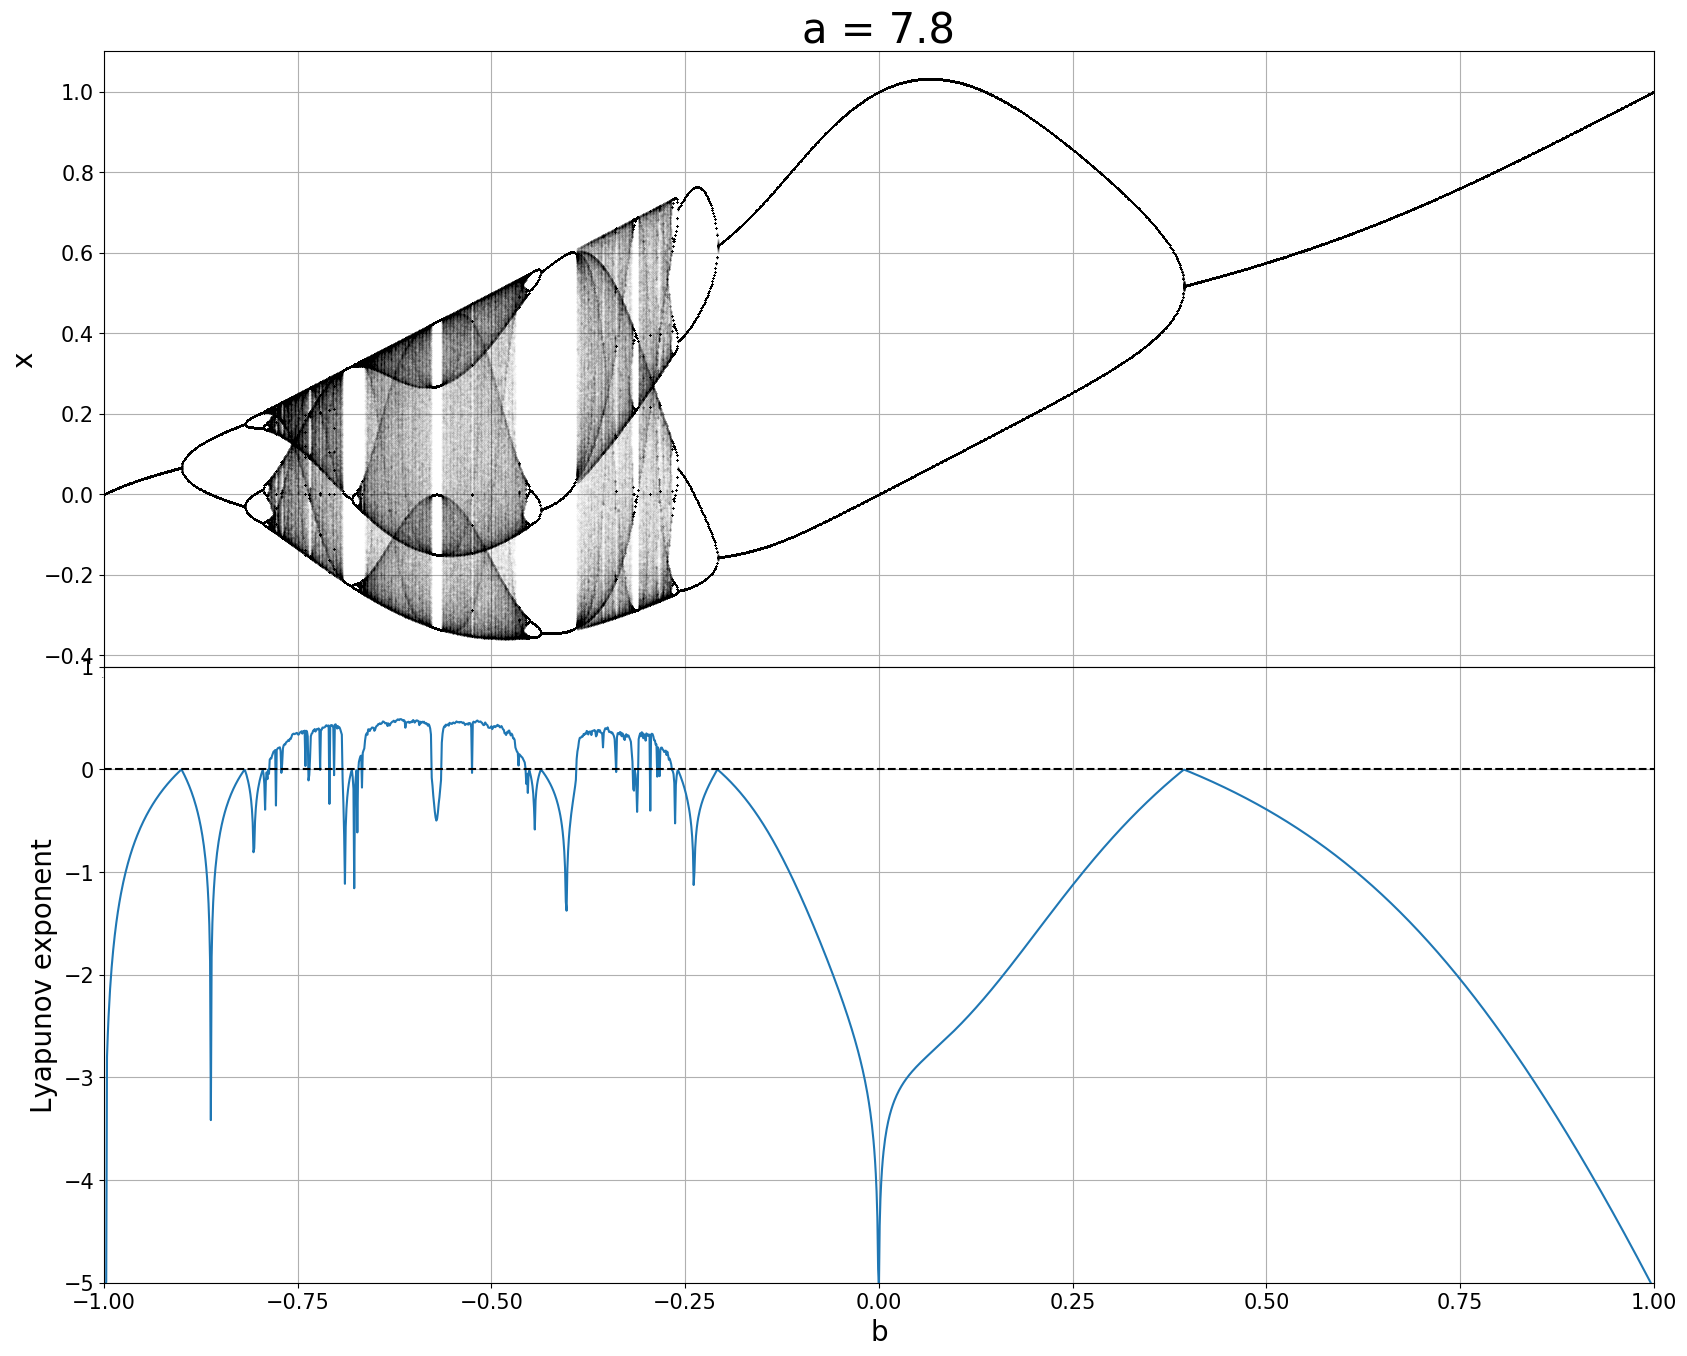

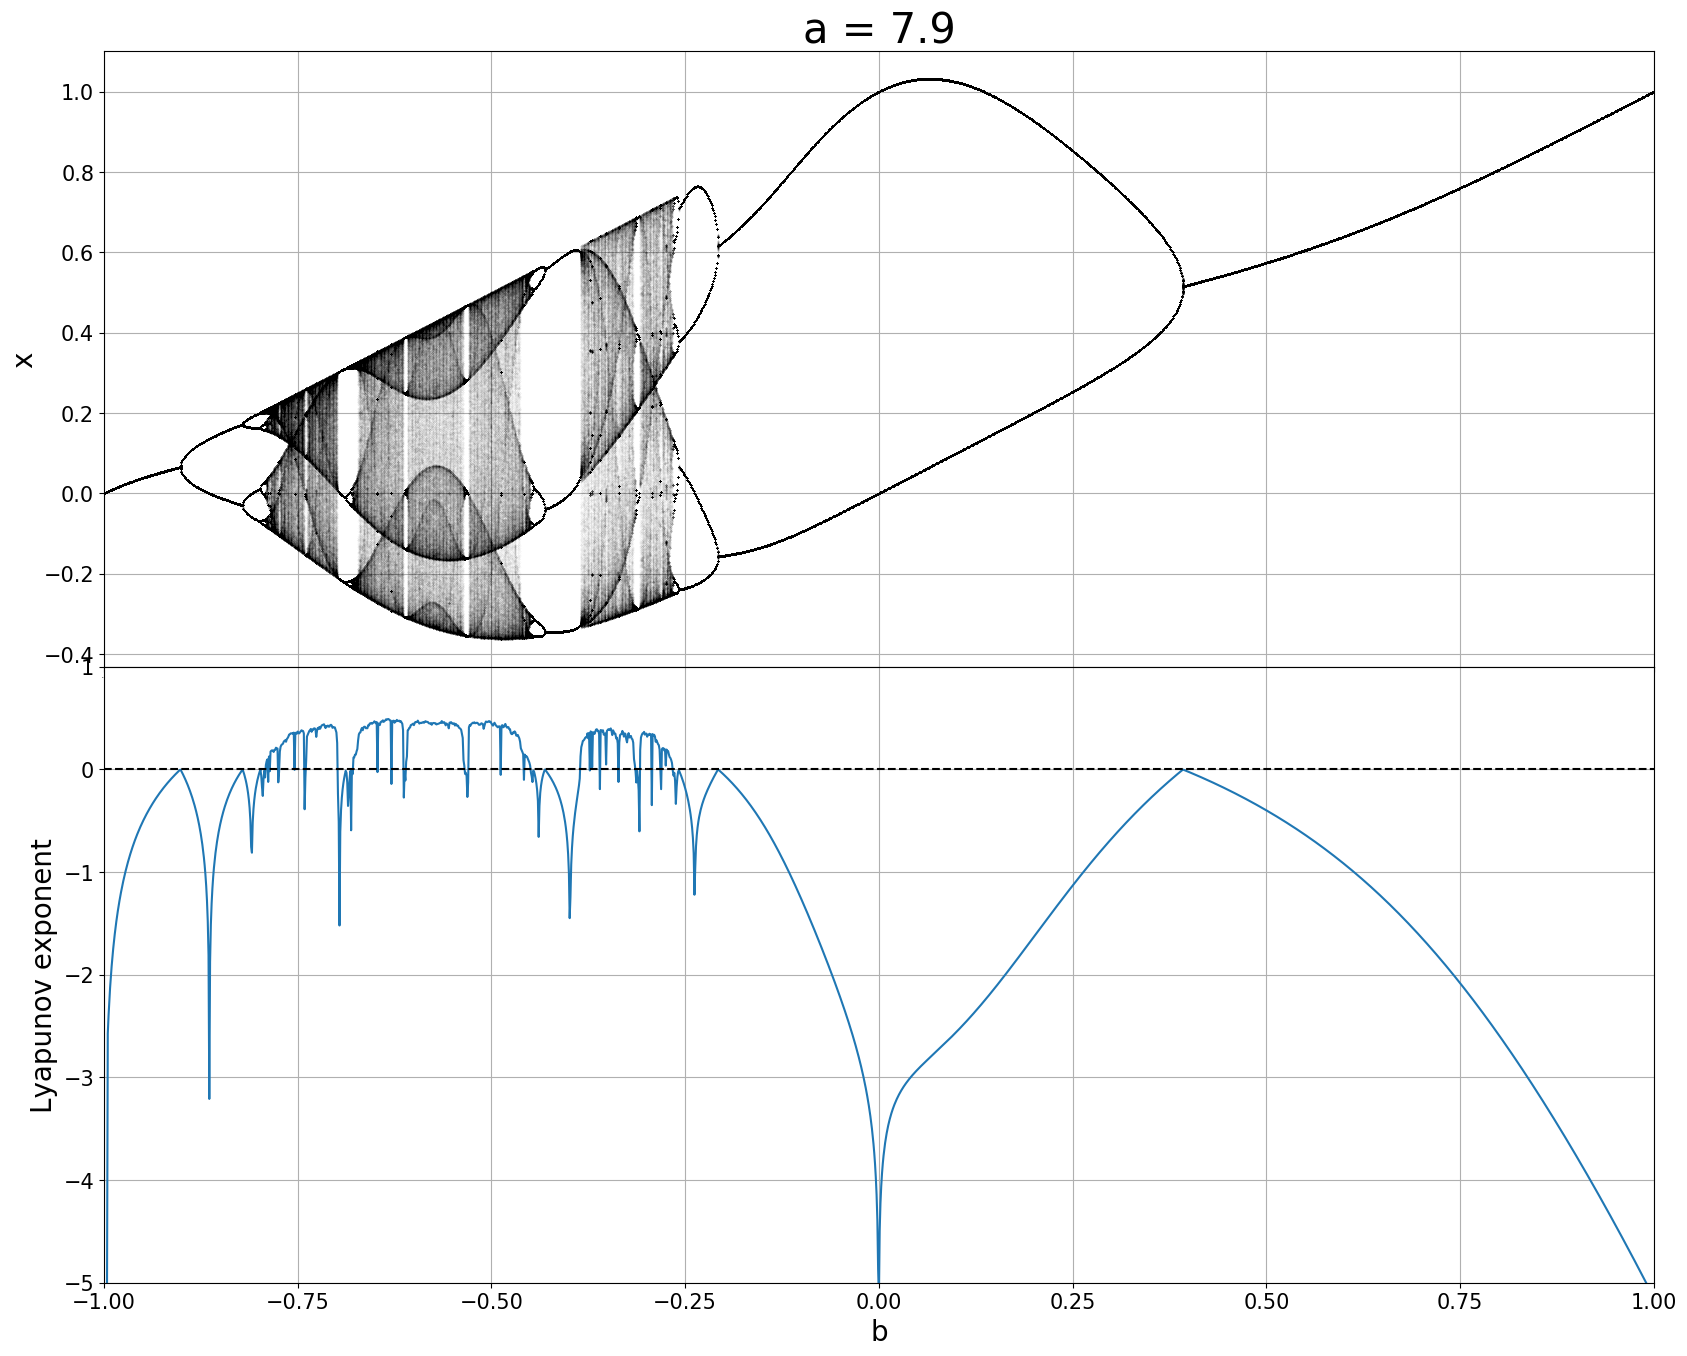

In [3]:
for i in 3:9
    a = 7+i/10
    x, y, t, L = mychaos(a)
    myplot(x, y, a, t, L)
    savefig("plots/a$a.png", dpi = 700)
end

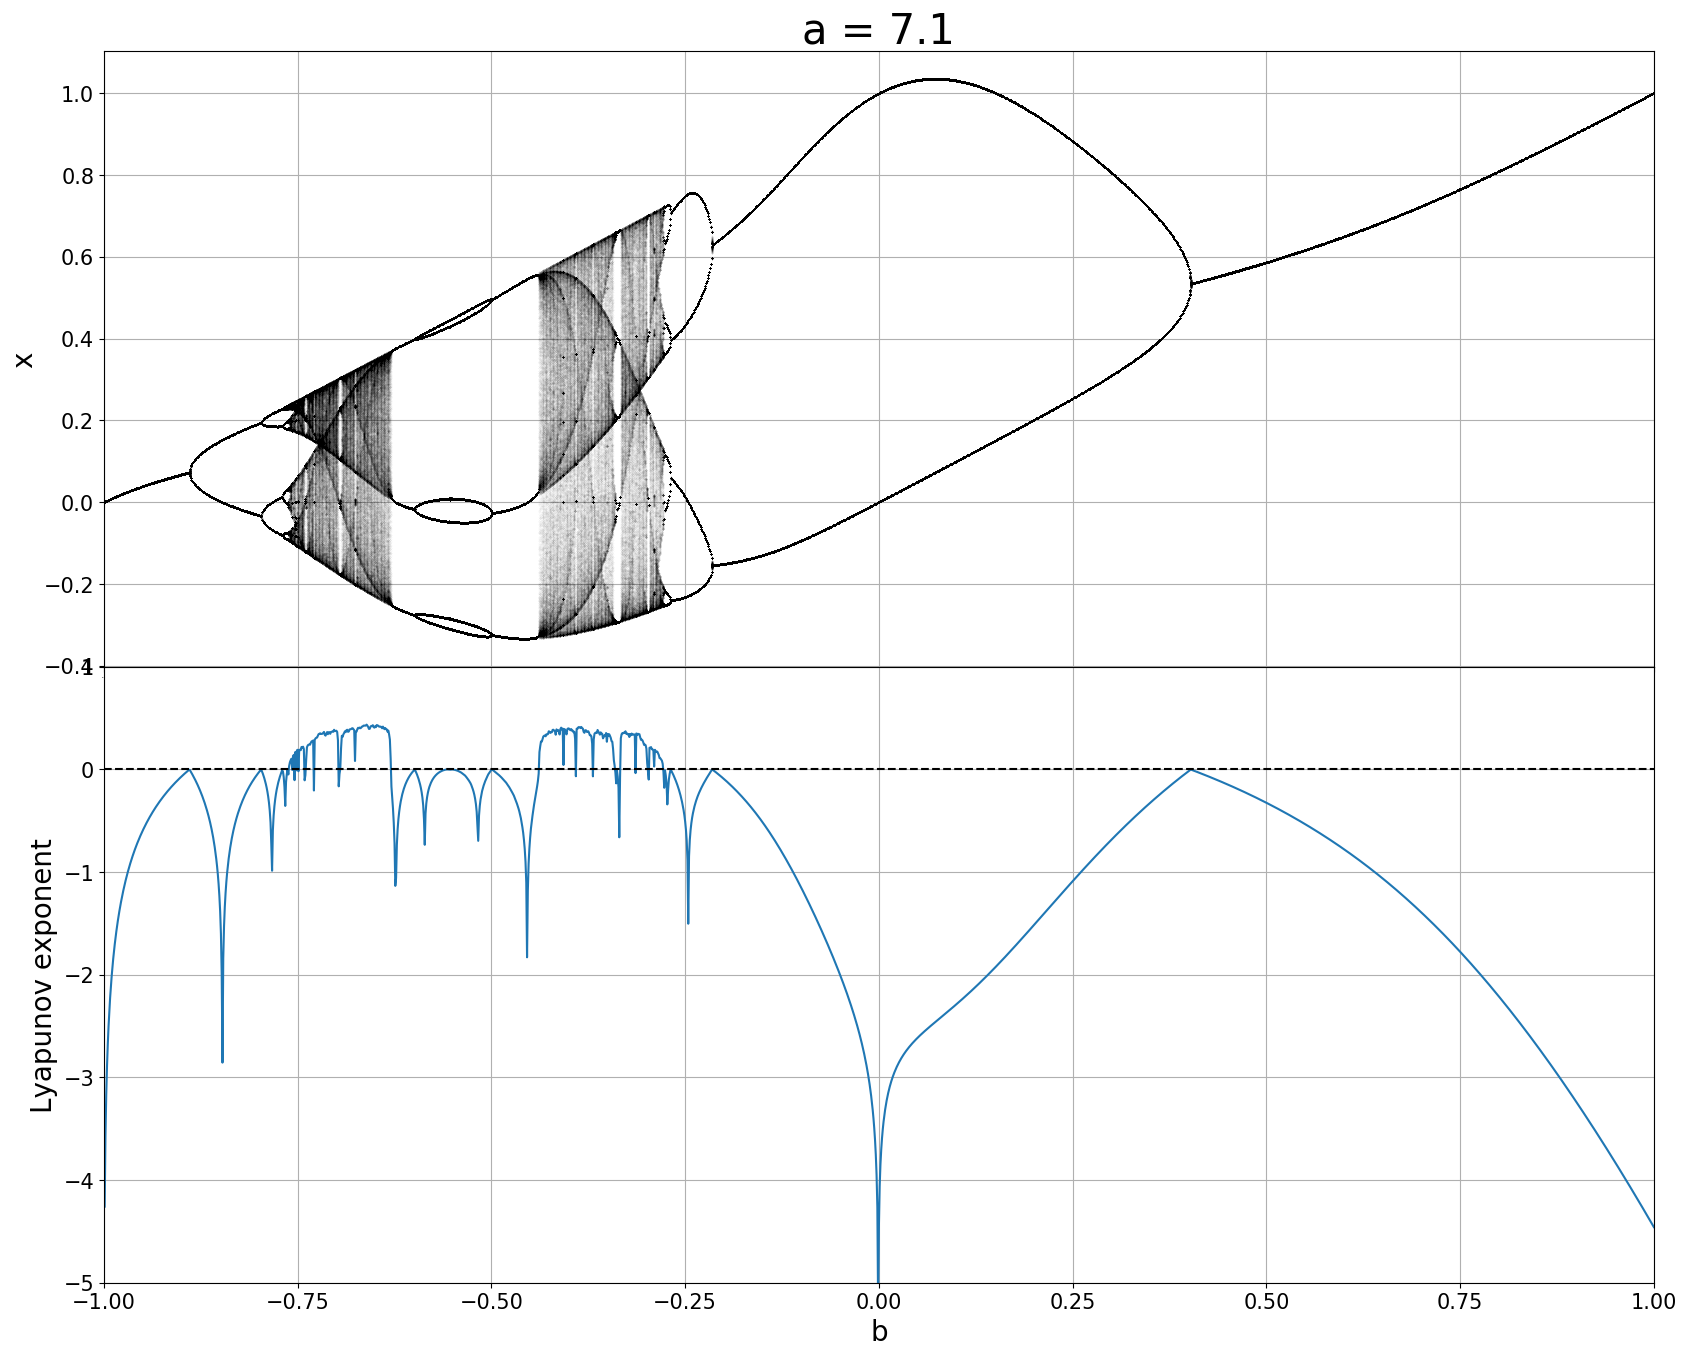

(-5, 1)

In [4]:
a = 7.1
x, y, t, L = mychaos(a)
myplot(x, y, a, t, L)